In [1]:
import pandas as pd
import matplotlib.pyplot as plt



/home/youss/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<Figure size 1200x600 with 0 Axes>

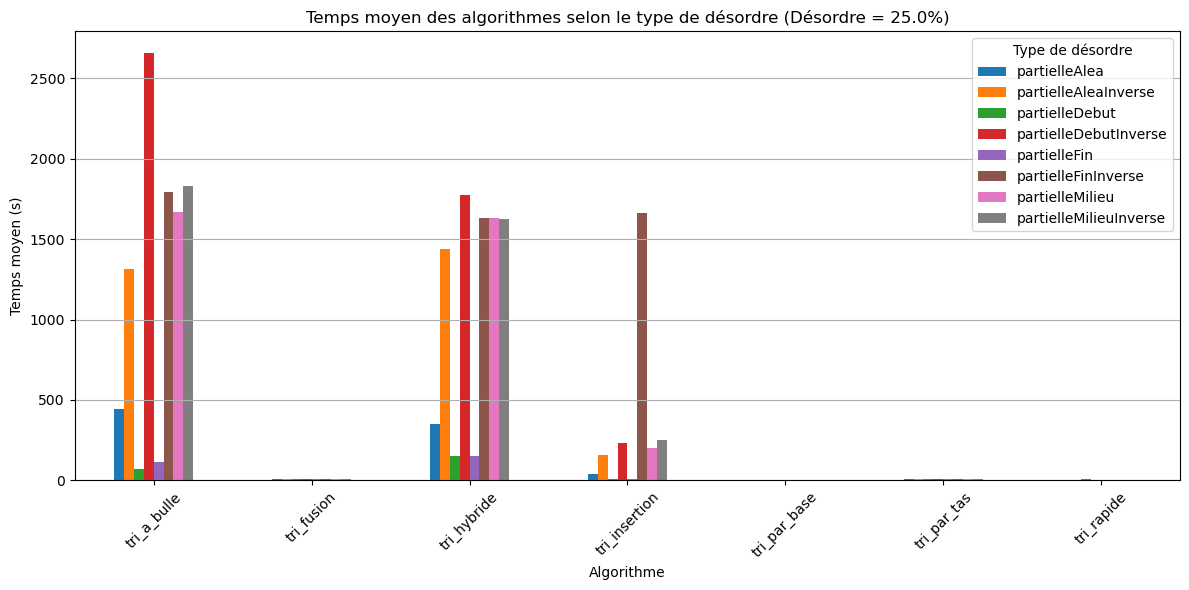

<Figure size 1200x600 with 0 Axes>

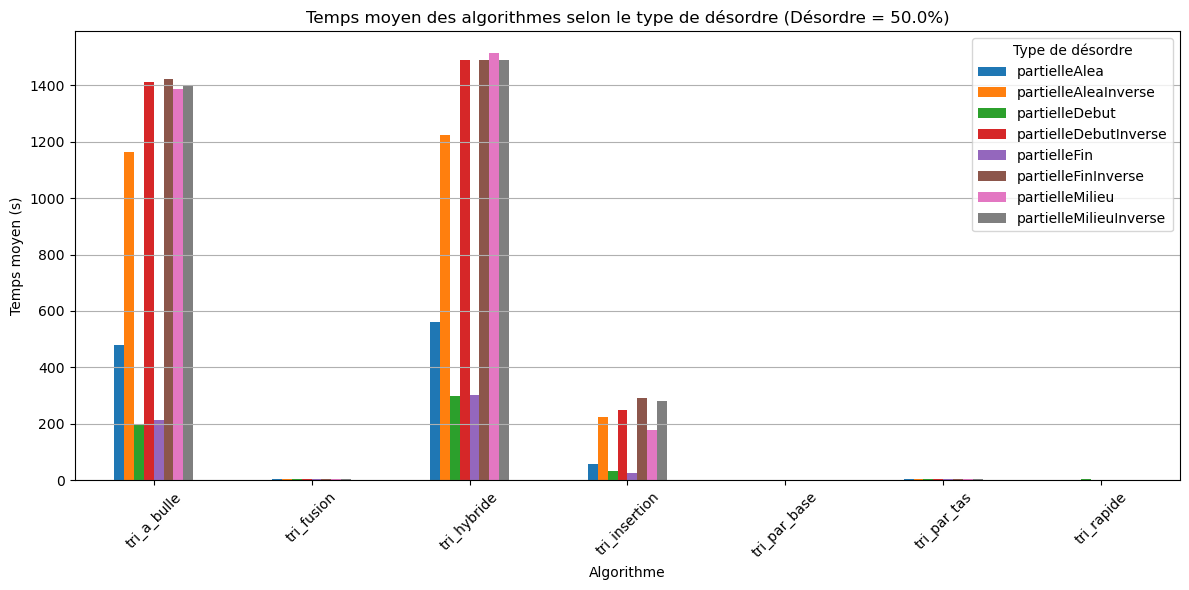

<Figure size 1200x600 with 0 Axes>

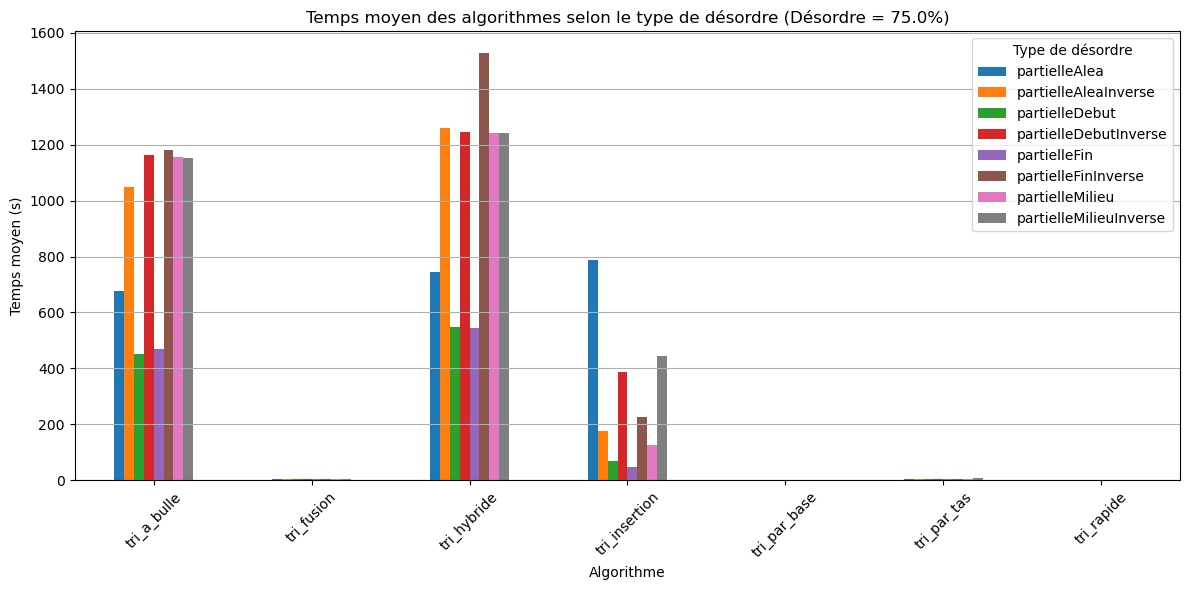

<Figure size 1200x600 with 0 Axes>

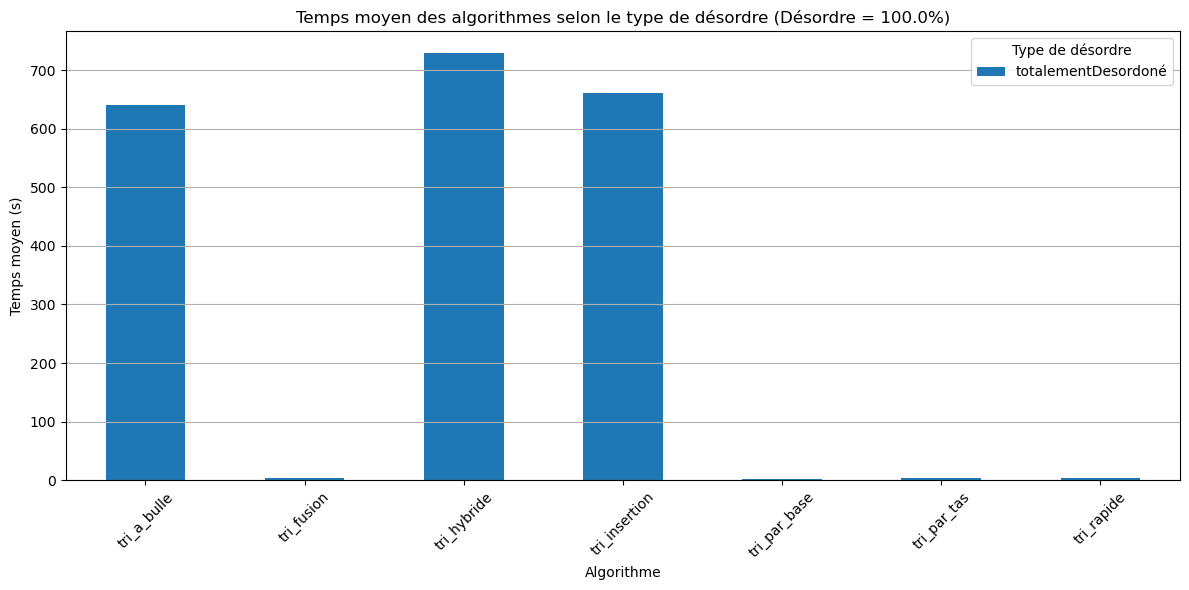

Diagrammes générés avec succès.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_sorting_time(file_path):
    # Charger les données
    df = pd.read_csv(file_path)

    # Vérification des colonnes requises
    required_cols = {'Taille', 'Désordre', 'Algorithme', 'typeDesordre', 'Temps'}
    if not required_cols.issubset(df.columns):
        raise ValueError("Le fichier doit contenir les colonnes : Taille, Désordre, Algorithme, typeDesordre, Temps")

    # Calcul de la moyenne des temps par algorithme, type de désordre et quantité de désordre (en ignorant la taille)
    grouped = df.groupby(['Algorithme', 'typeDesordre', 'Désordre'])['Temps'].mean().reset_index()

    # Pour chaque niveau de désordre, tracer un seul graphique regroupé
    for desordre in sorted(grouped['Désordre'].unique()):
        subset = grouped[grouped['Désordre'] == desordre]
        pivot = subset.pivot(index='Algorithme', columns='typeDesordre', values='Temps')

        plt.figure(figsize=(12, 6))
        pivot.plot(kind='bar', figsize=(12, 6))

        plt.title(f"Temps moyen des algorithmes selon le type de désordre (Désordre = {desordre}%)")
        plt.xlabel("Algorithme")
        plt.ylabel("Temps moyen (s)")
        plt.legend(title="Type de désordre")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    print("Diagrammes générés avec succès.")

# Appel de la fonction
plot_average_sorting_time("../stockage/resultats.csv")


In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt

# def plot_sorting_time_histogram(file_path):
#     # Charger les données
#     df = pd.read_csv(file_path)

#     # Itérer sur chaque combinaison unique de taille, type de désordre et quantité
#     for taille in df['Taille'].unique():
#         for type_desordre in df['typeDesordre'].unique():
#             for quantite in df['Désordre'].unique():
#                 # Filtrer les données pour cette combinaison
#                 subset = df[
#                     (df['Taille'] == taille) &
#                     (df['typeDesordre'] == type_desordre) &
#                     (df['Désordre'] == quantite)
#                 ]
                
#                 if subset.empty:
#                     continue  # Sauter si aucune donnée pour cette combinaison

#                 # Calcul des moyennes des temps par algorithme
#                 grouped = subset.groupby('Algorithme')['Temps'].mean().sort_values()

#                 # Création du graphique
#                 plt.figure(figsize=(10, 6))
#                 bars = plt.bar(grouped.index, grouped.values, width=0.6)

#                 # Afficher les valeurs au-dessus des barres
#                 for bar in bars:
#                     height = bar.get_height()
#                     plt.text(bar.get_x() + bar.get_width()/2, height,
#                              f'{height:.3f}', ha='center', va='bottom', fontsize=9)

#                 plt.title(f"Temps d'exécution - Taille={taille}, Désordre={type_desordre}, Quantité={quantite}")
#                 plt.xlabel("Algorithme")
#                 plt.ylabel("Temps moyen (s)")
#                 plt.xticks(rotation=45)
#                 plt.grid(axis='y', linestyle='--', alpha=0.7)
#                 plt.tight_layout()
#                 plt.show()

#     print("Graphiques générés avec succès.")

# # Utilisation
# file_path = "../stockage/resultats.csv"
# plot_sorting_time_histogram(file_path)


Generation d'histogramme par algo/quantité de desordre 

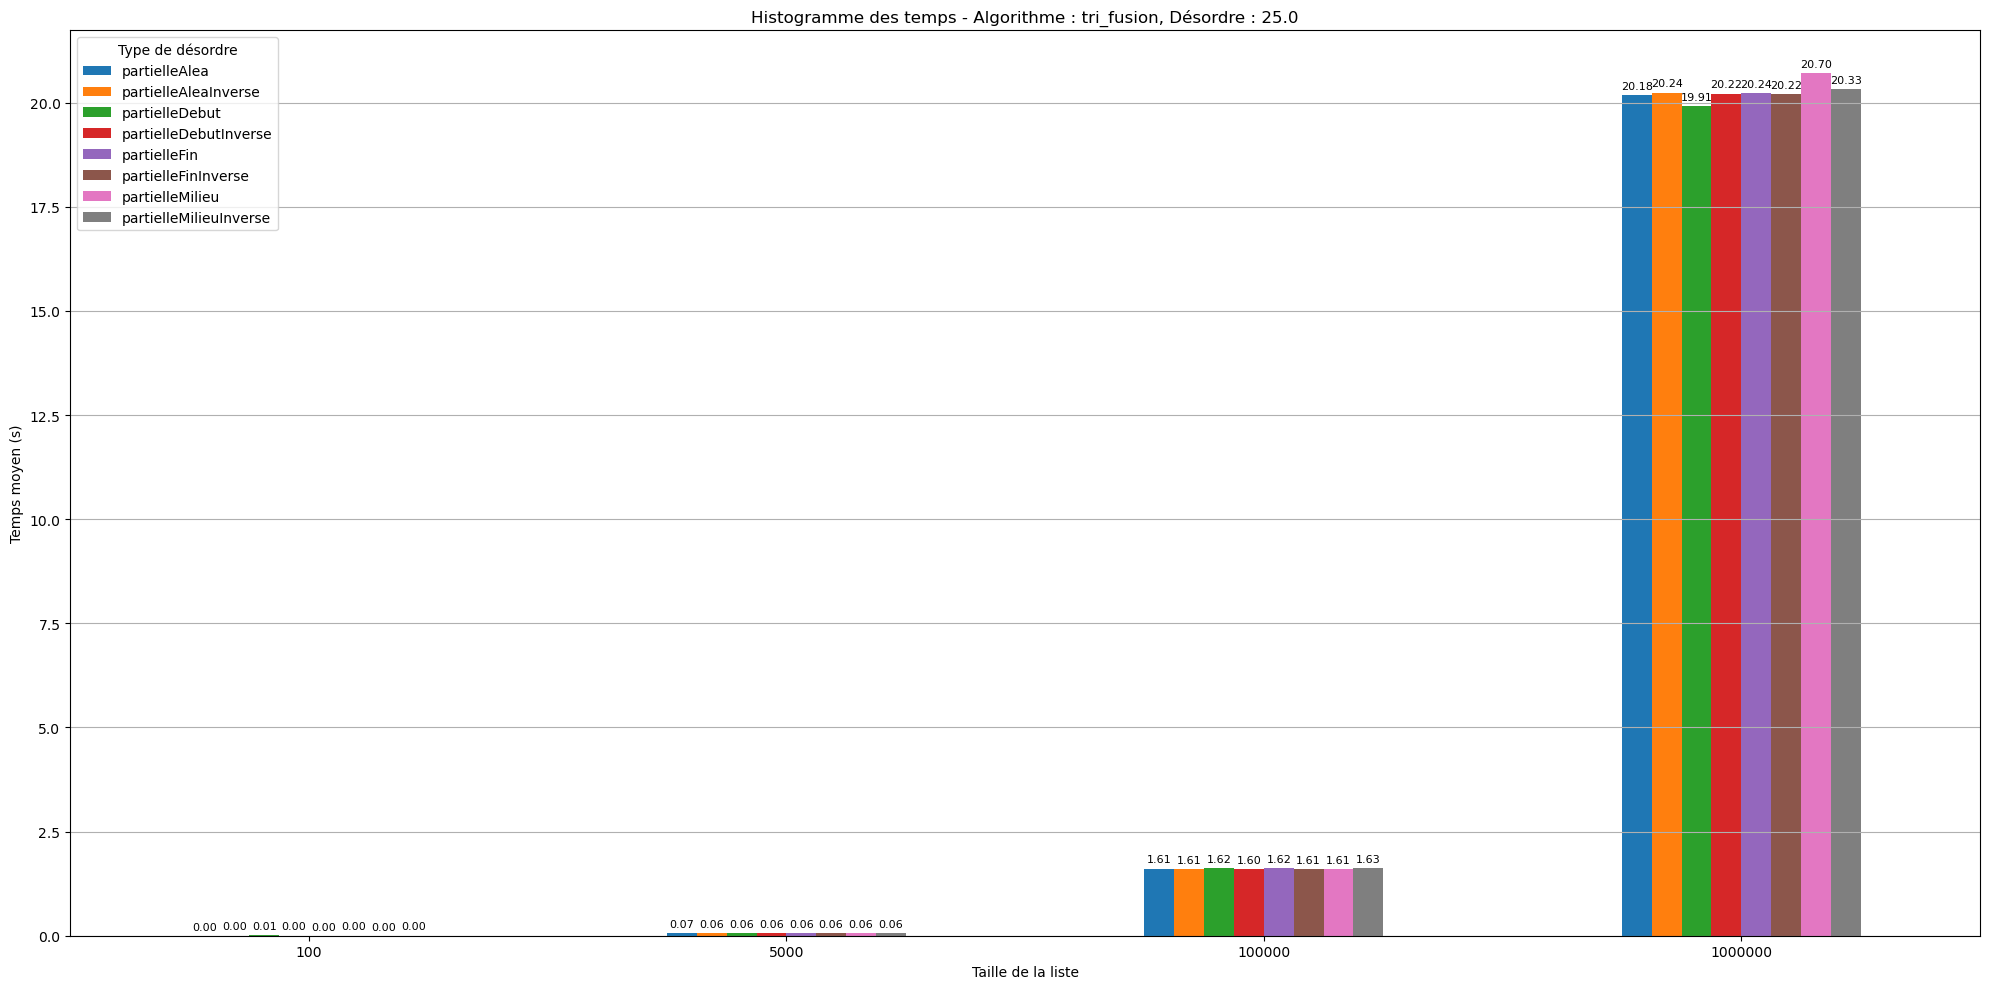

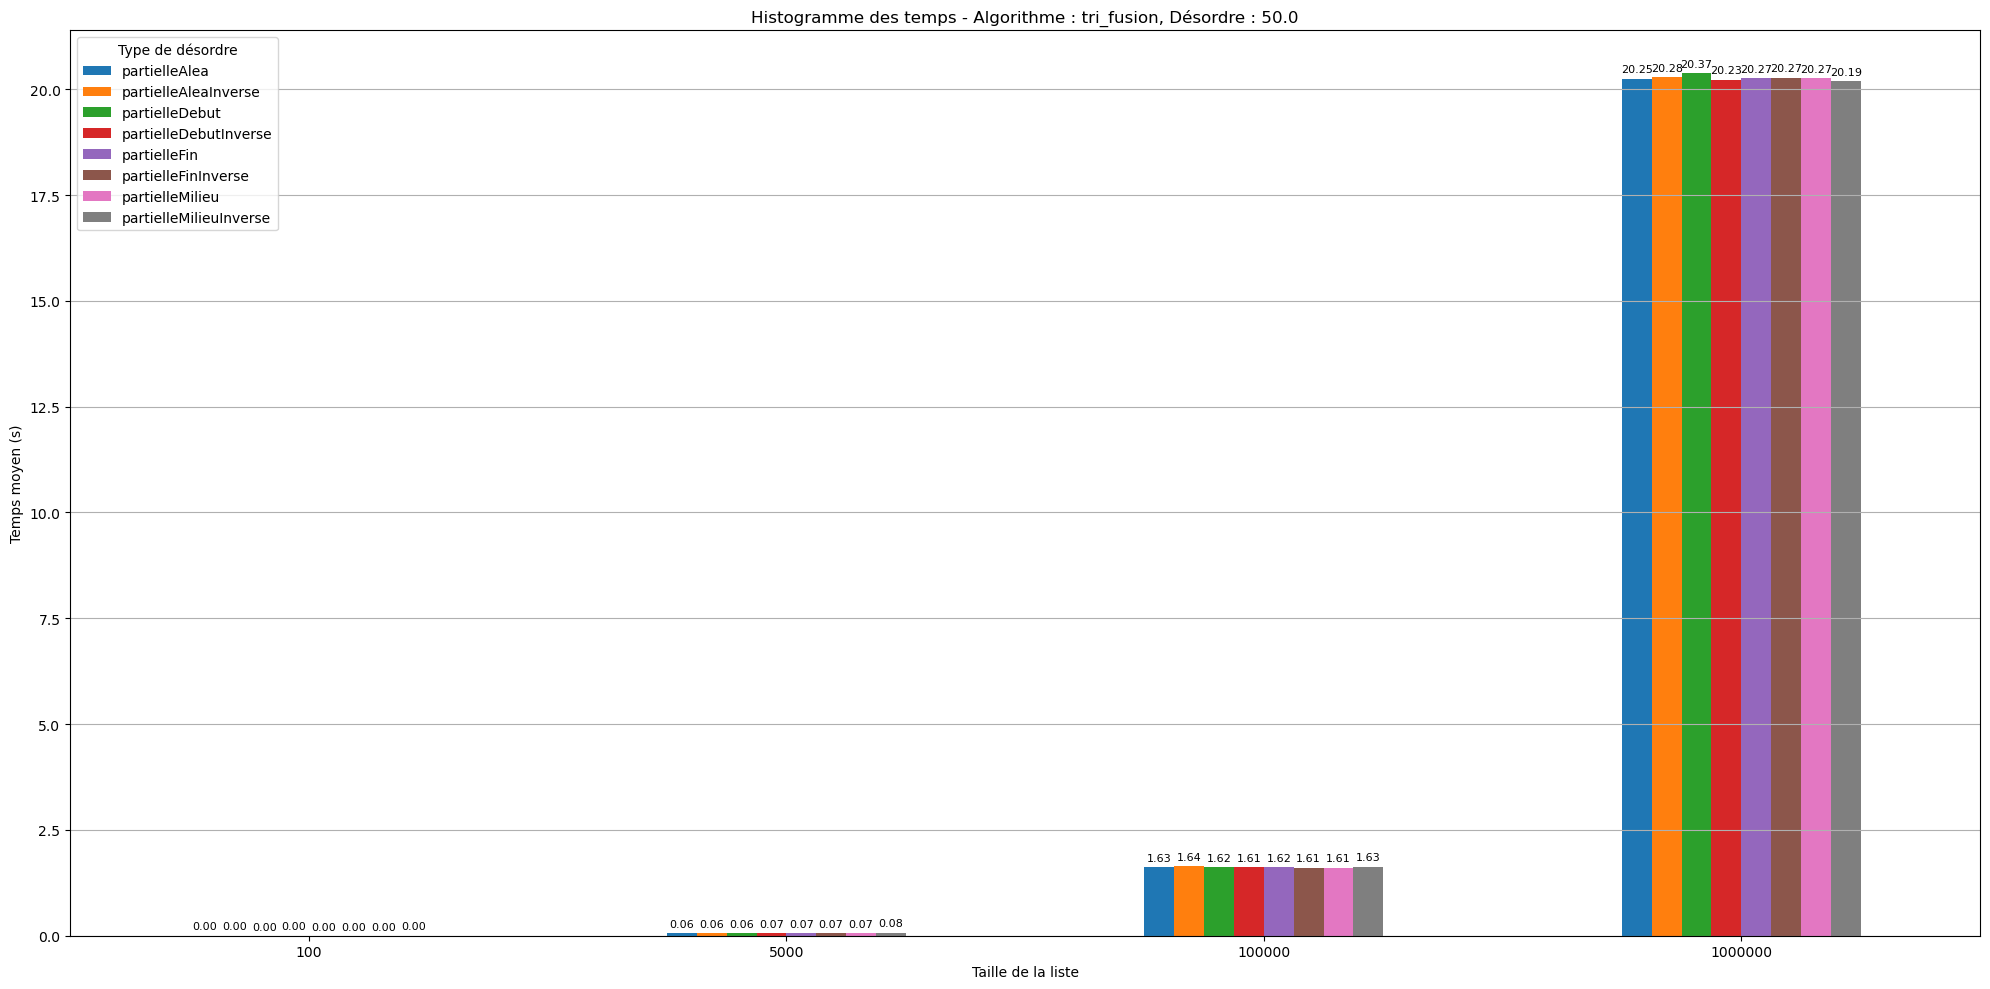

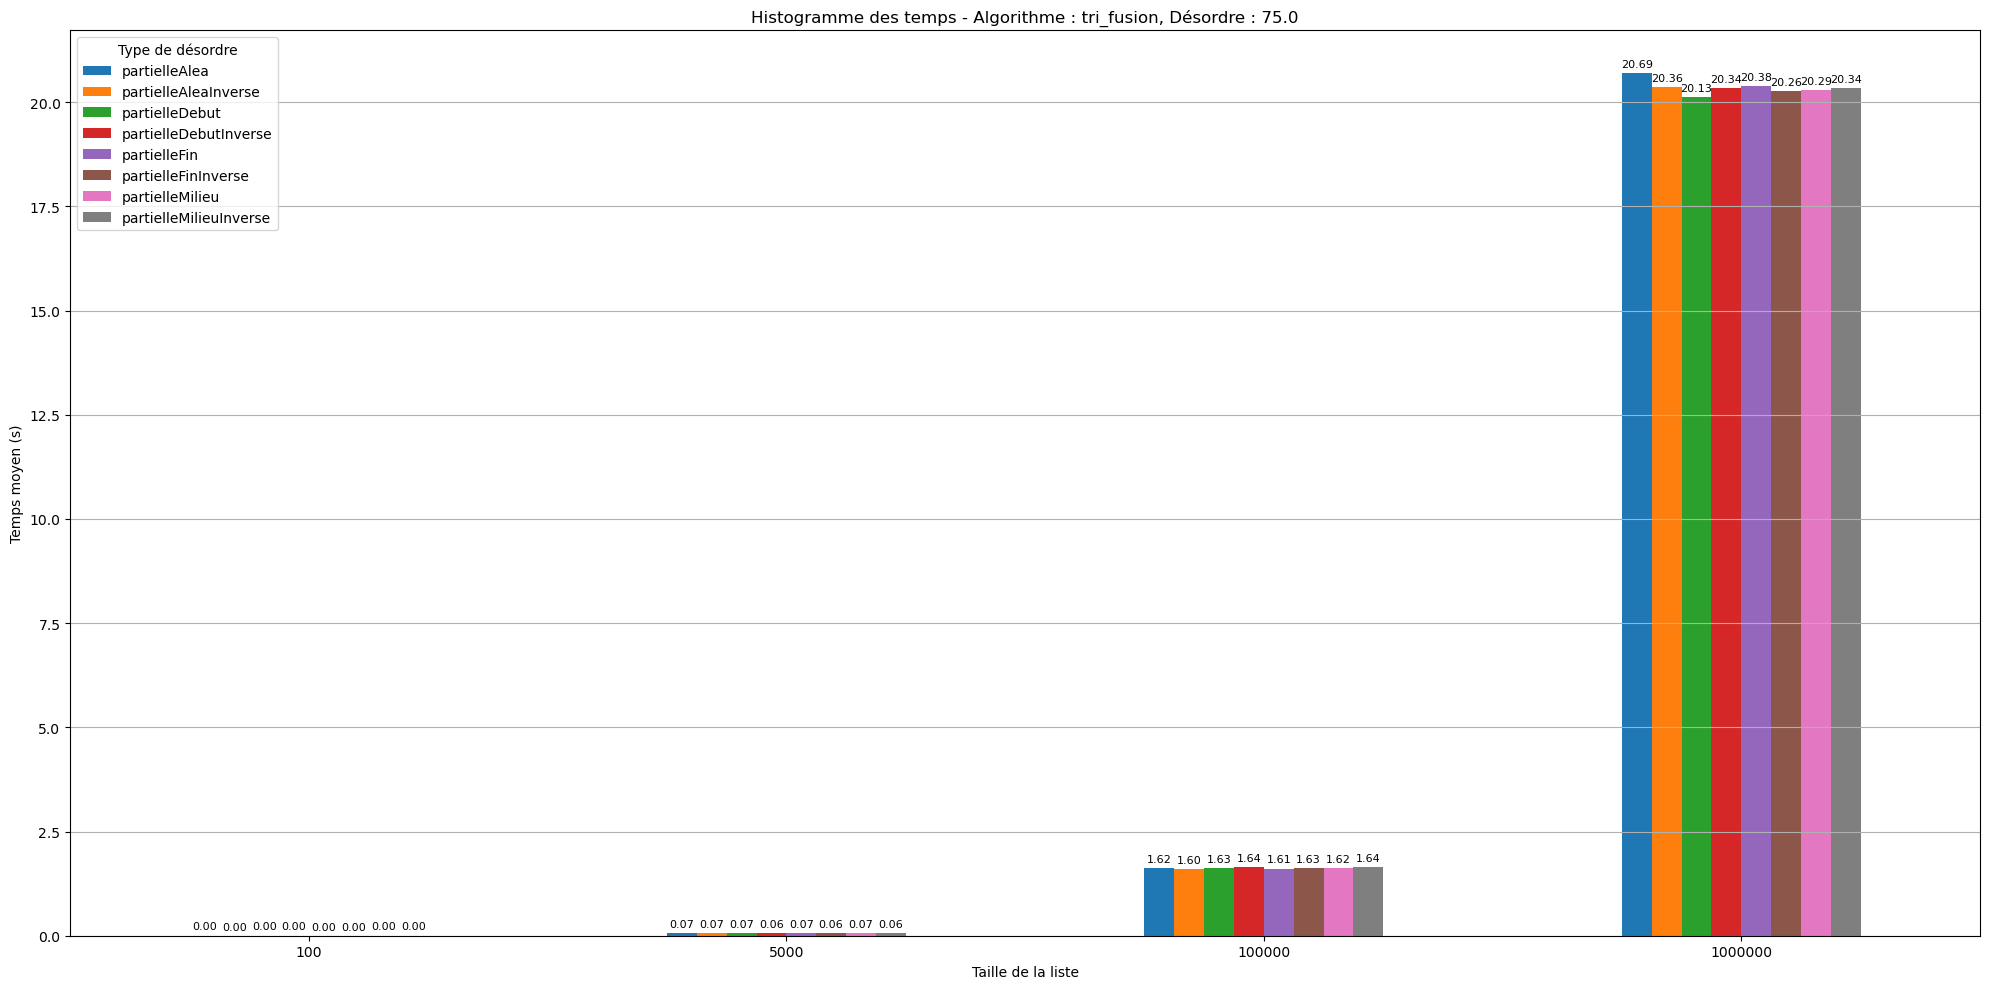

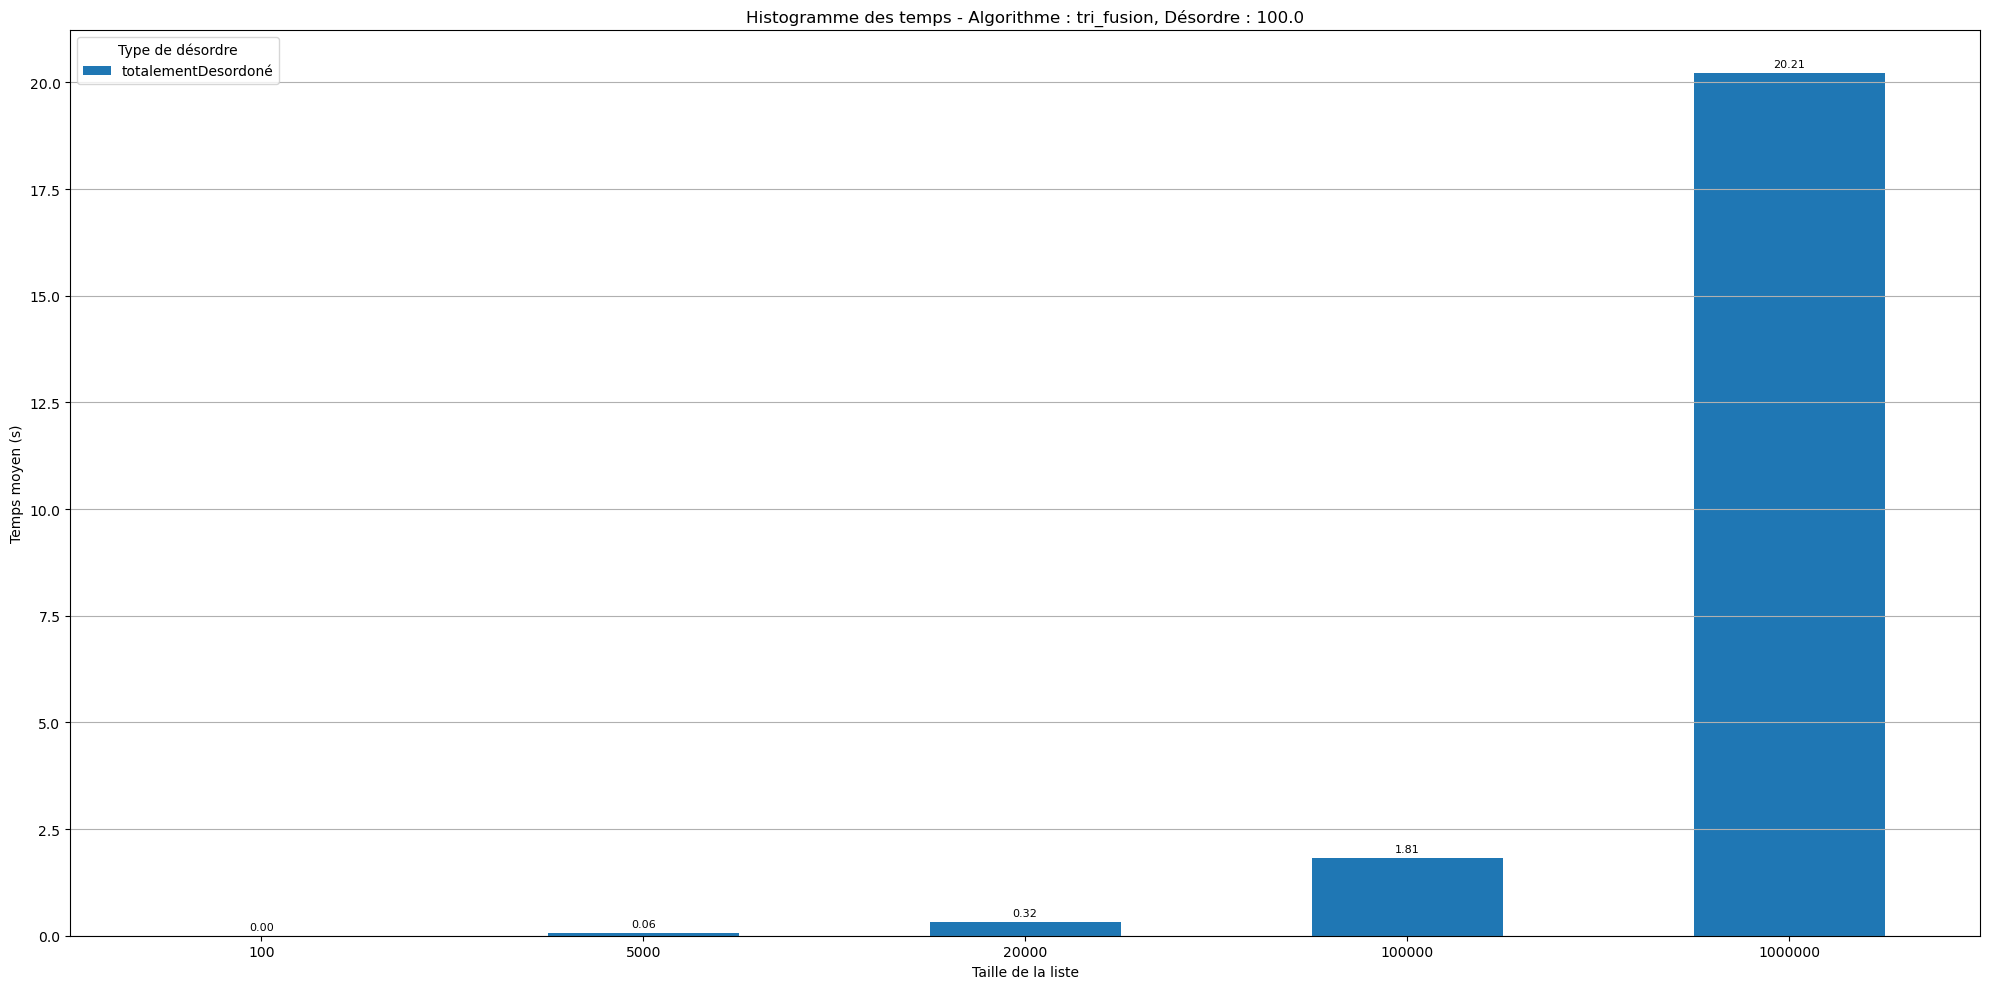

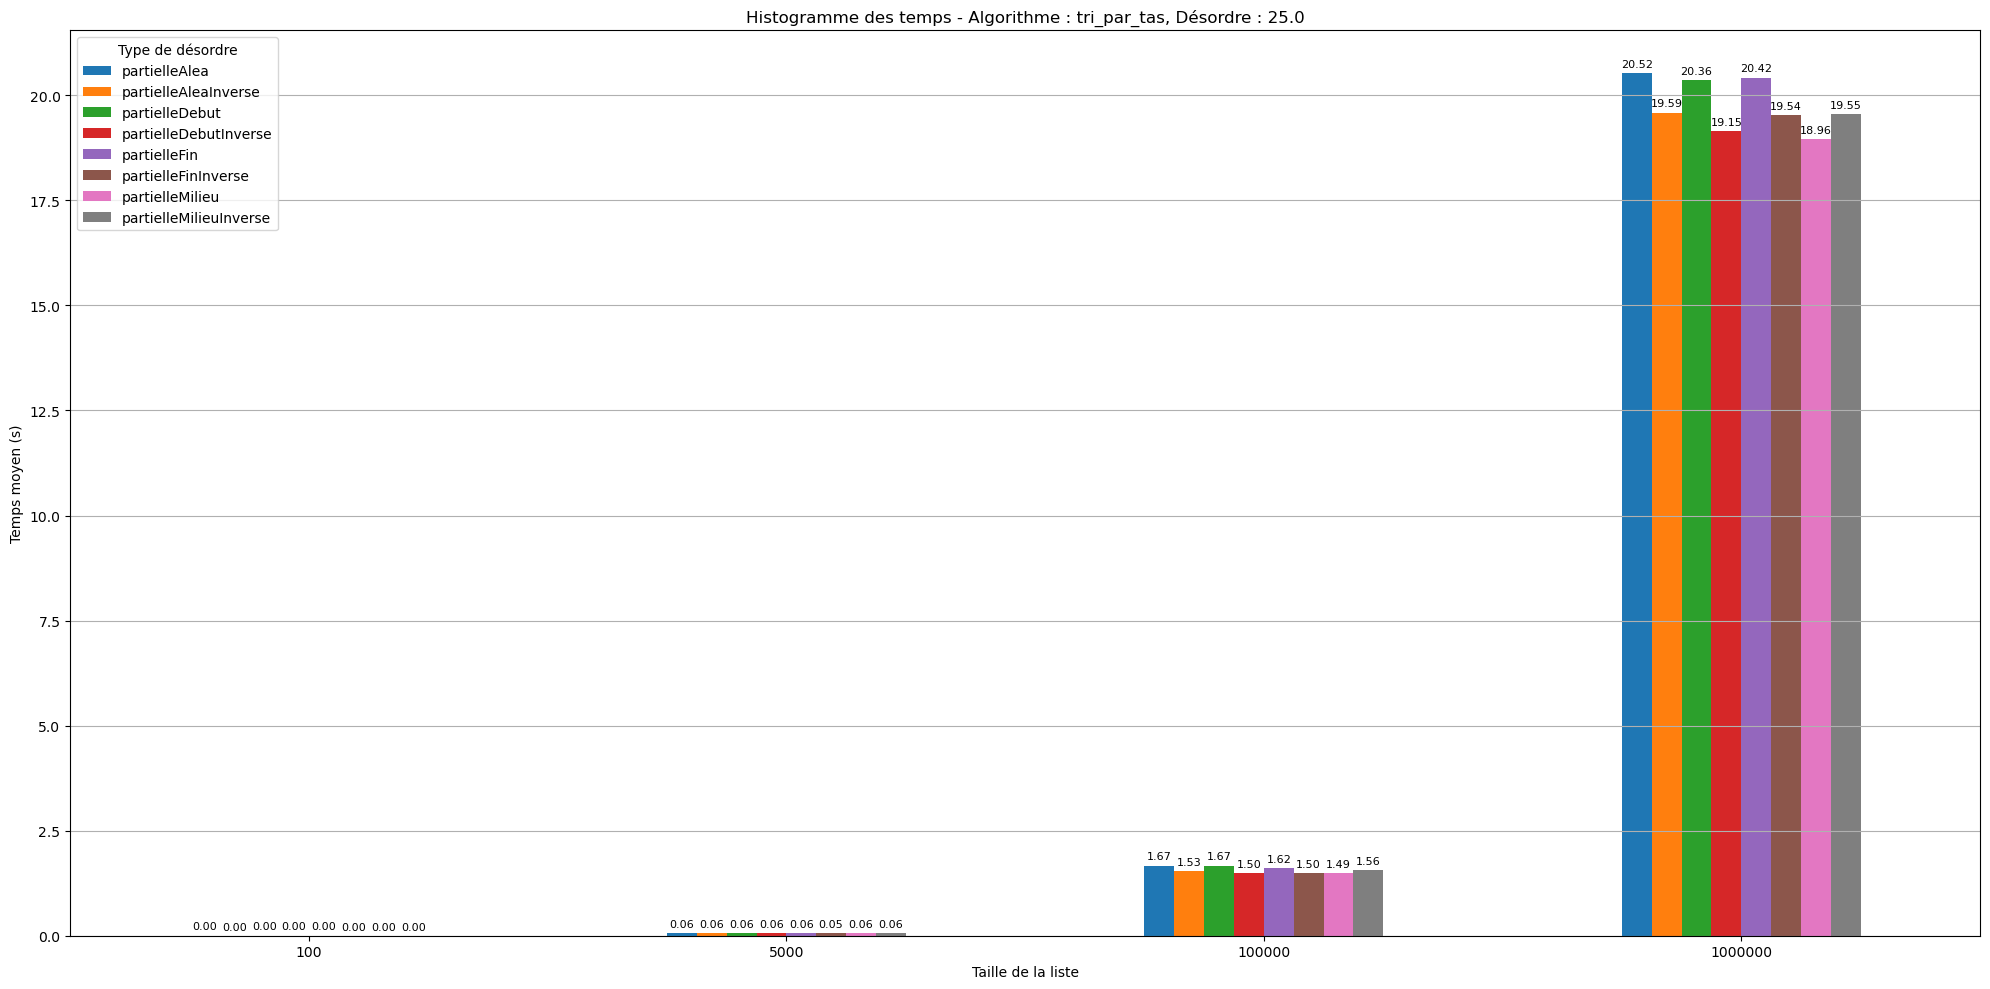

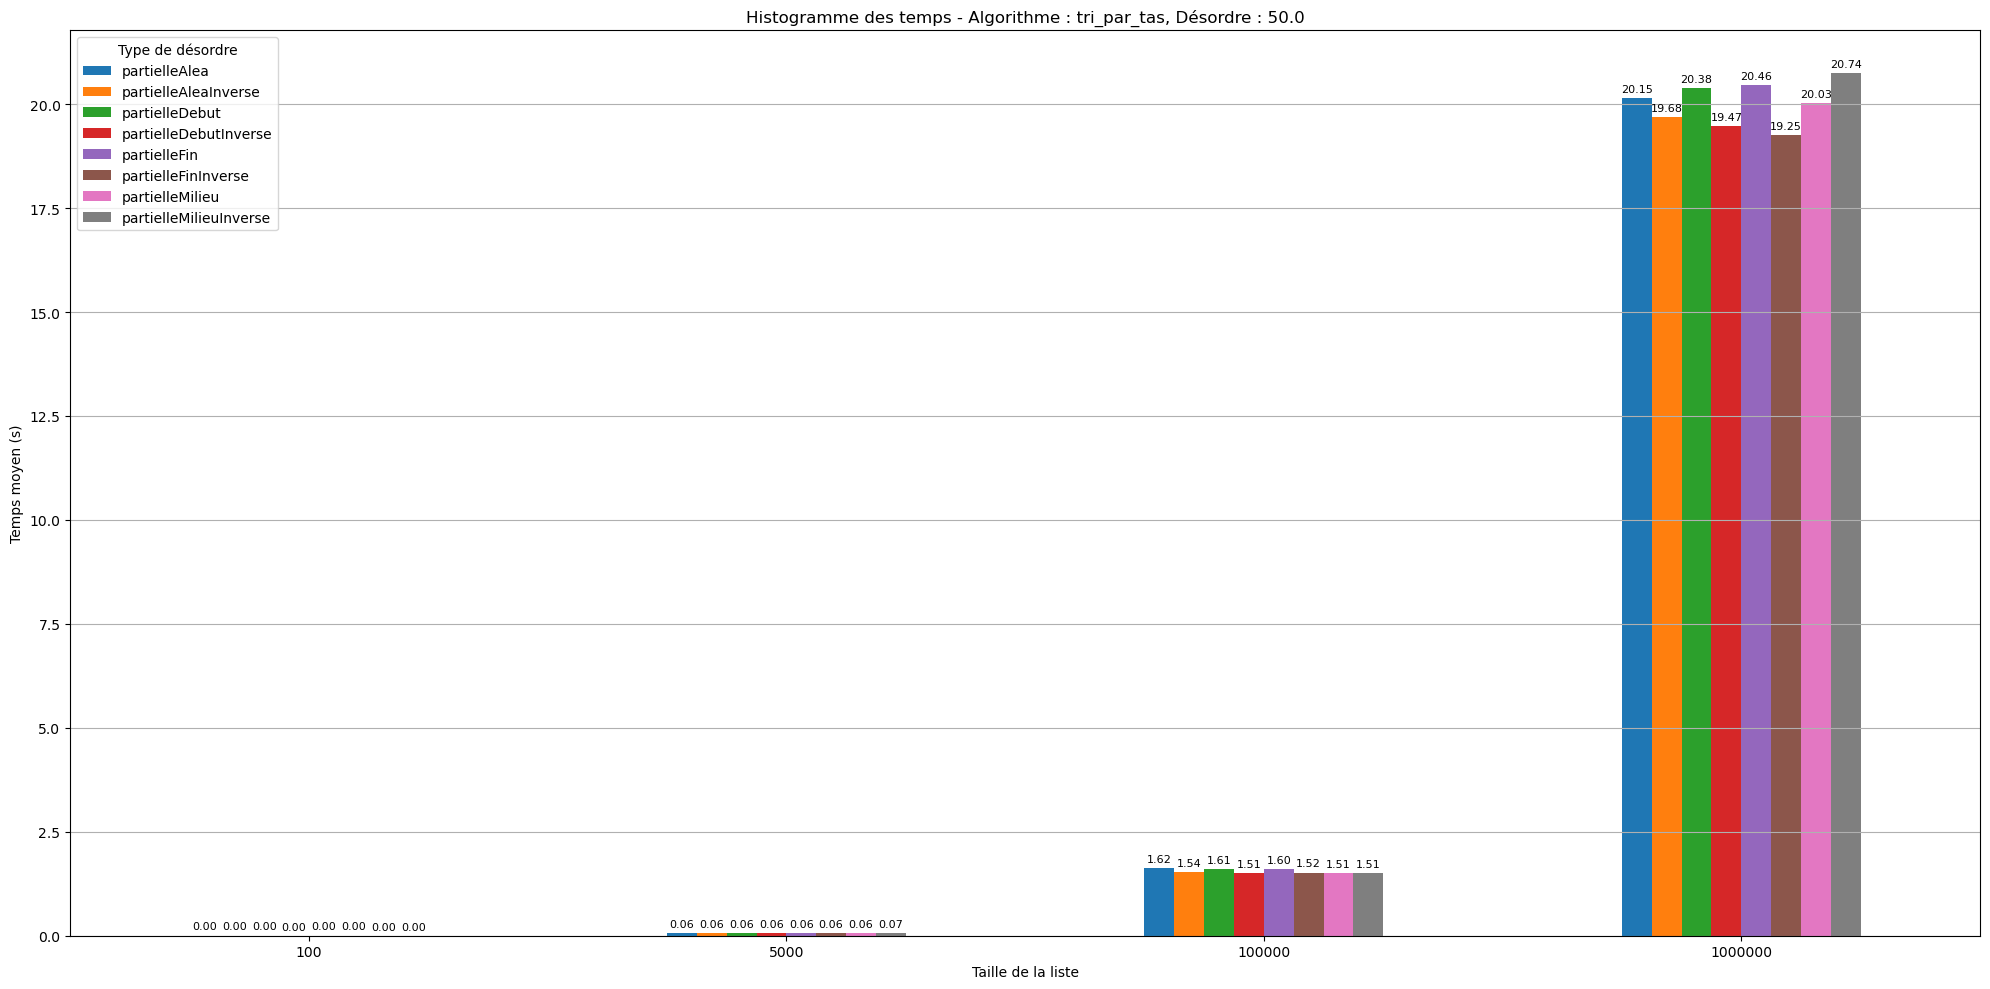

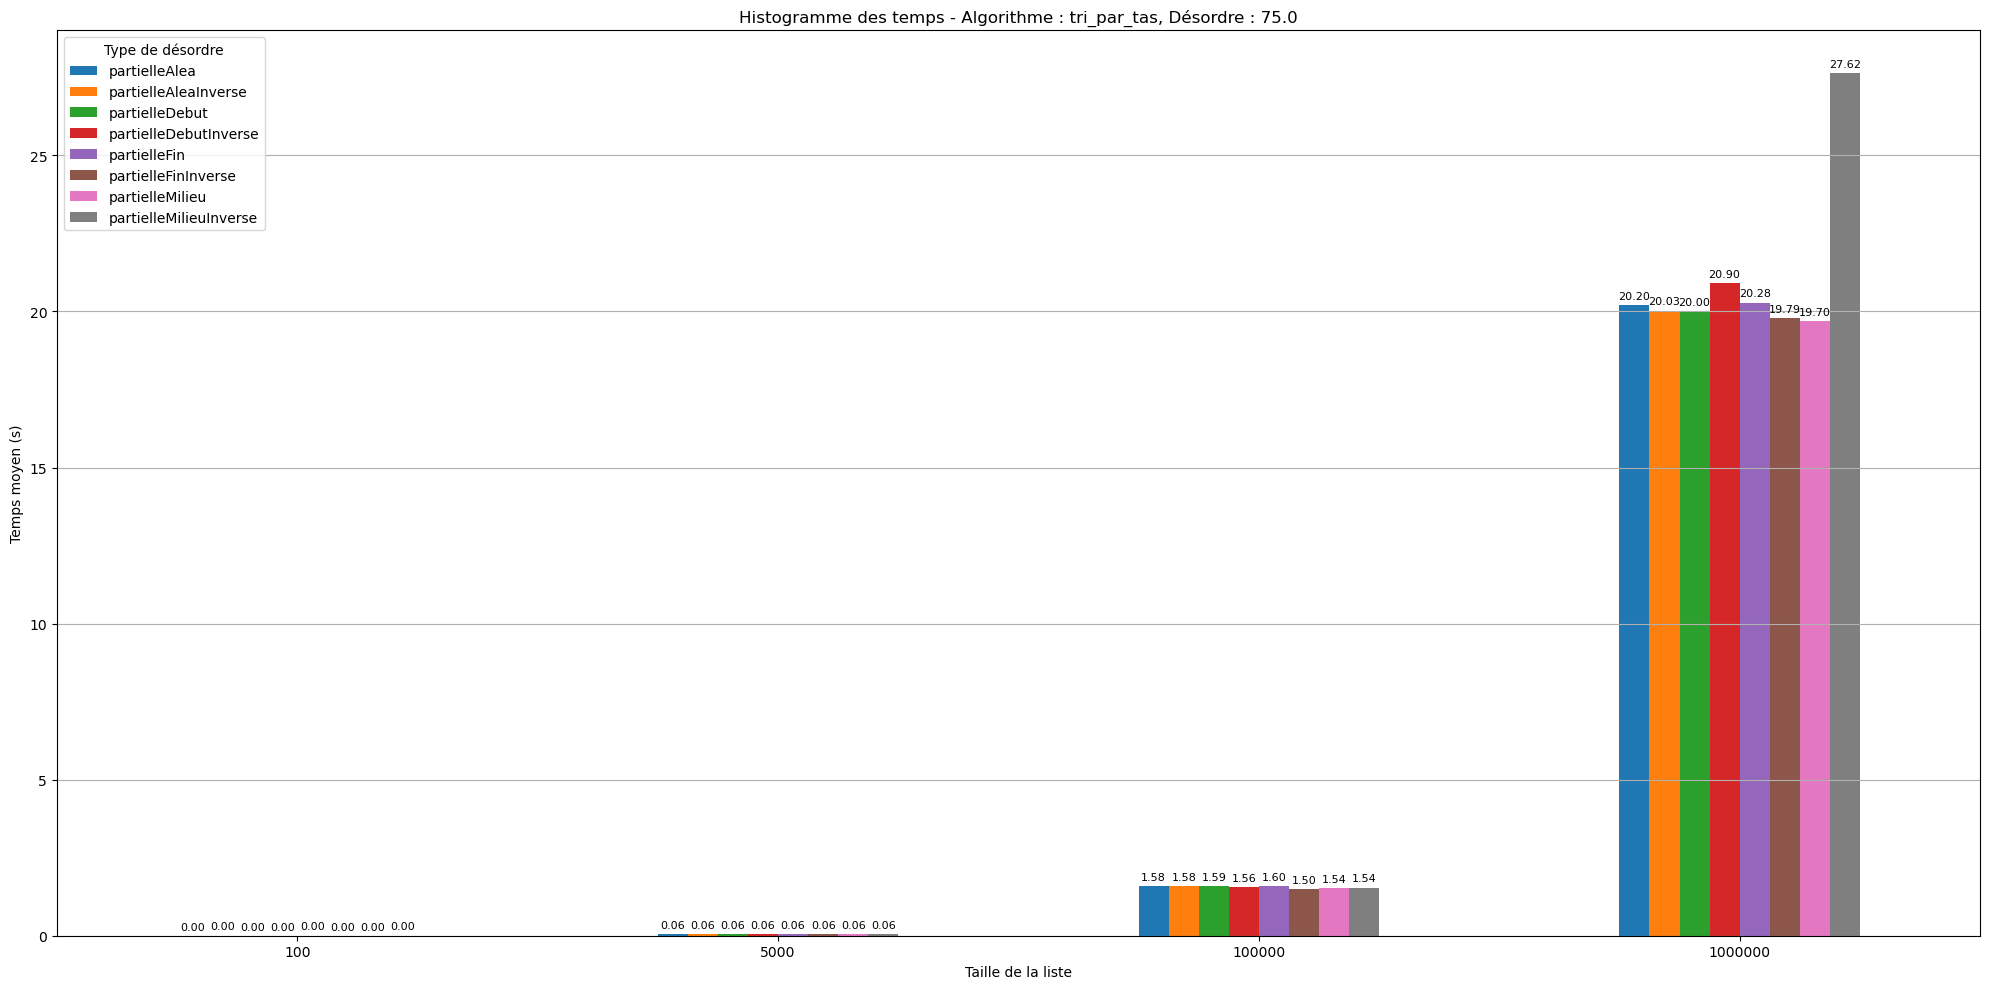

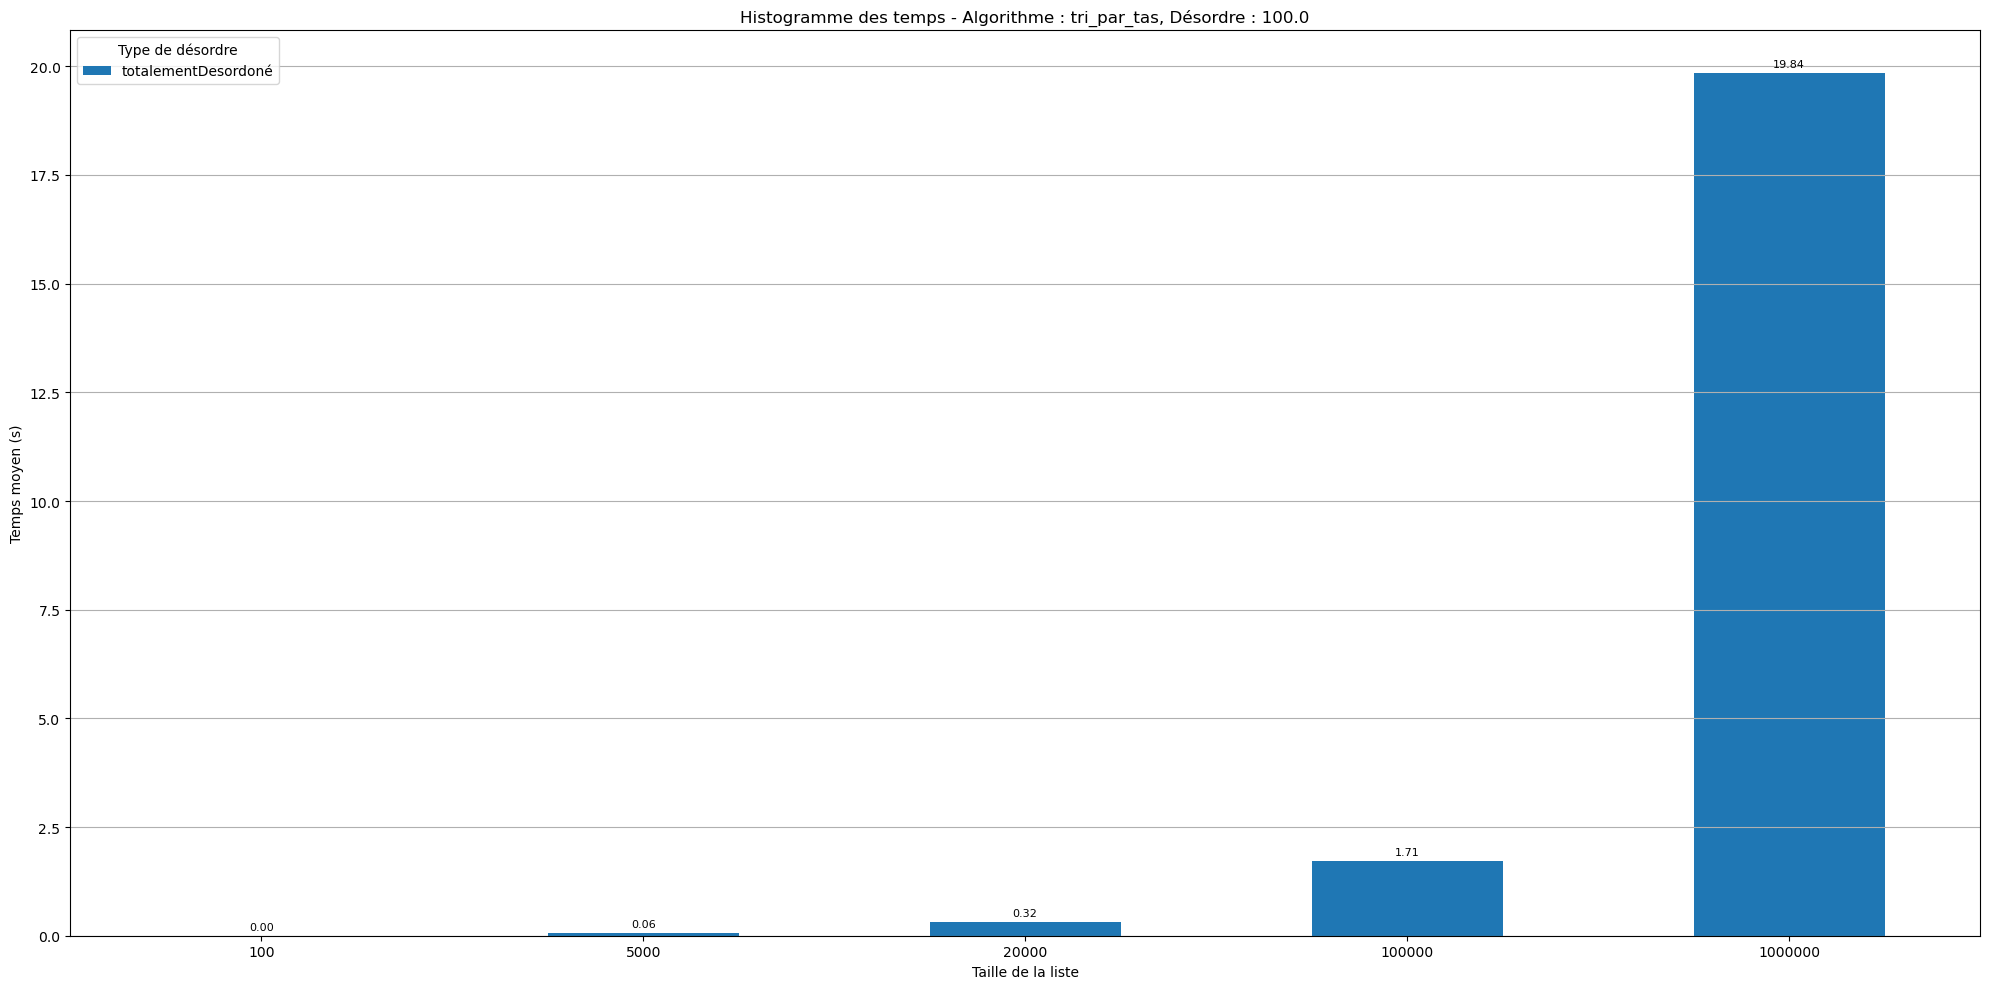

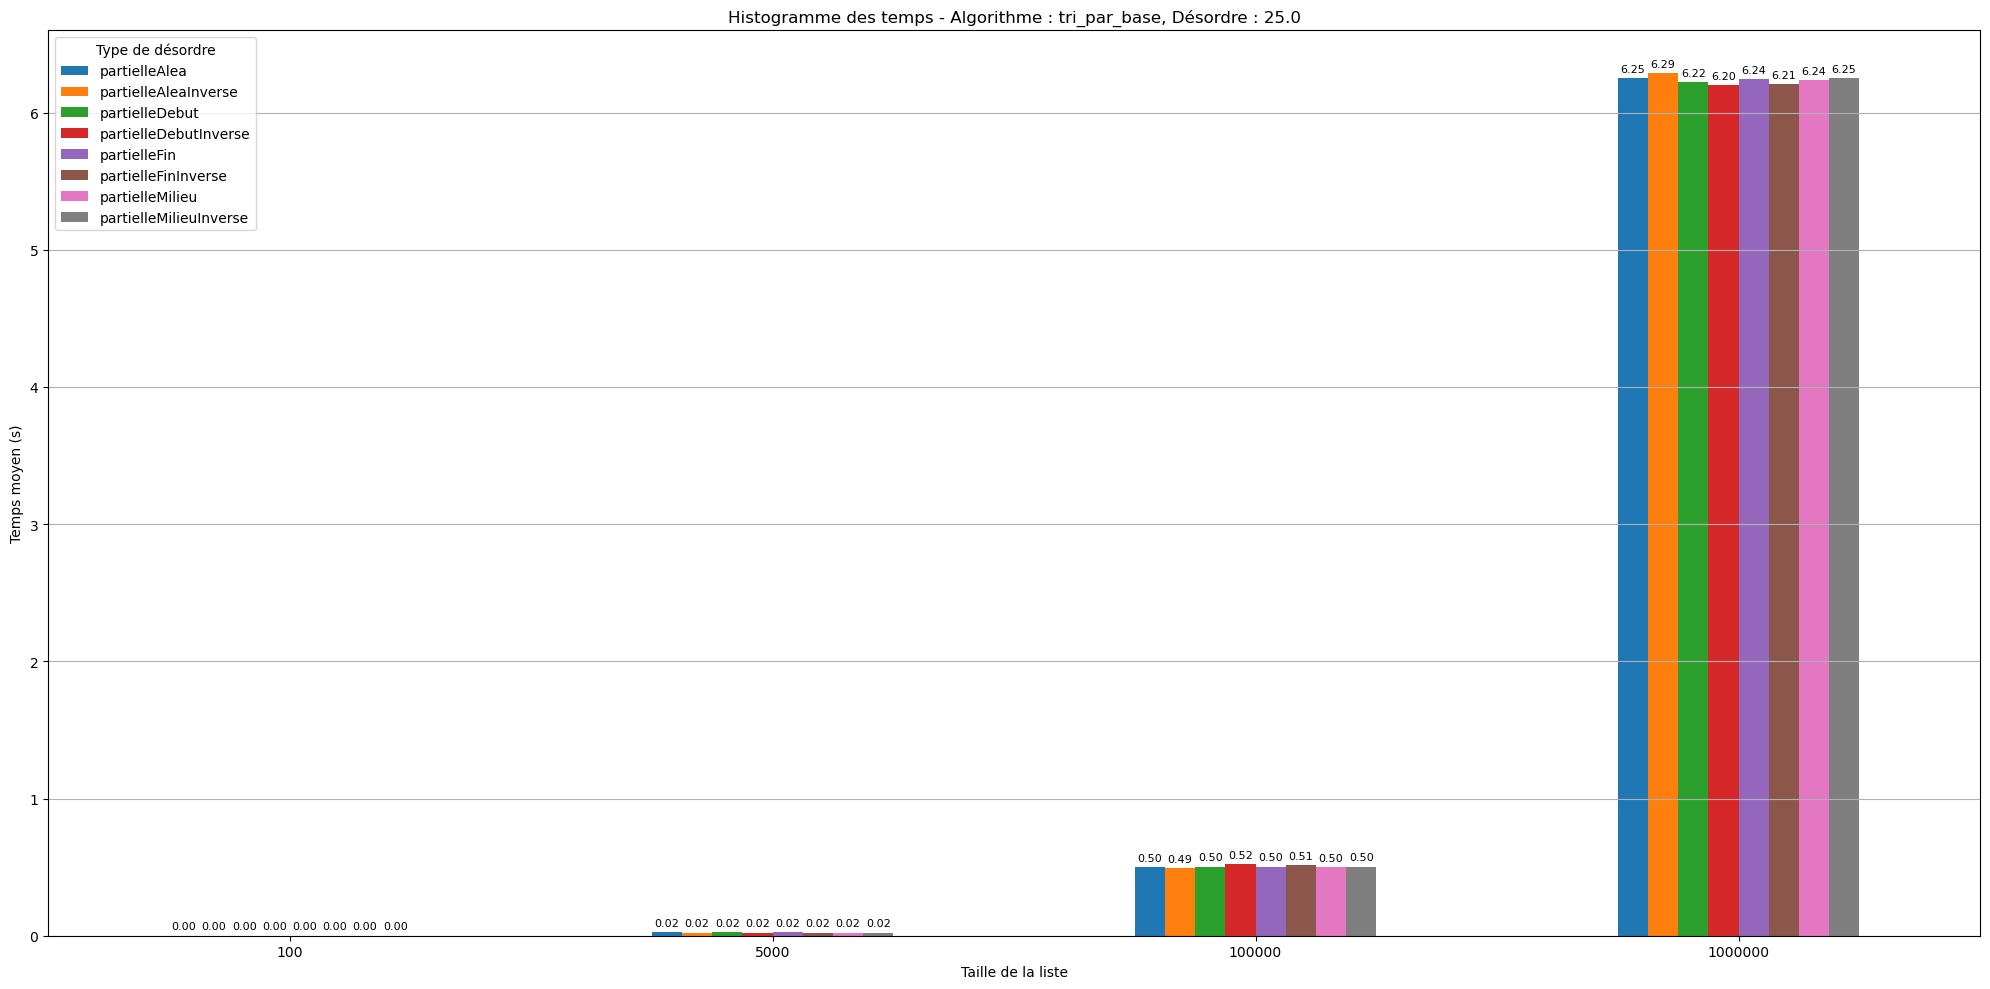

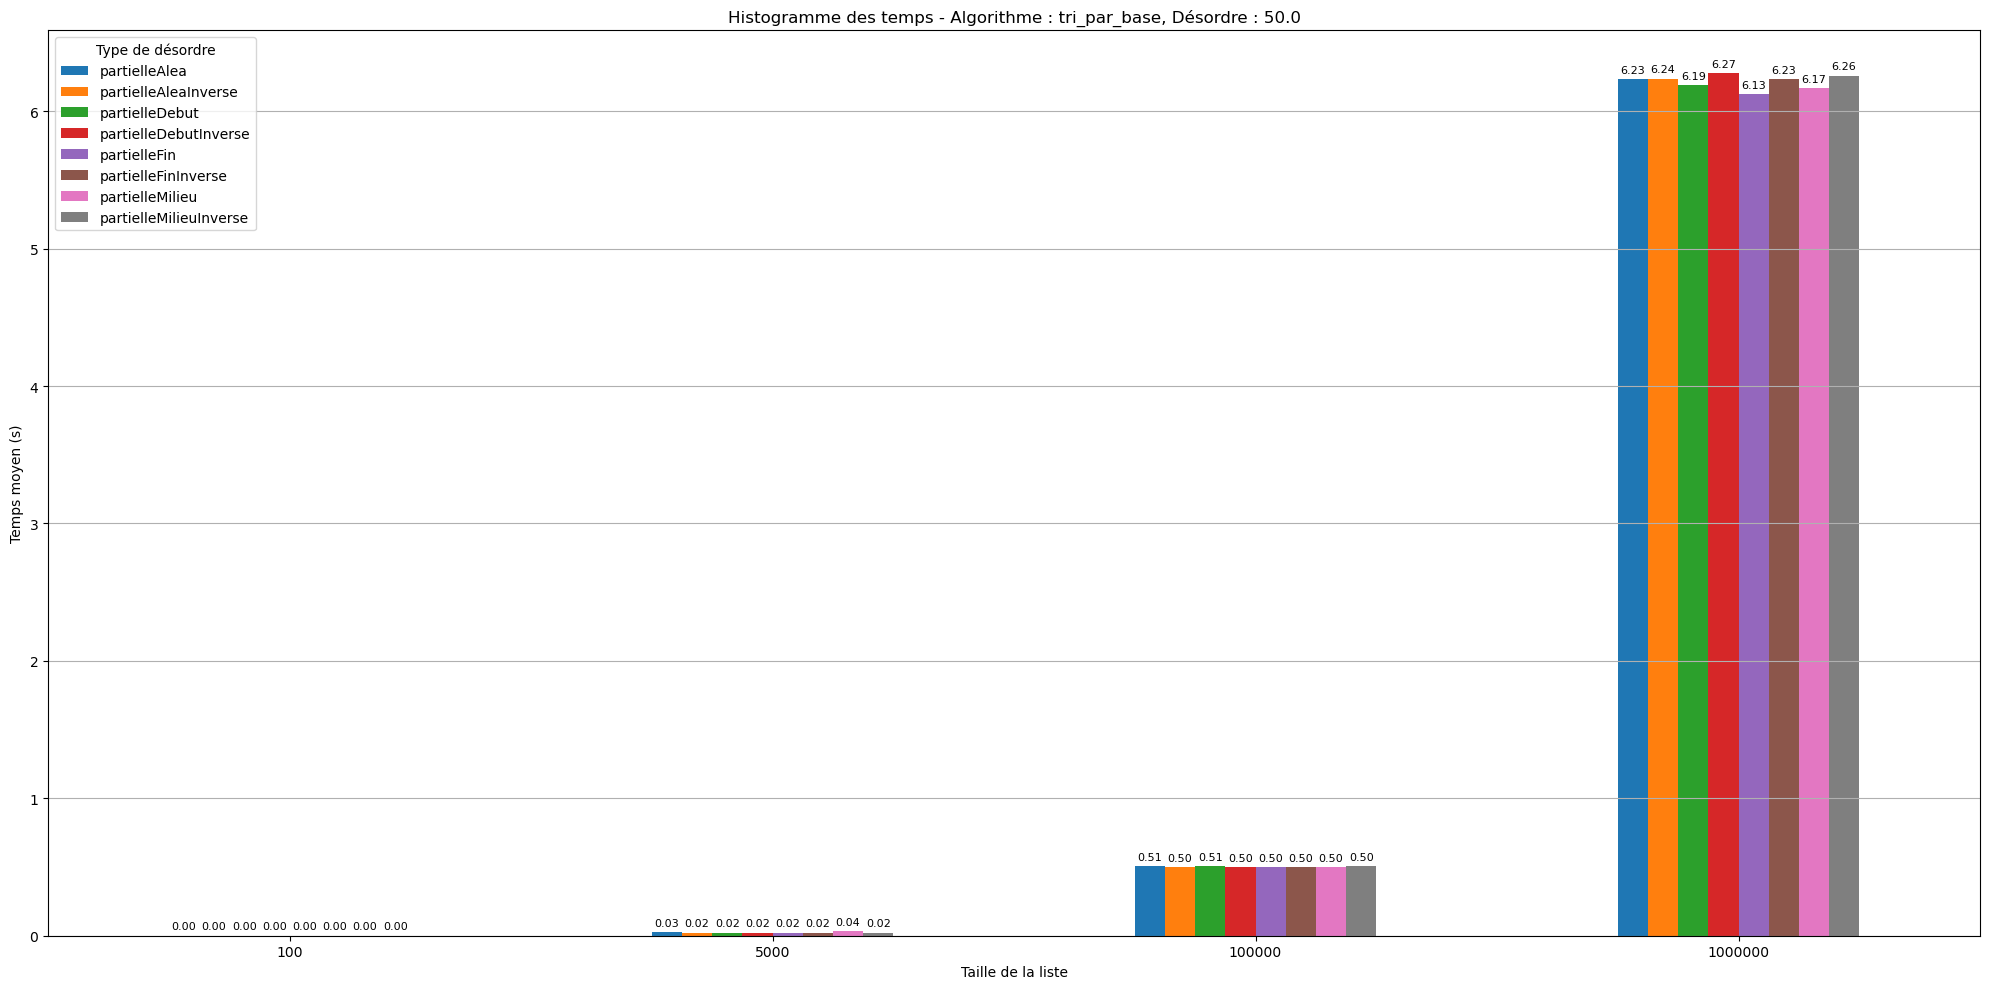

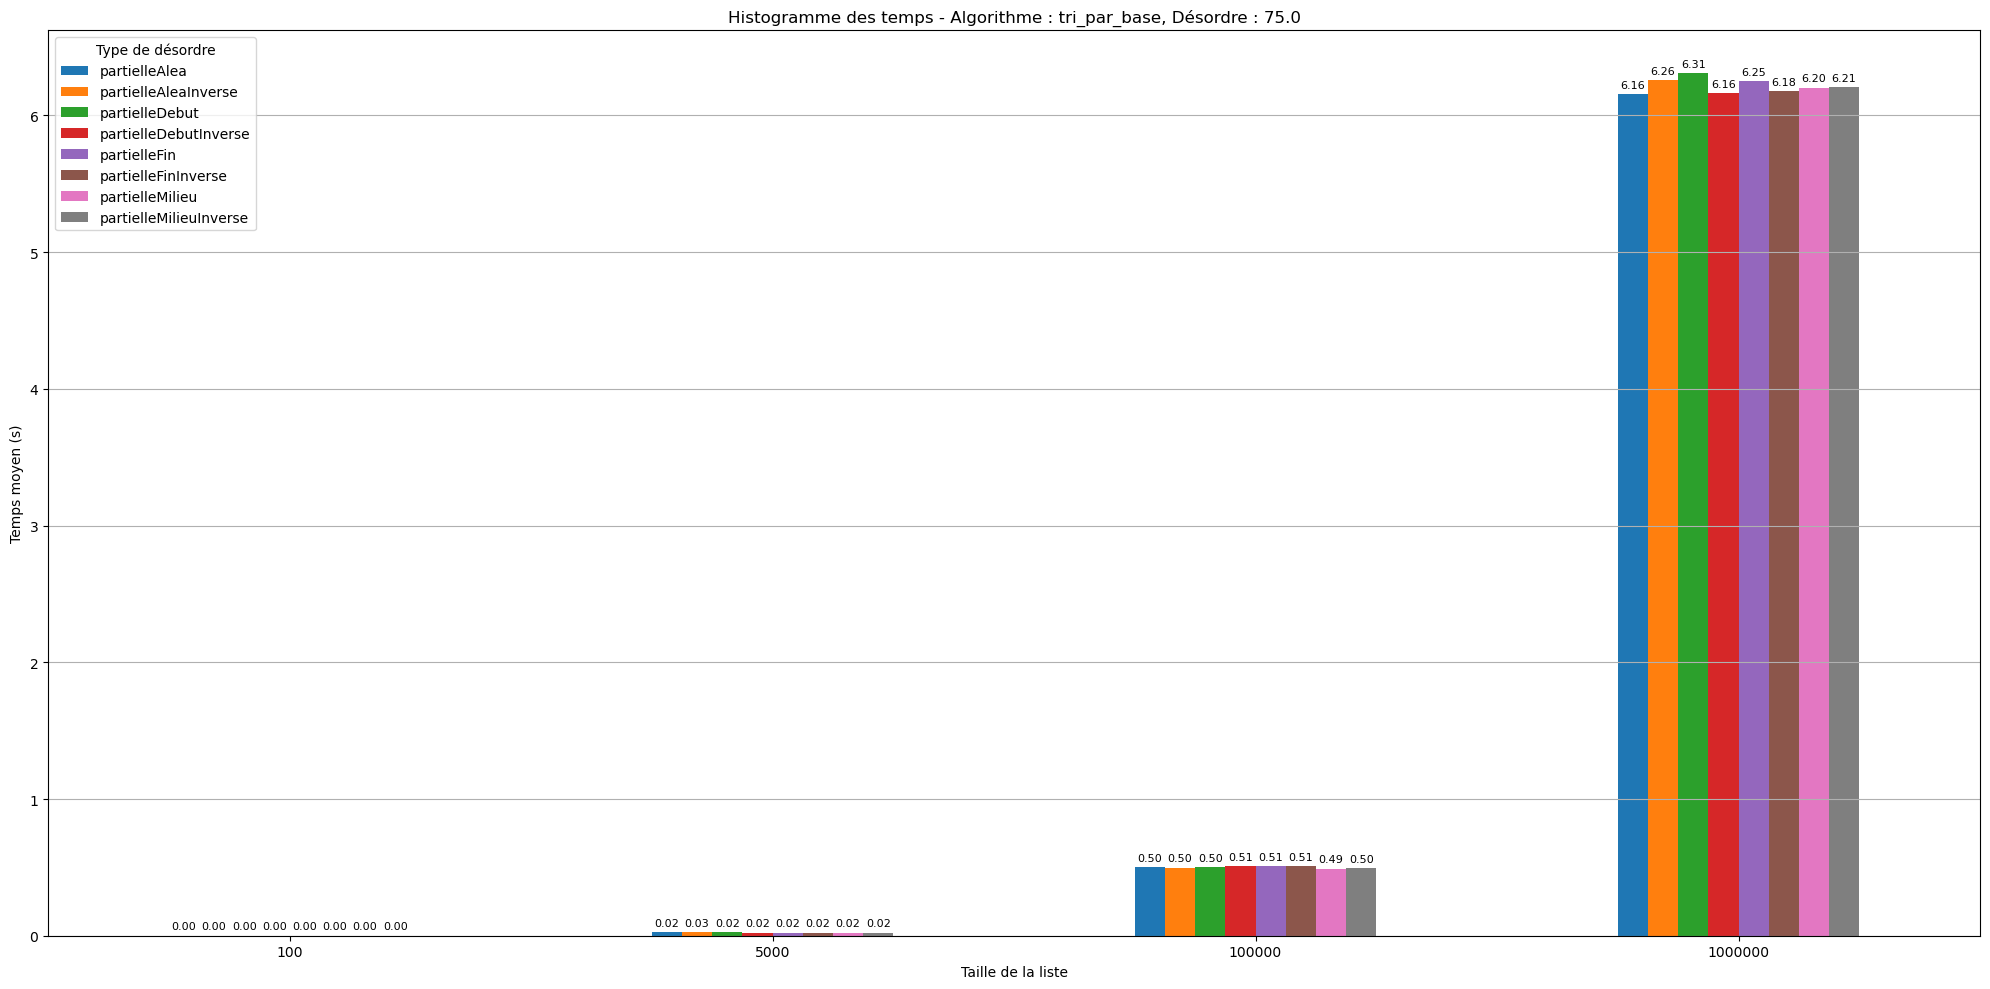

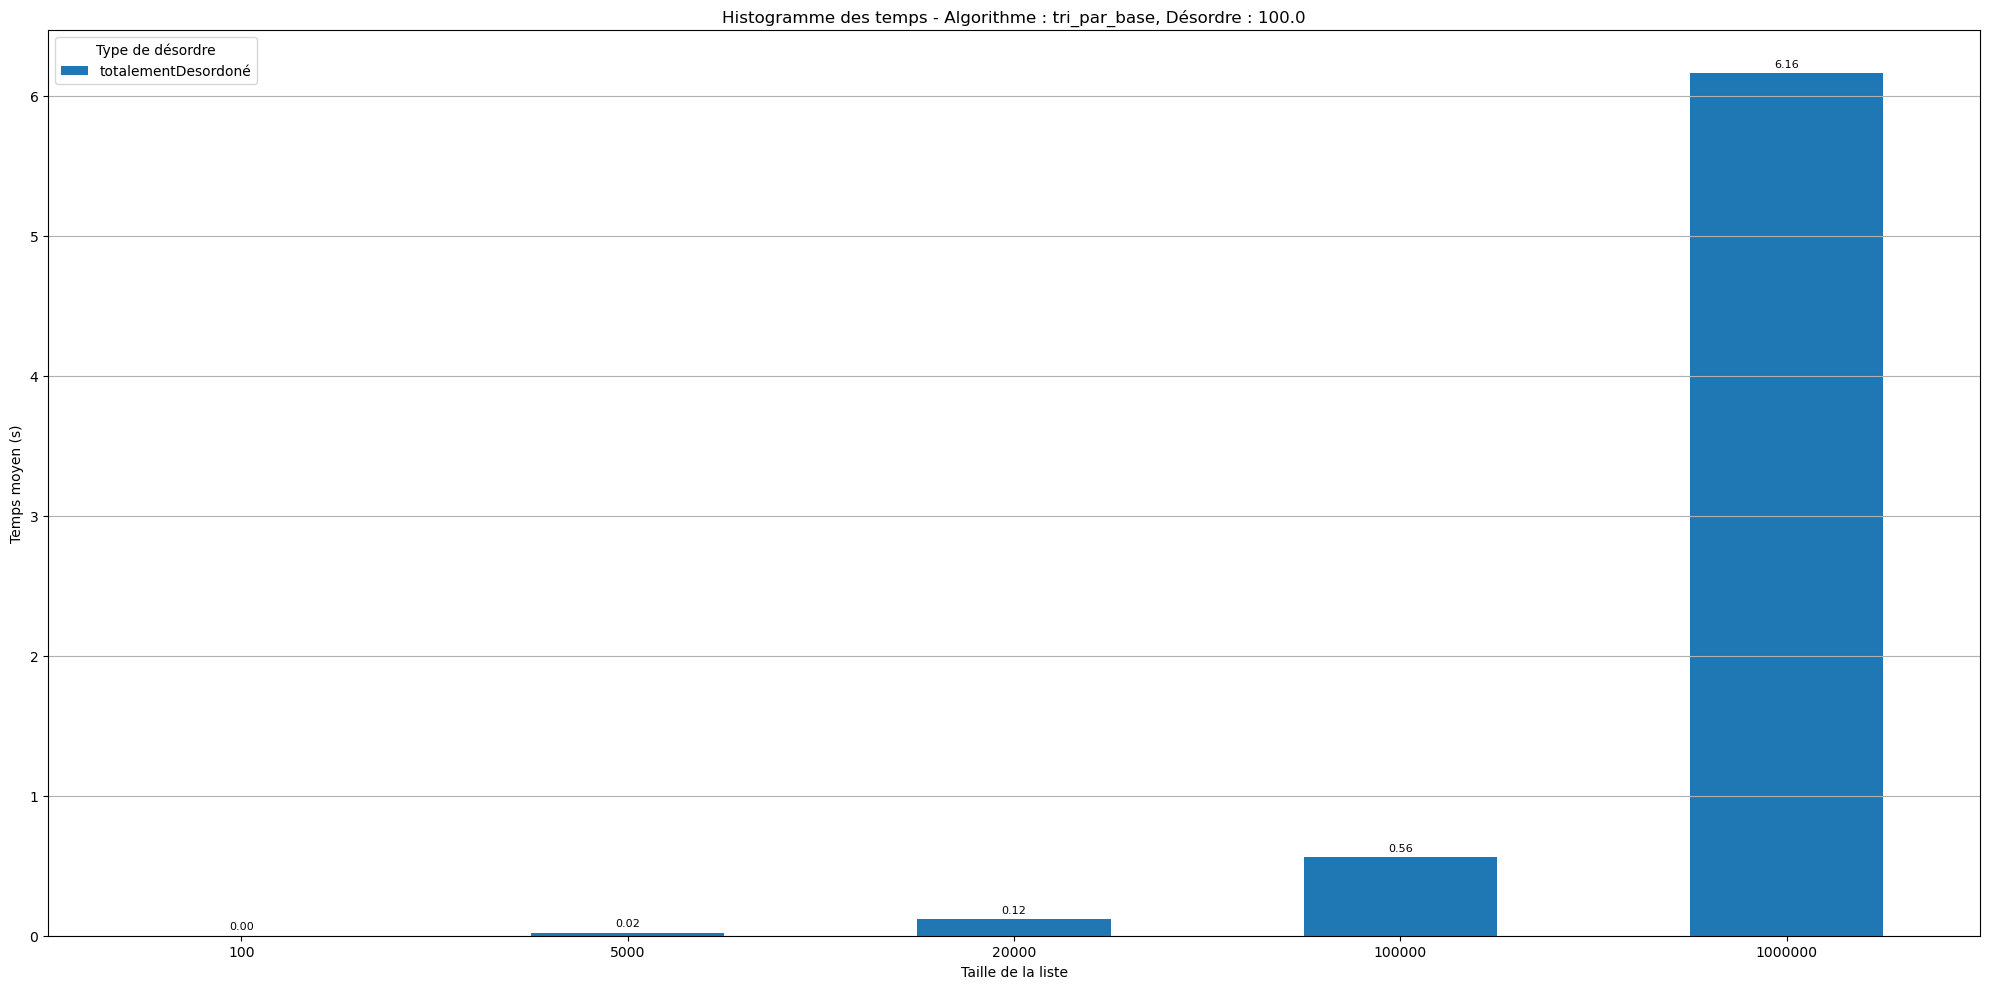

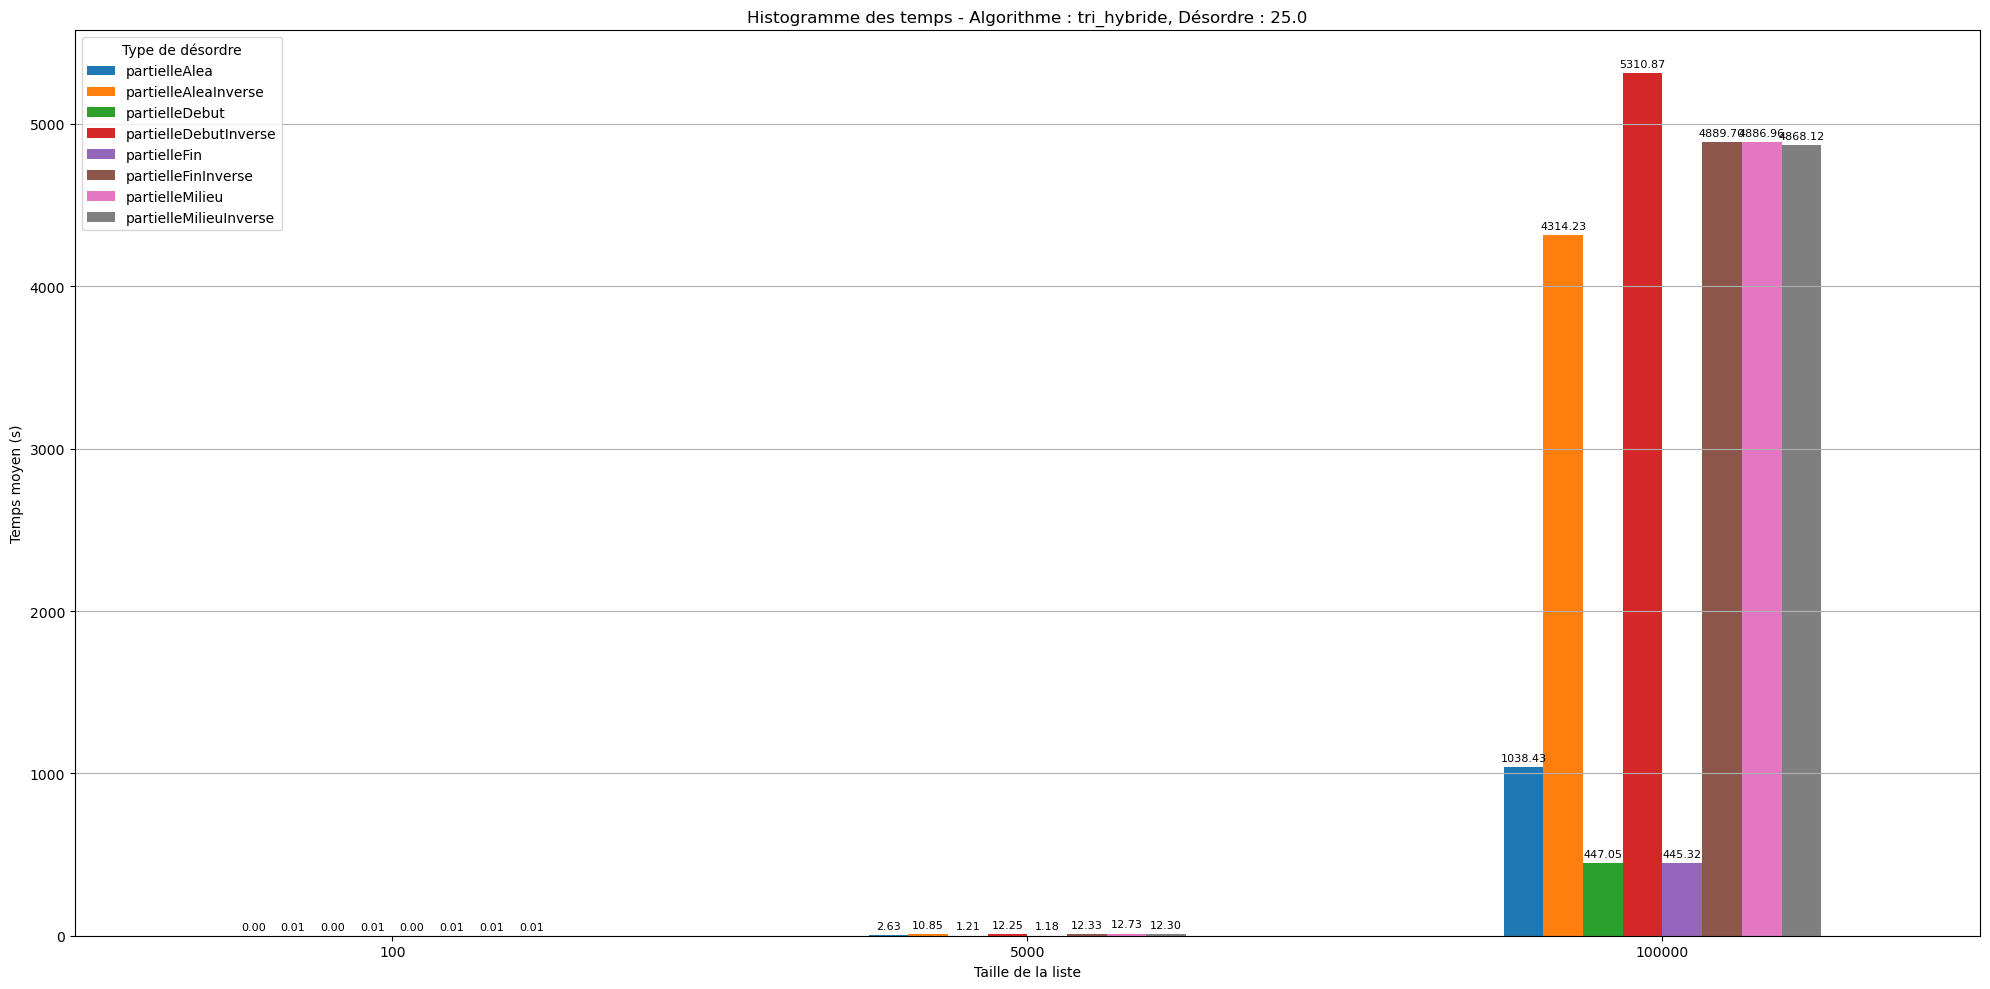

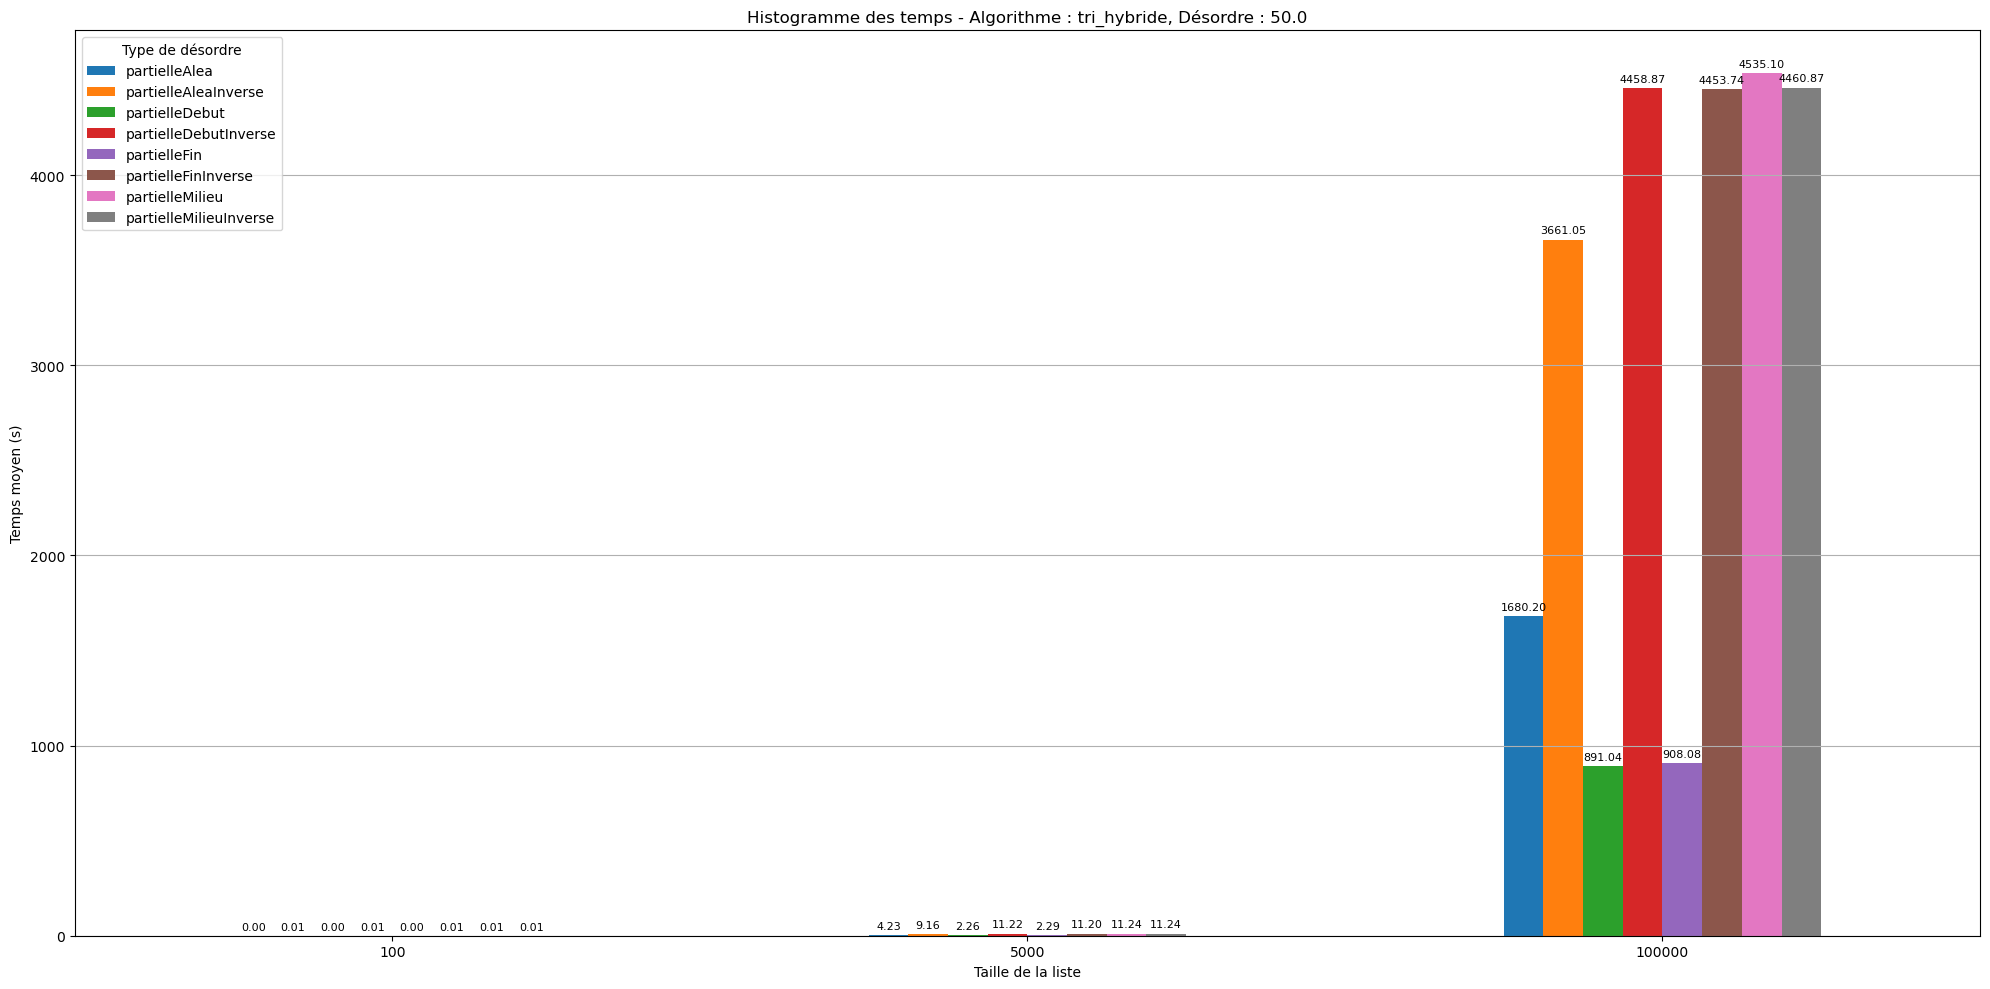

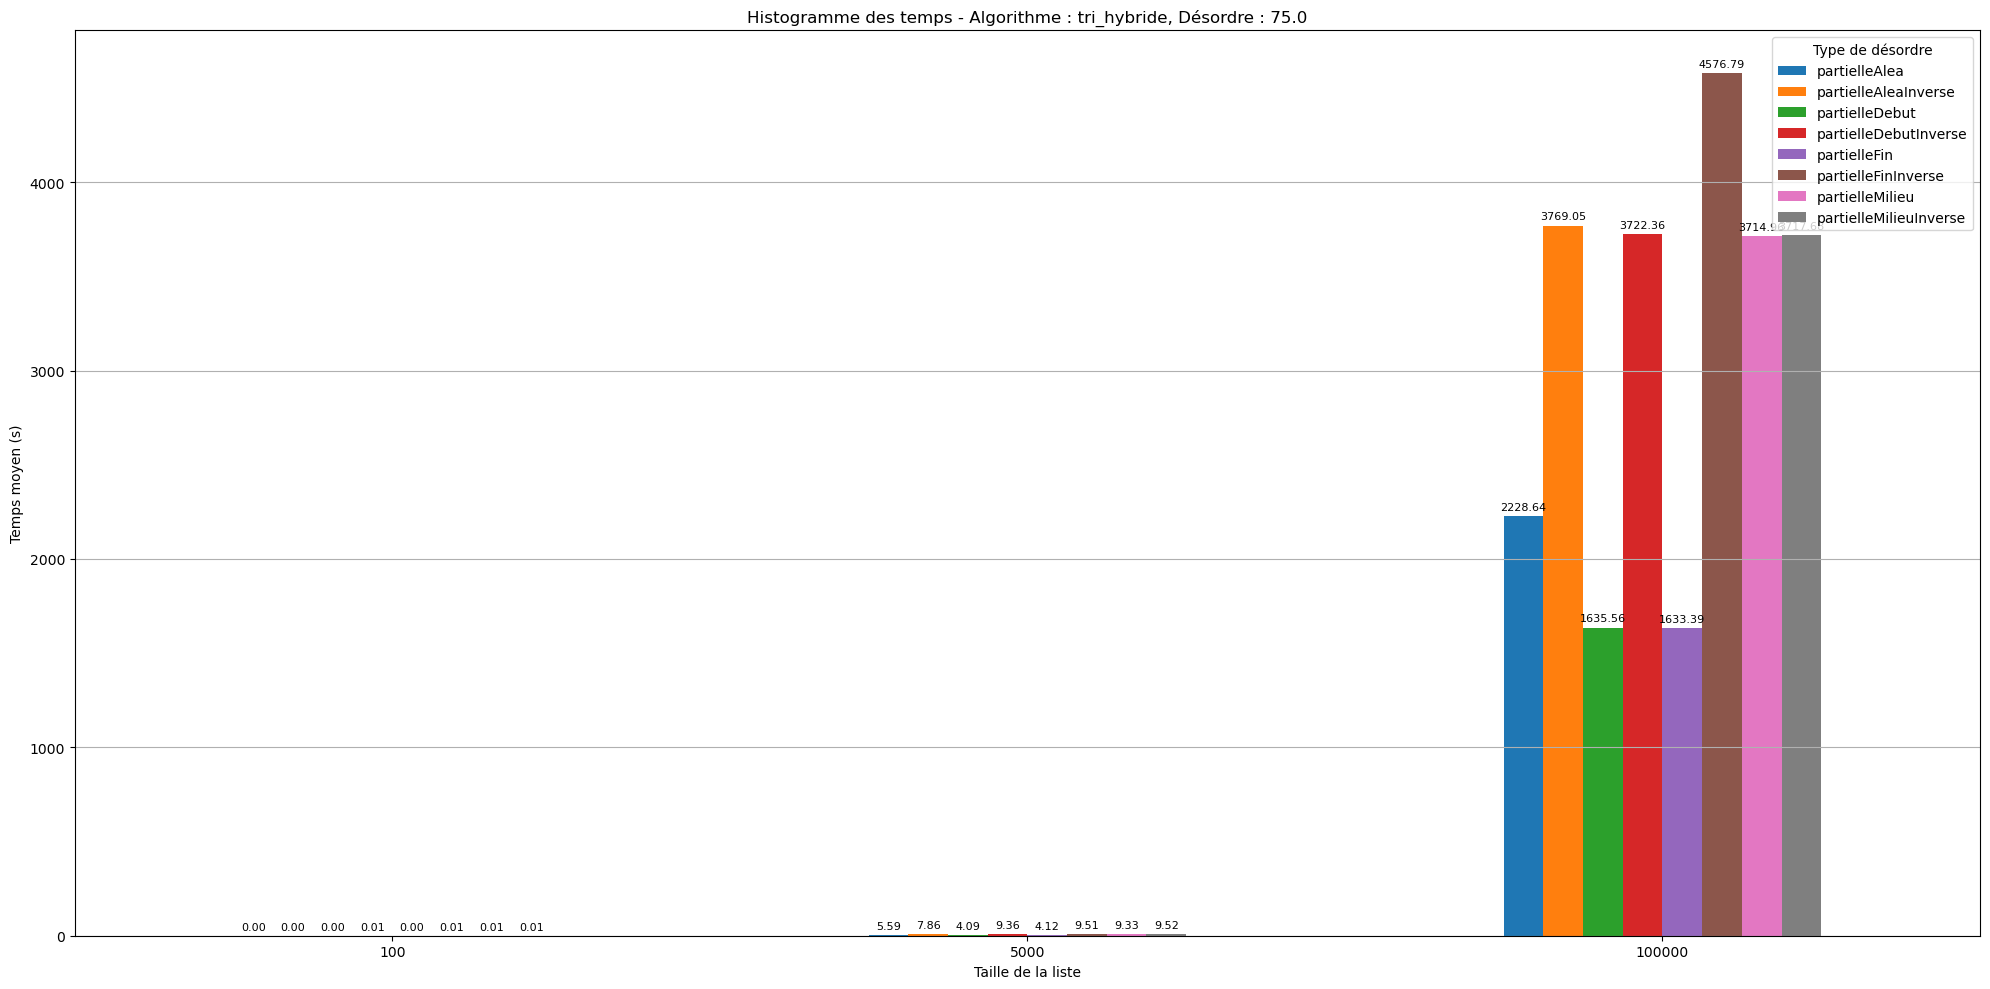

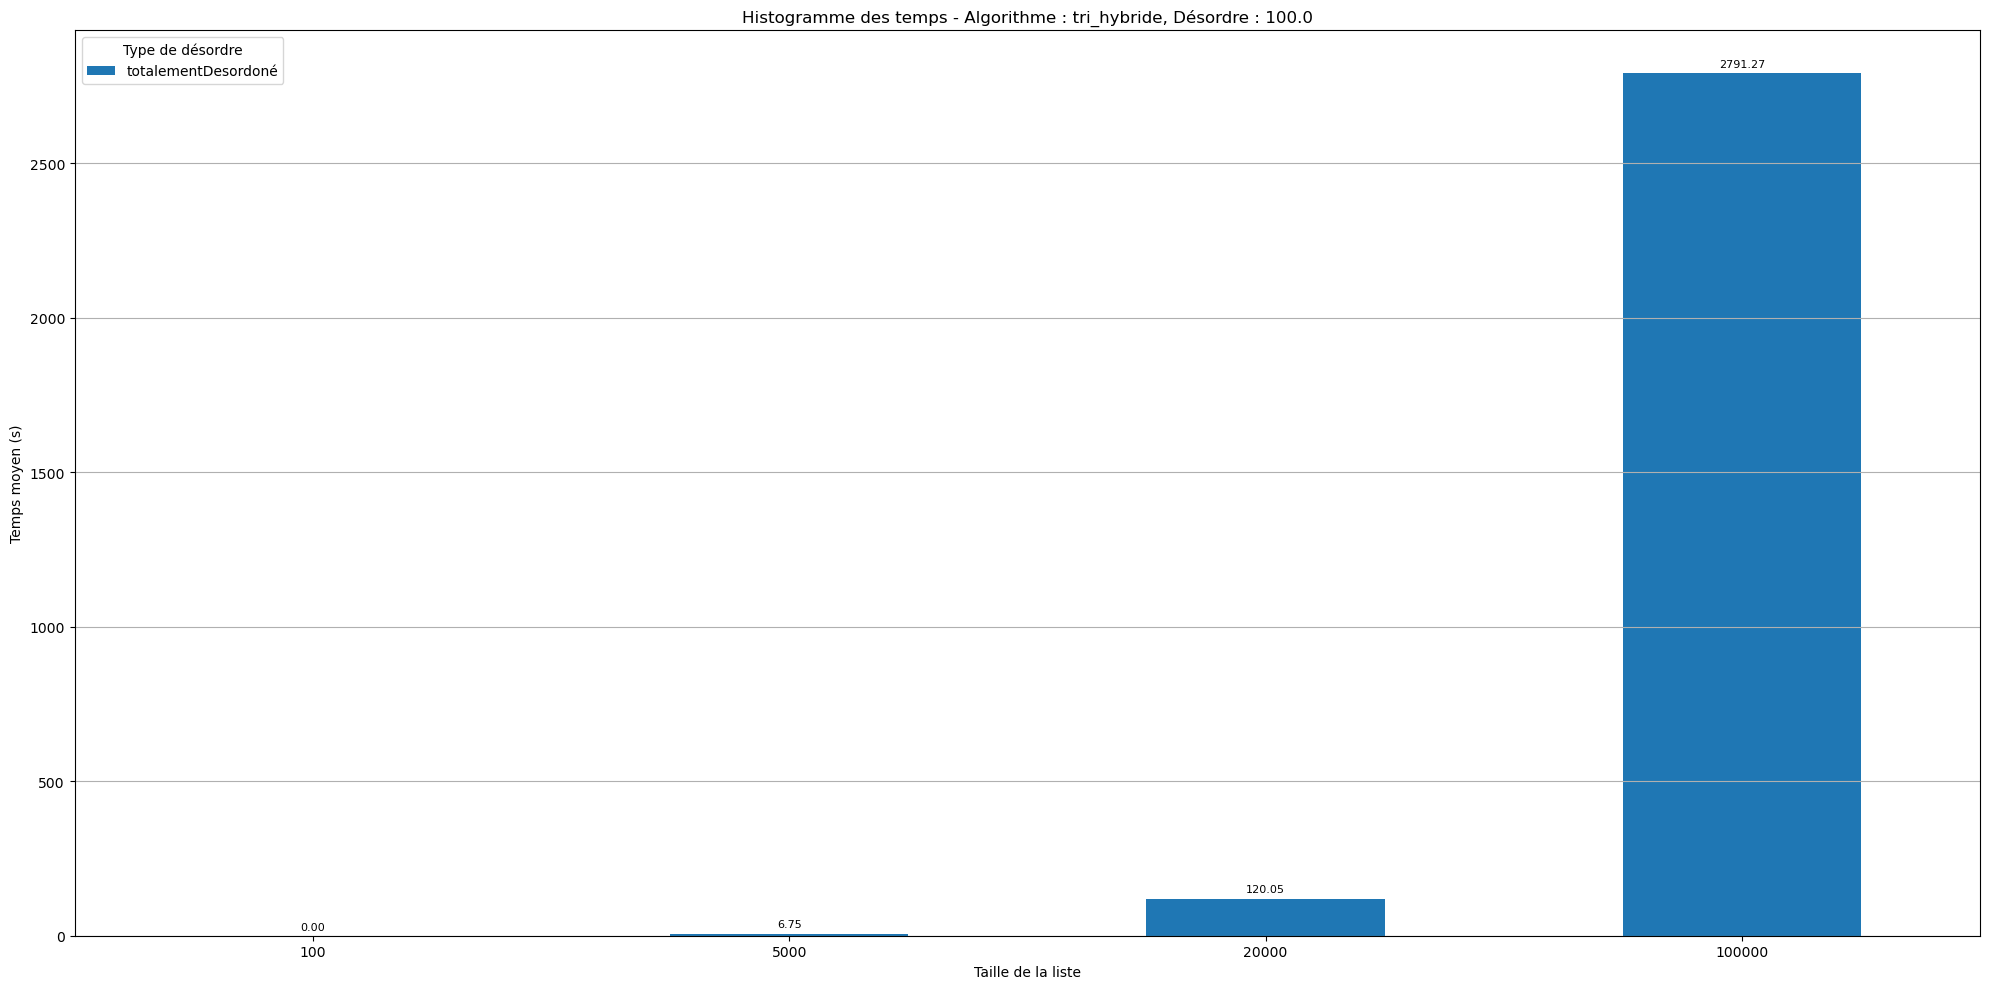

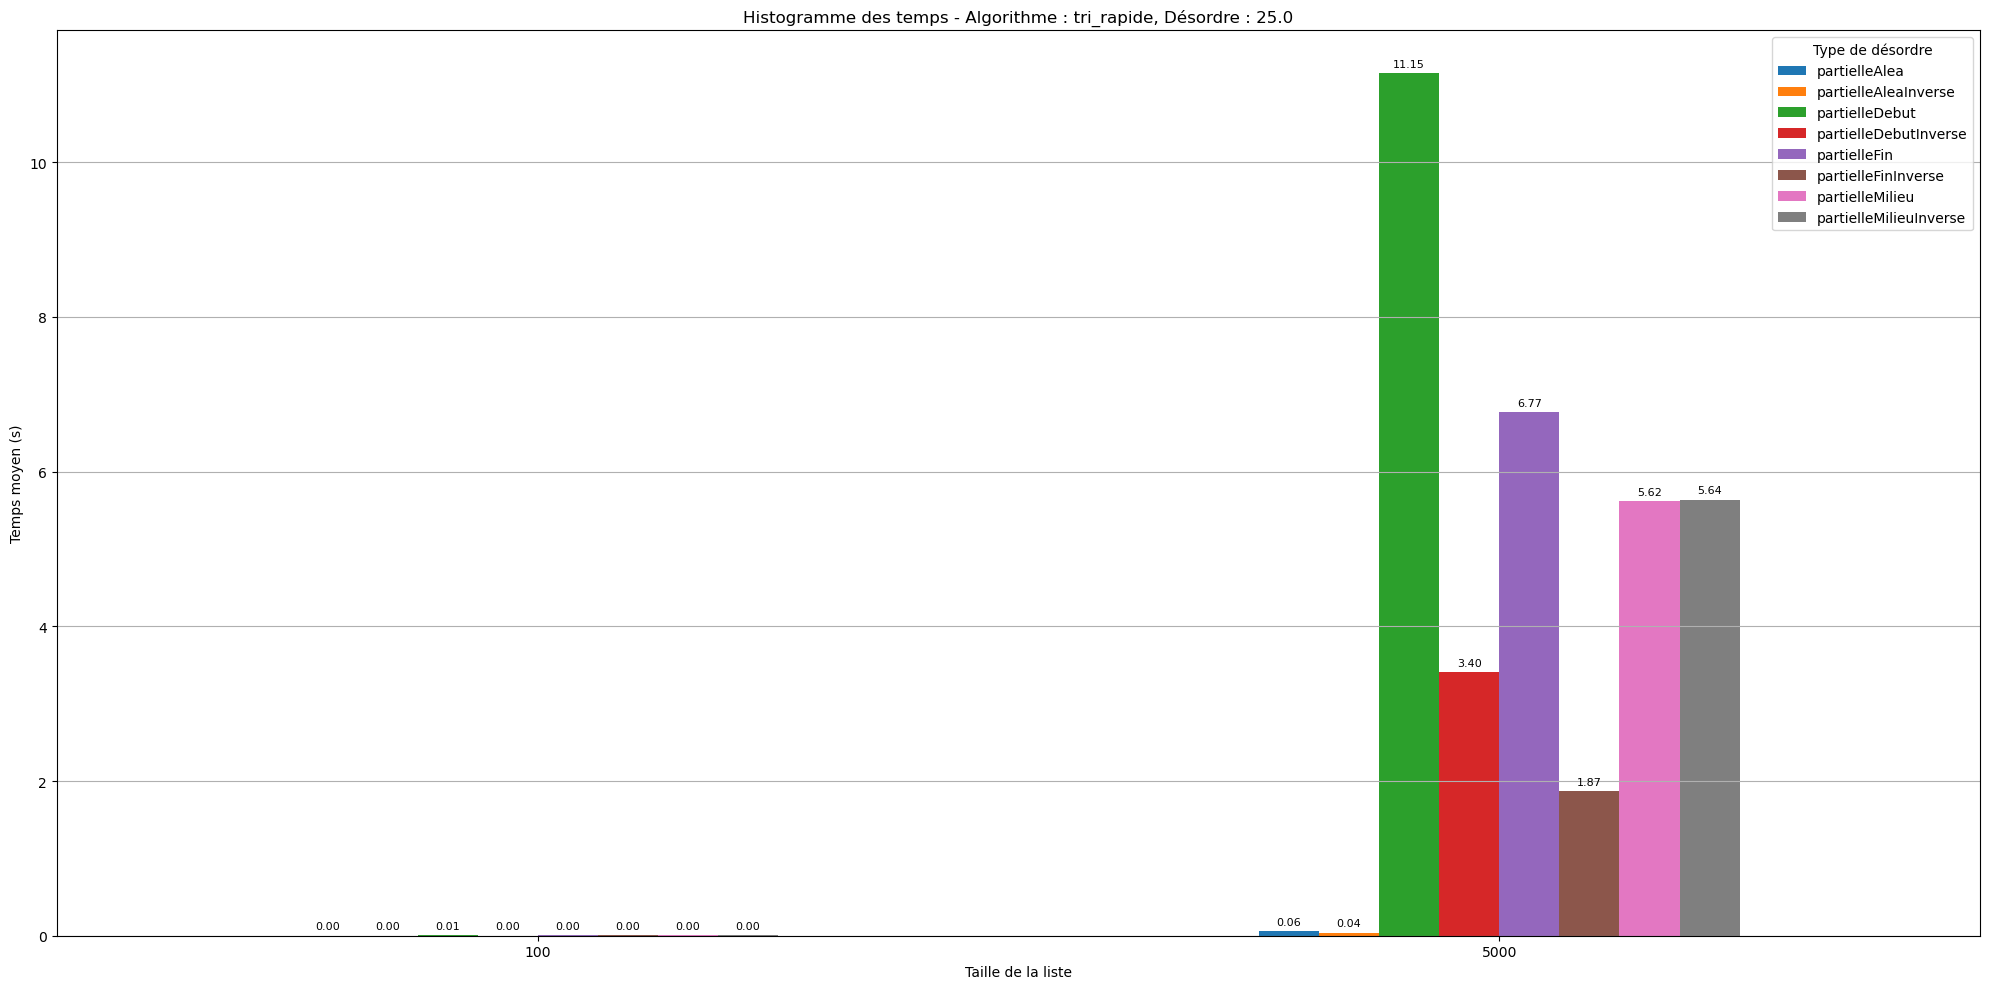

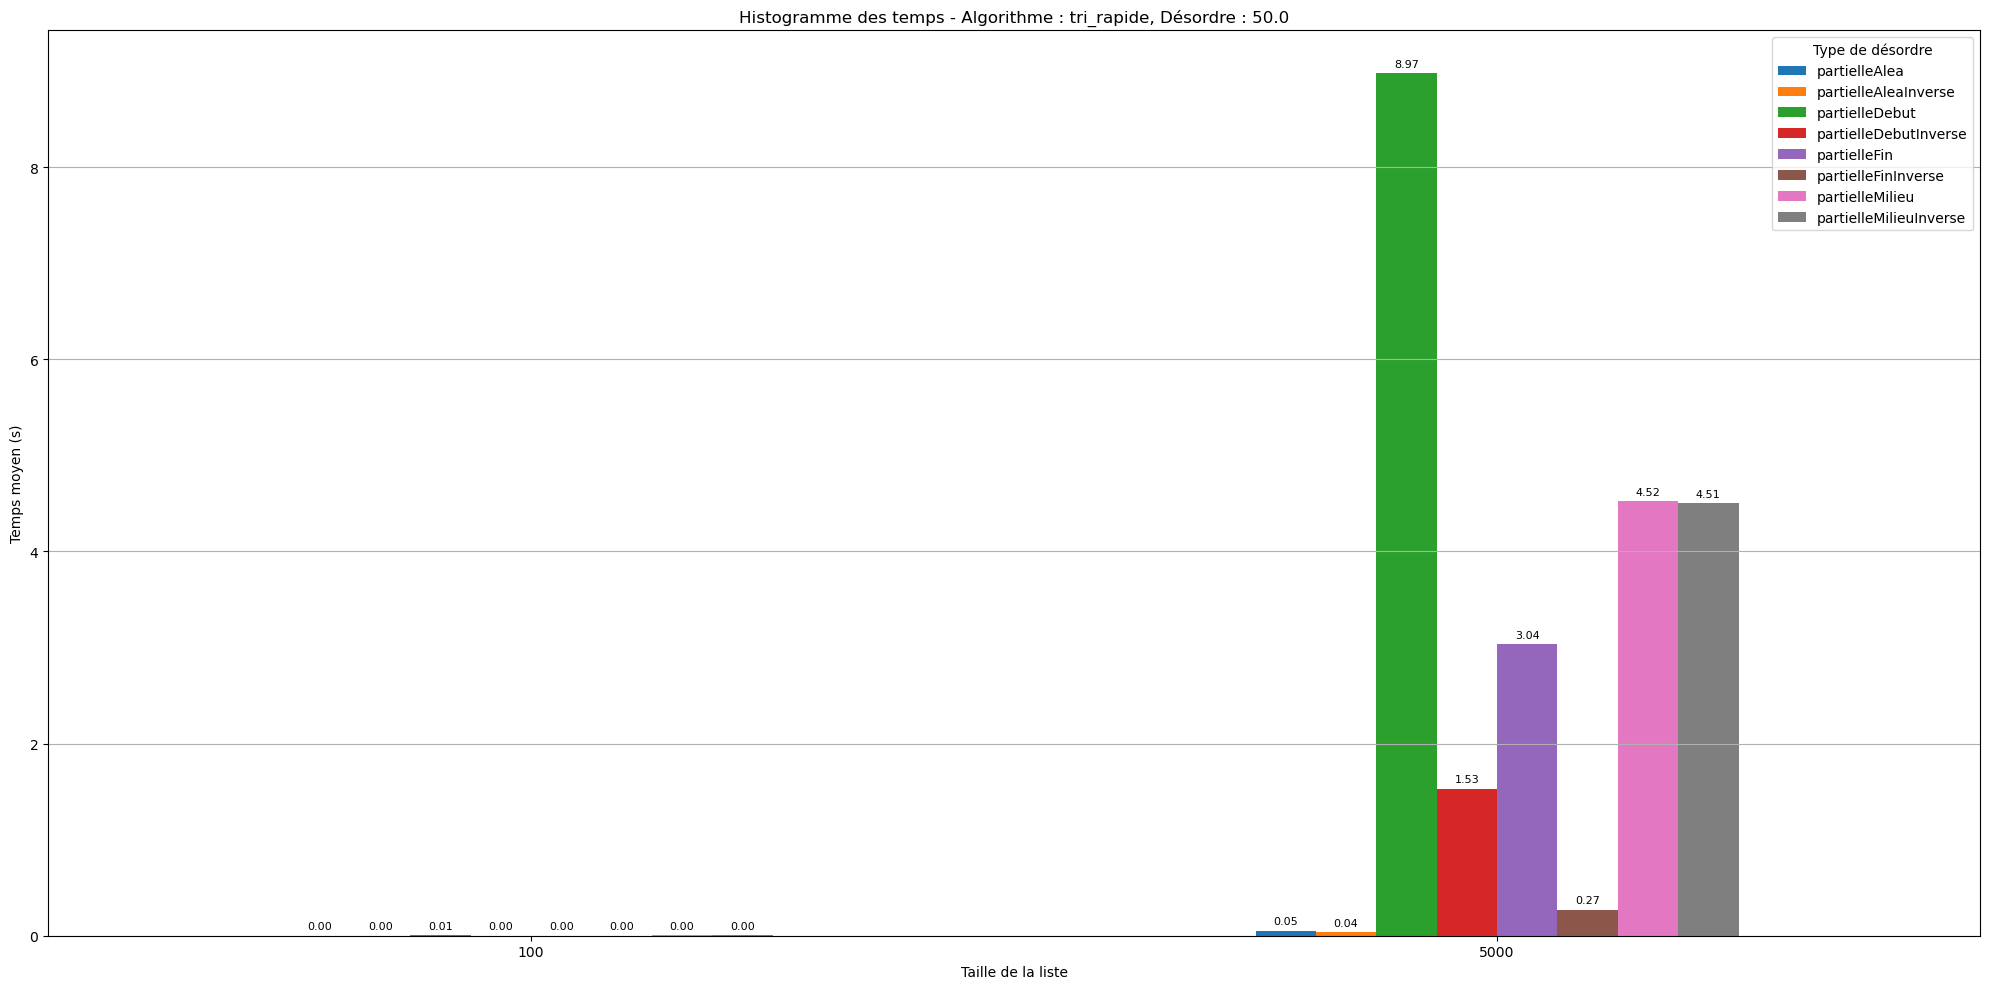

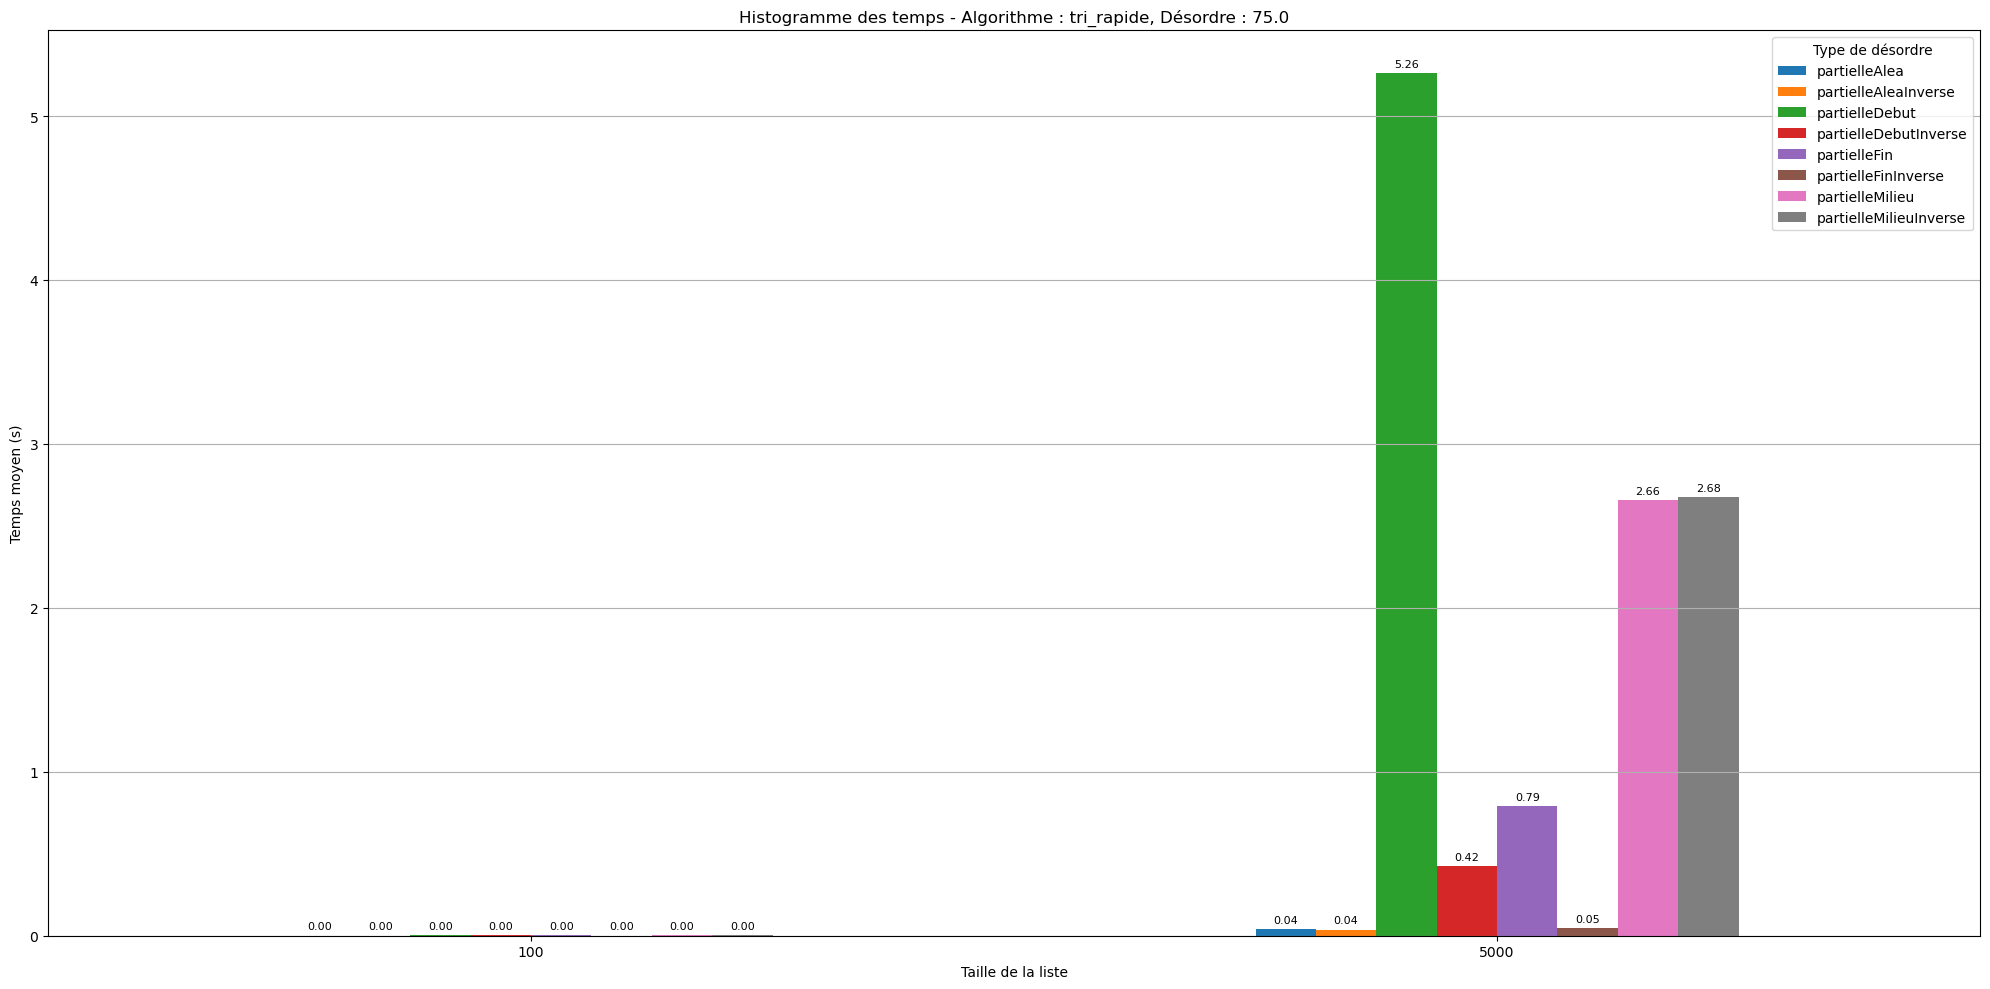

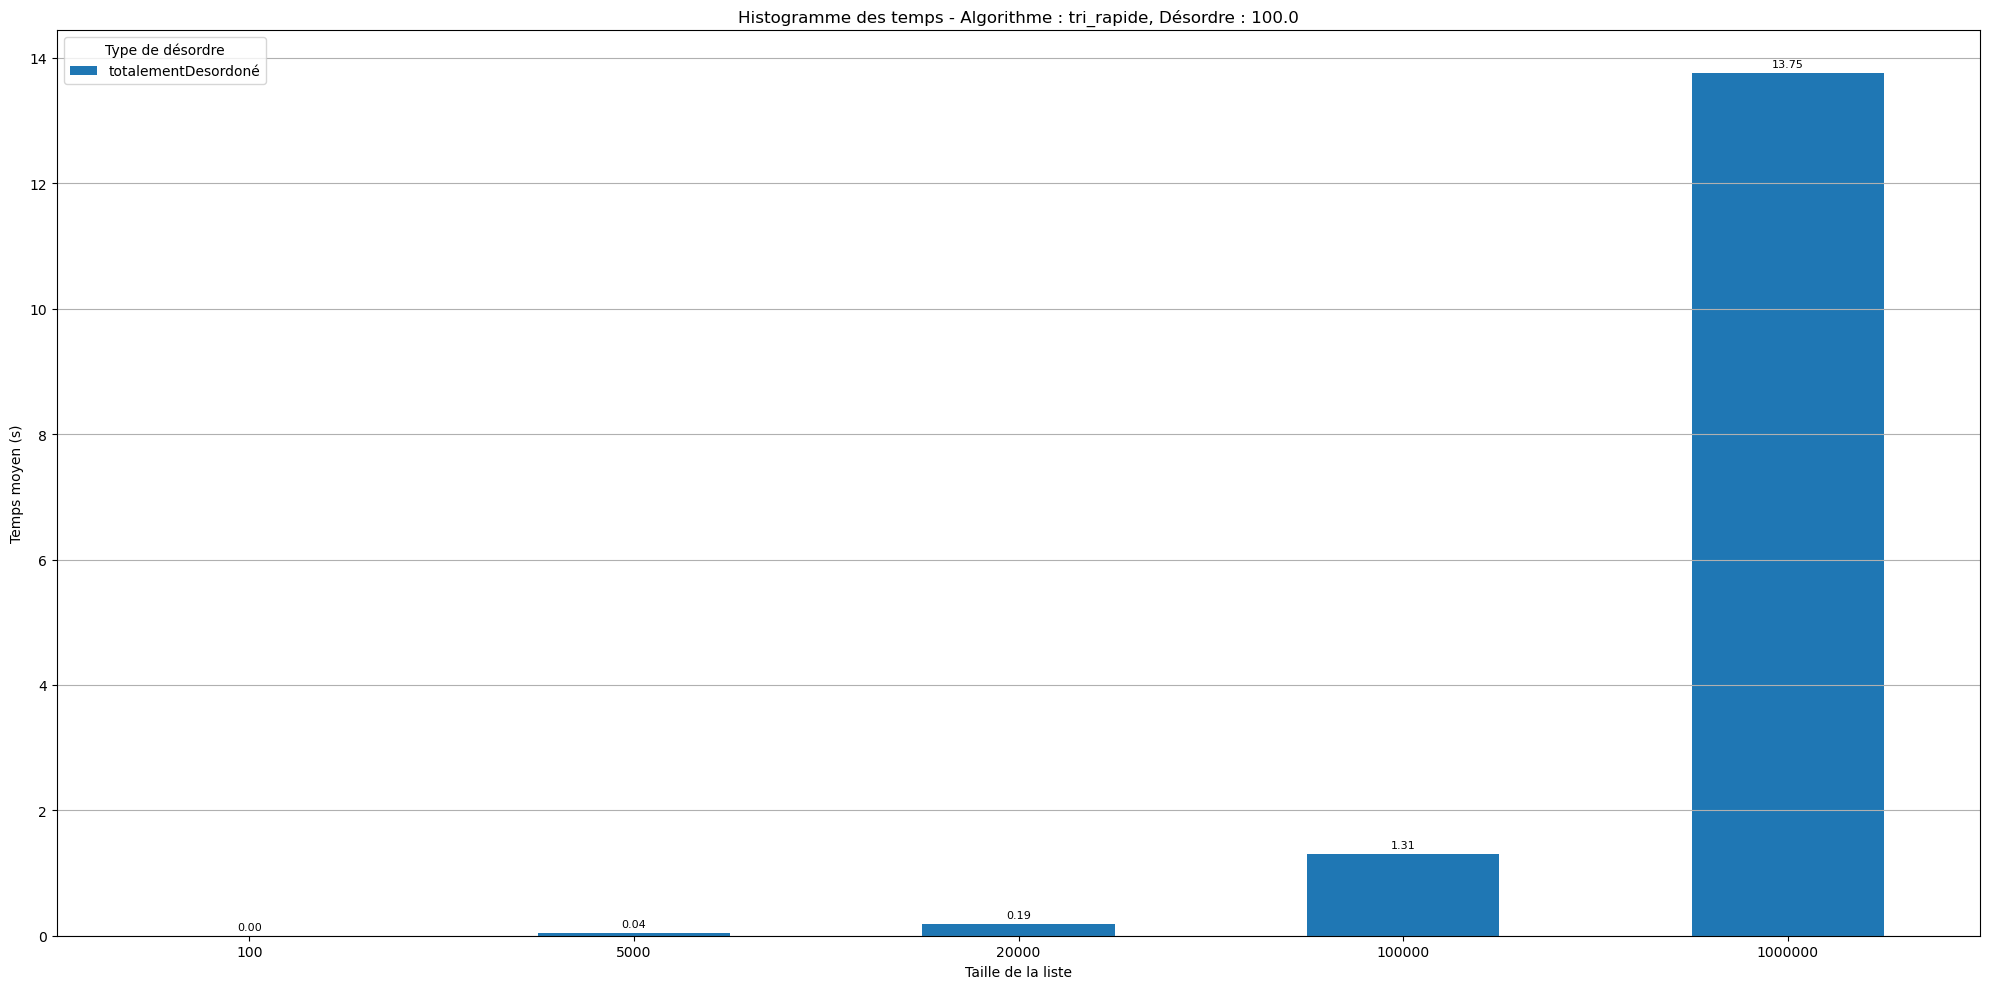

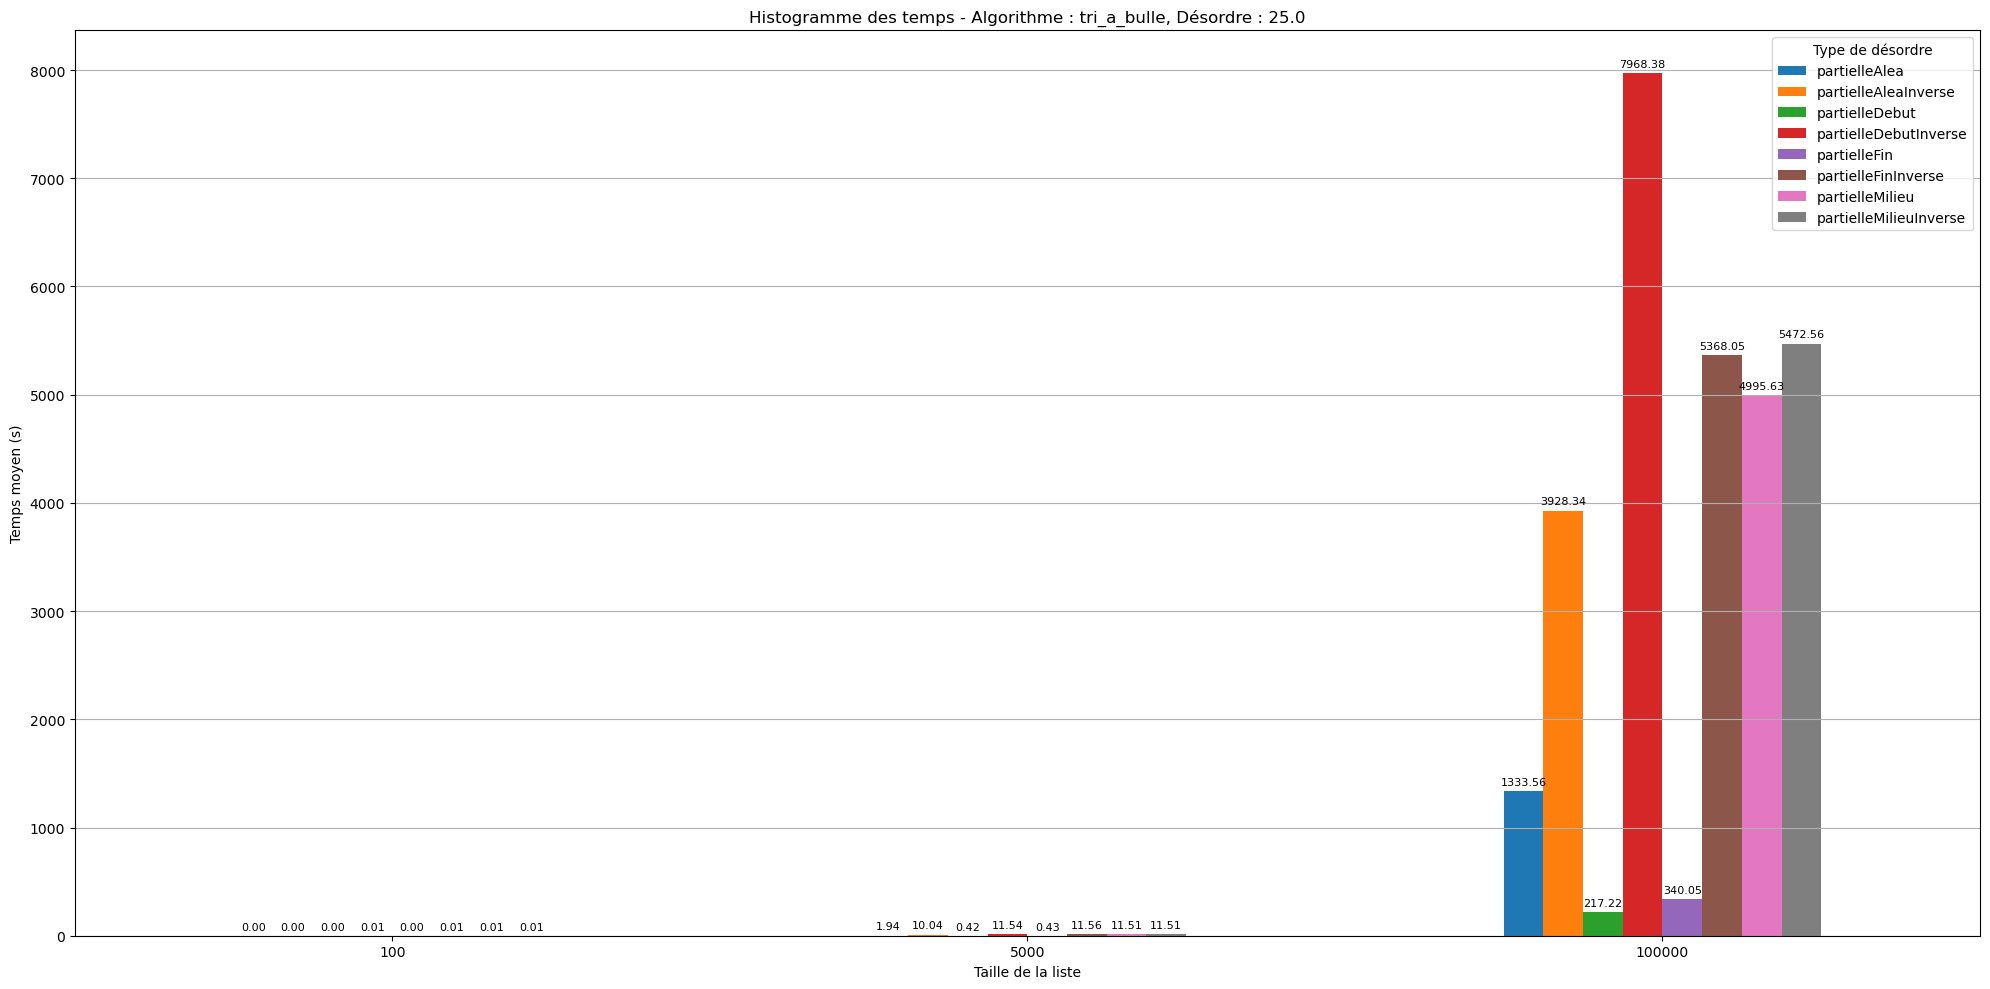

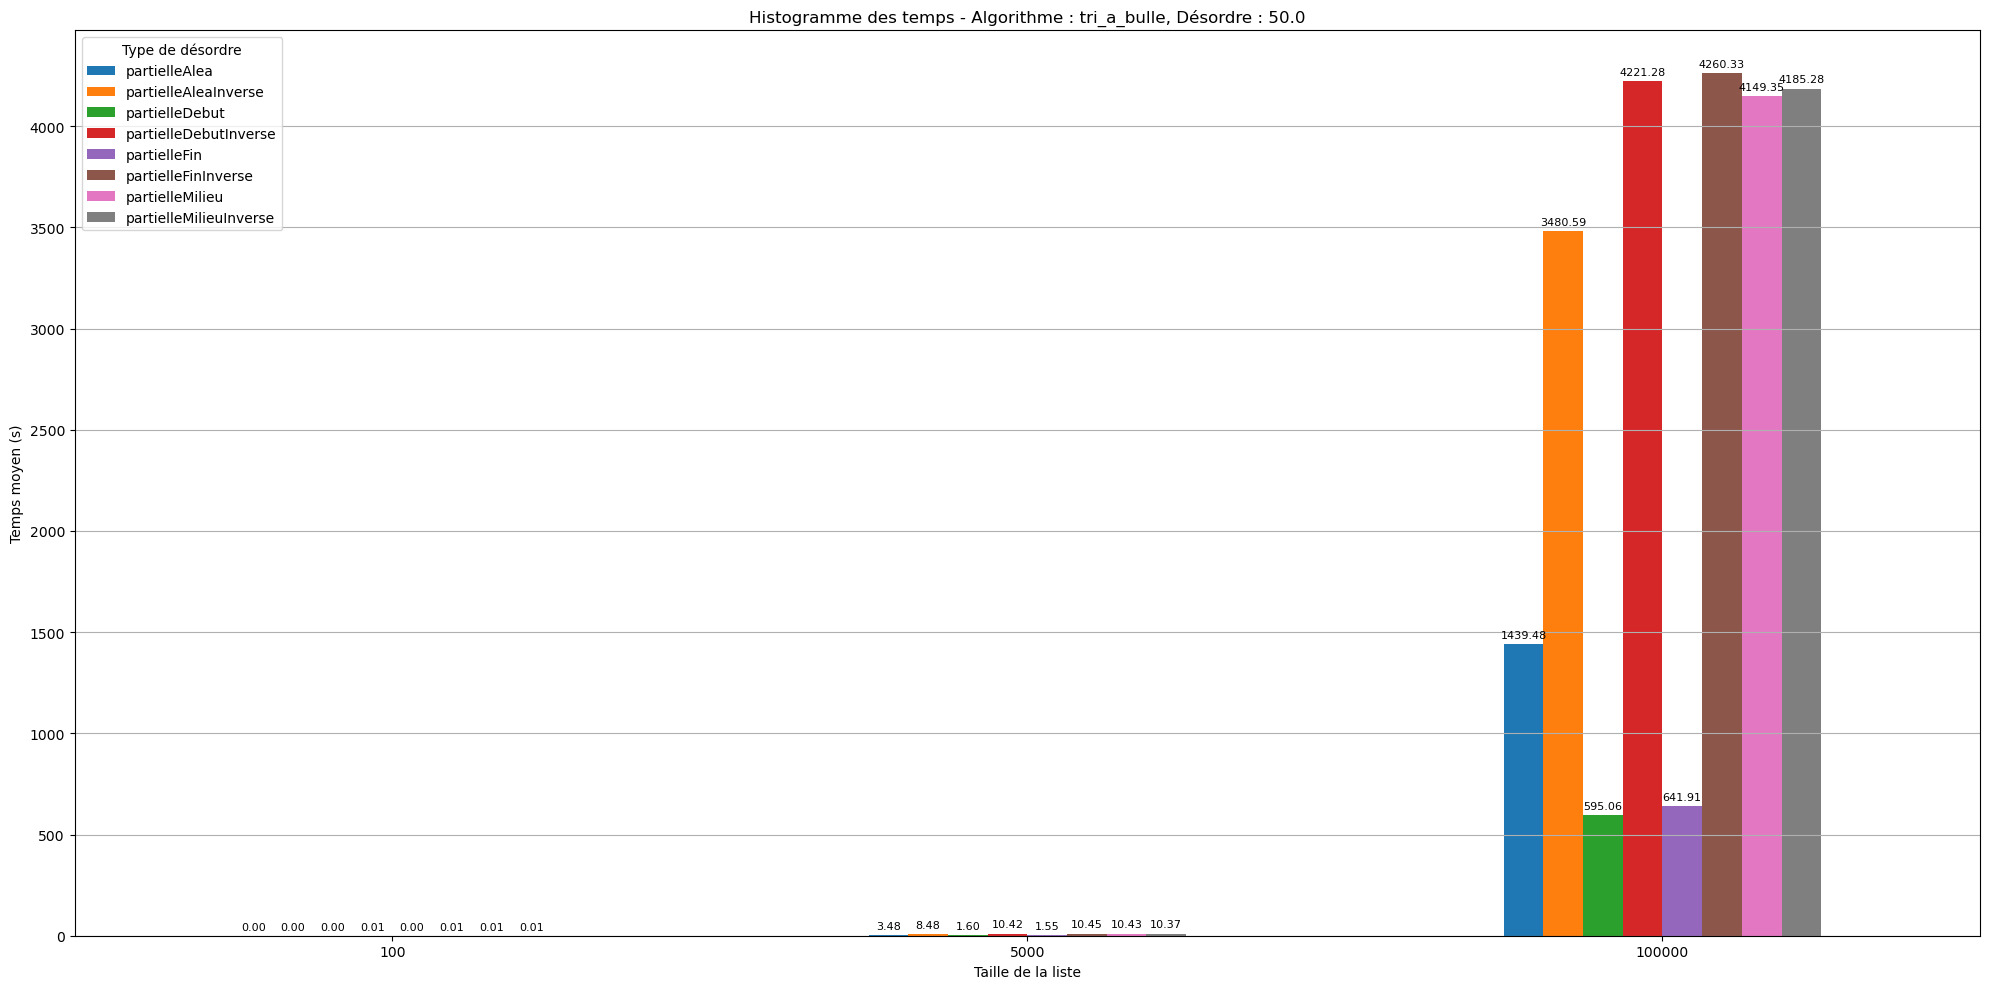

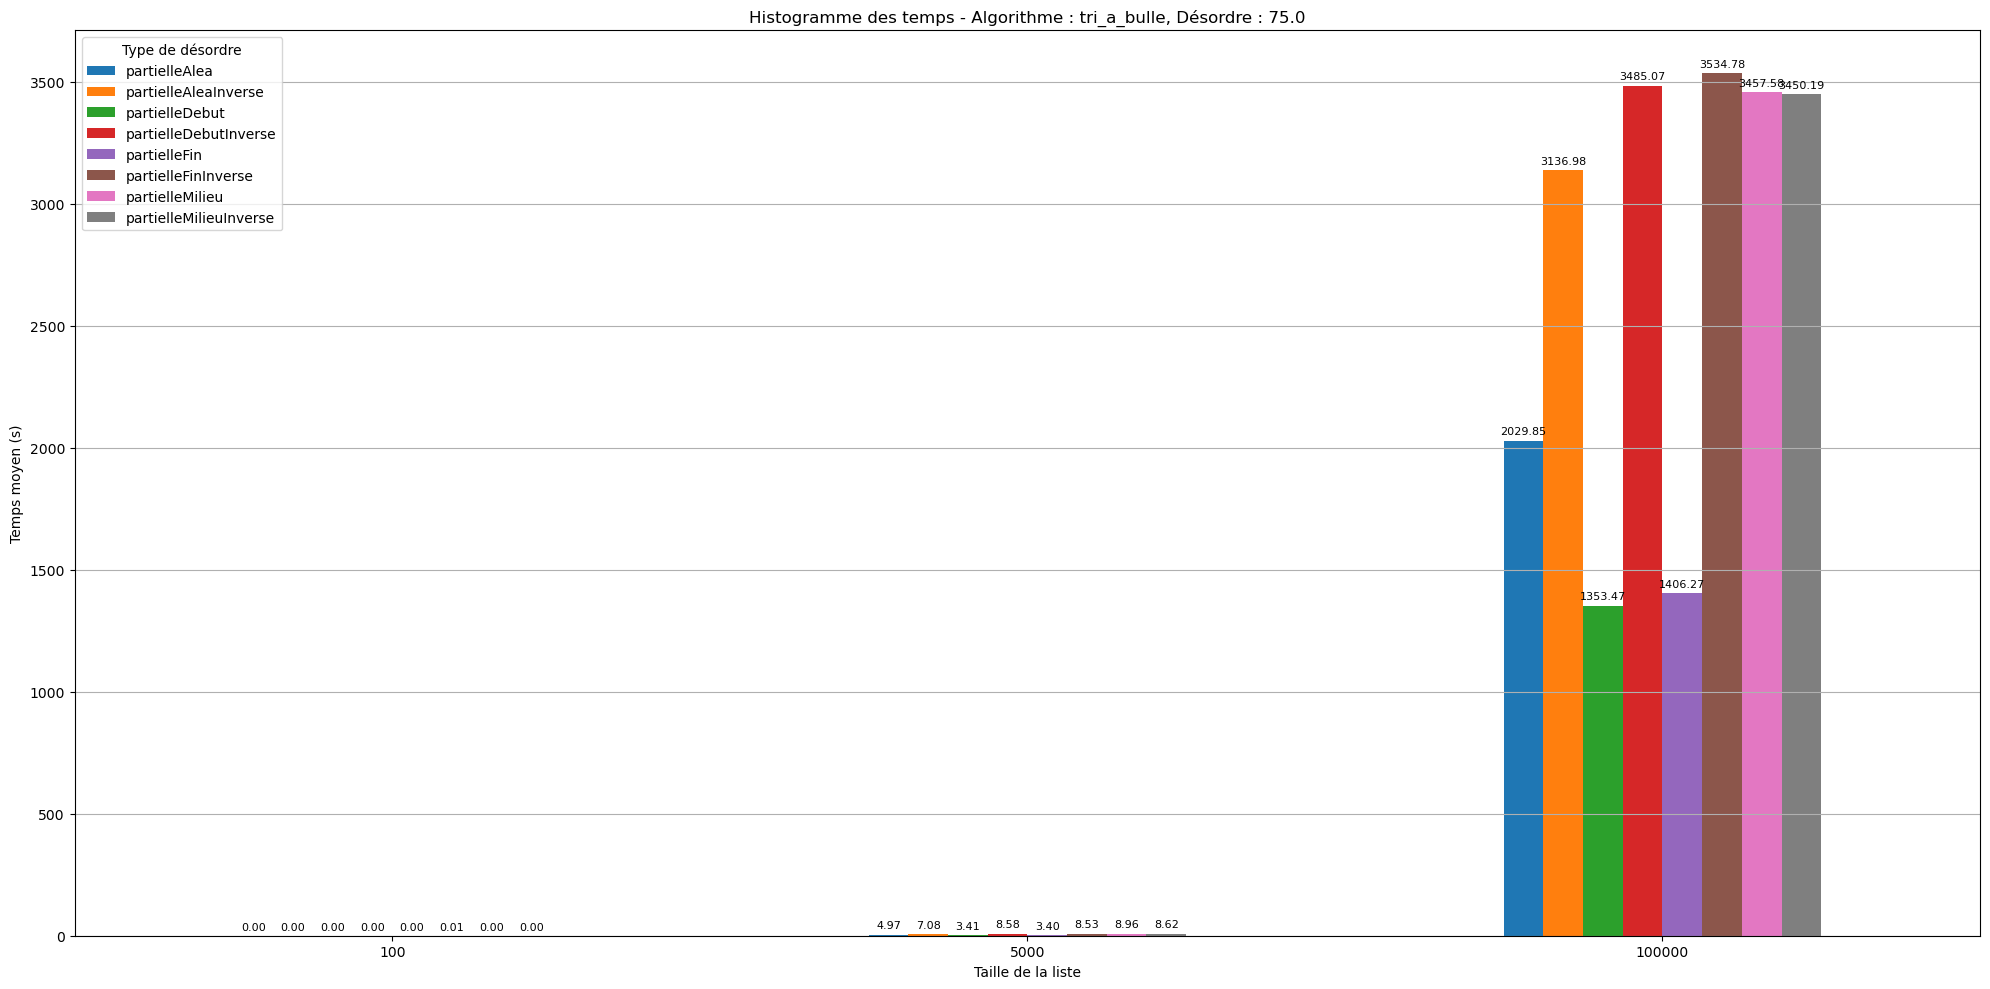

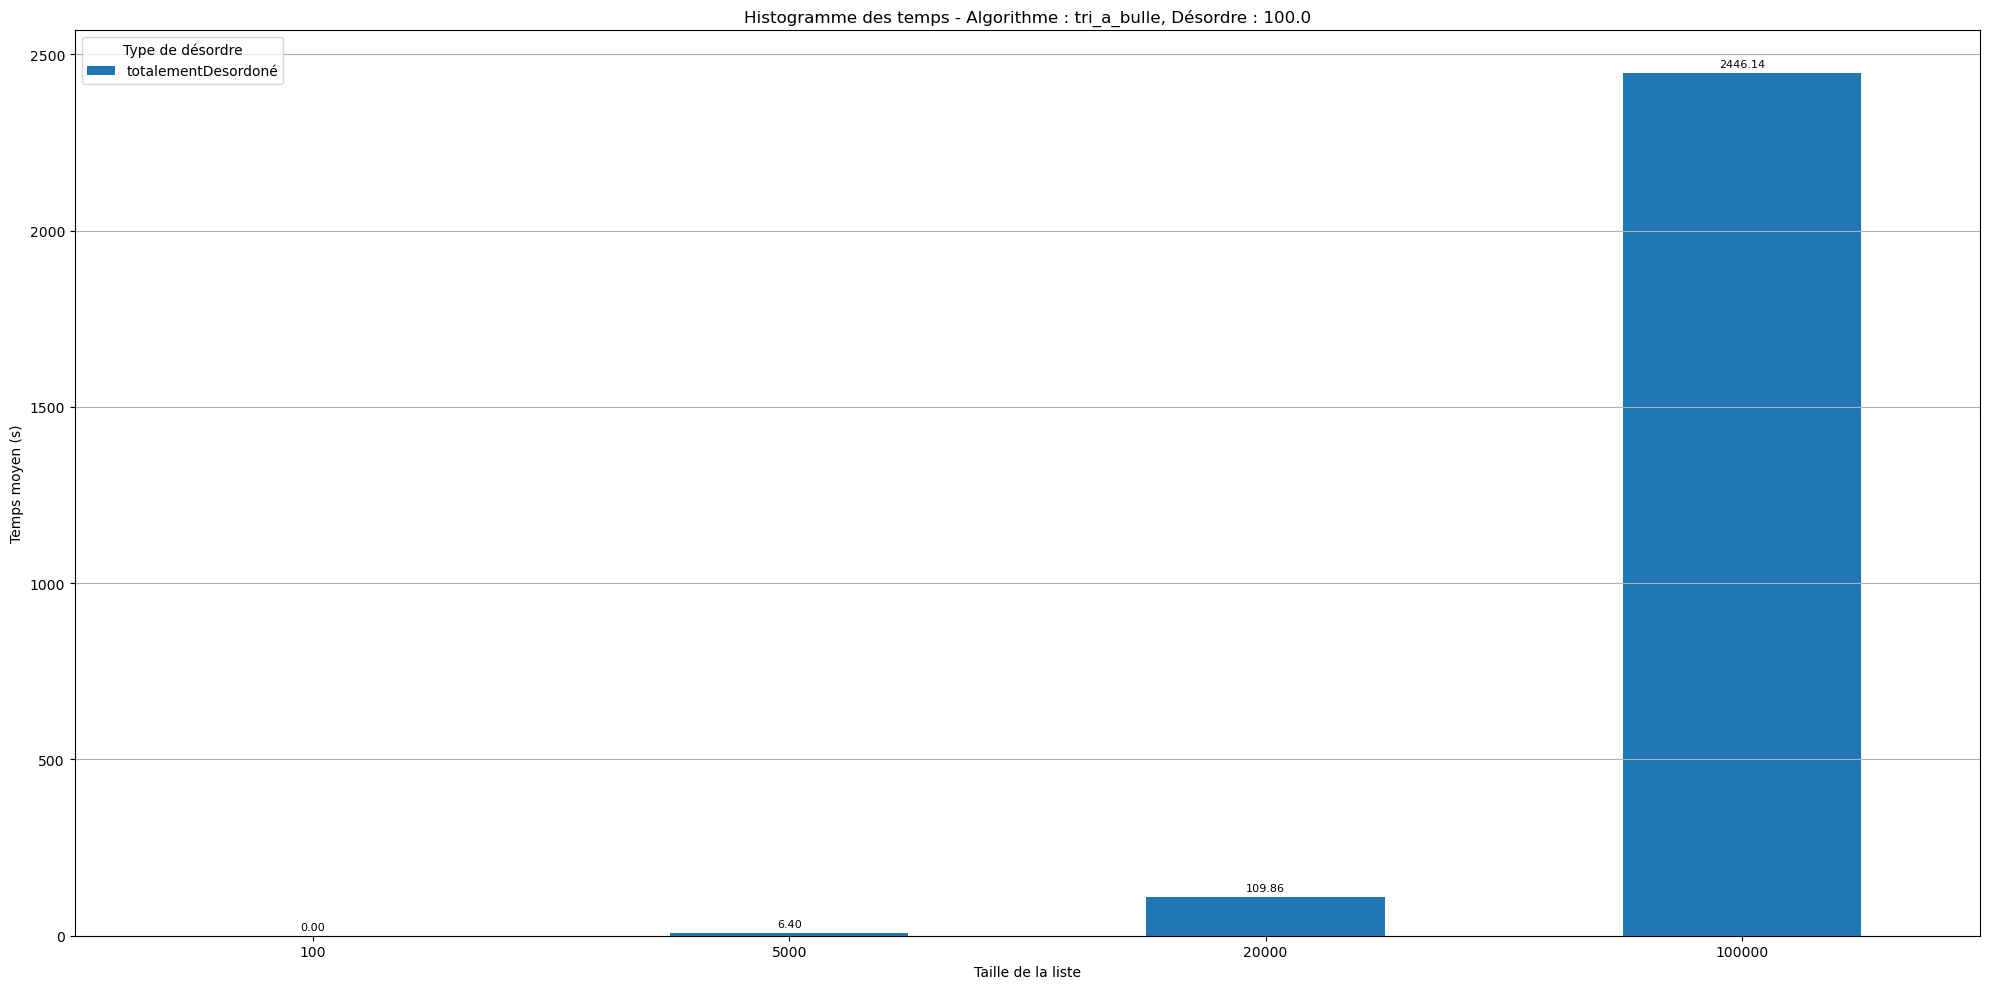

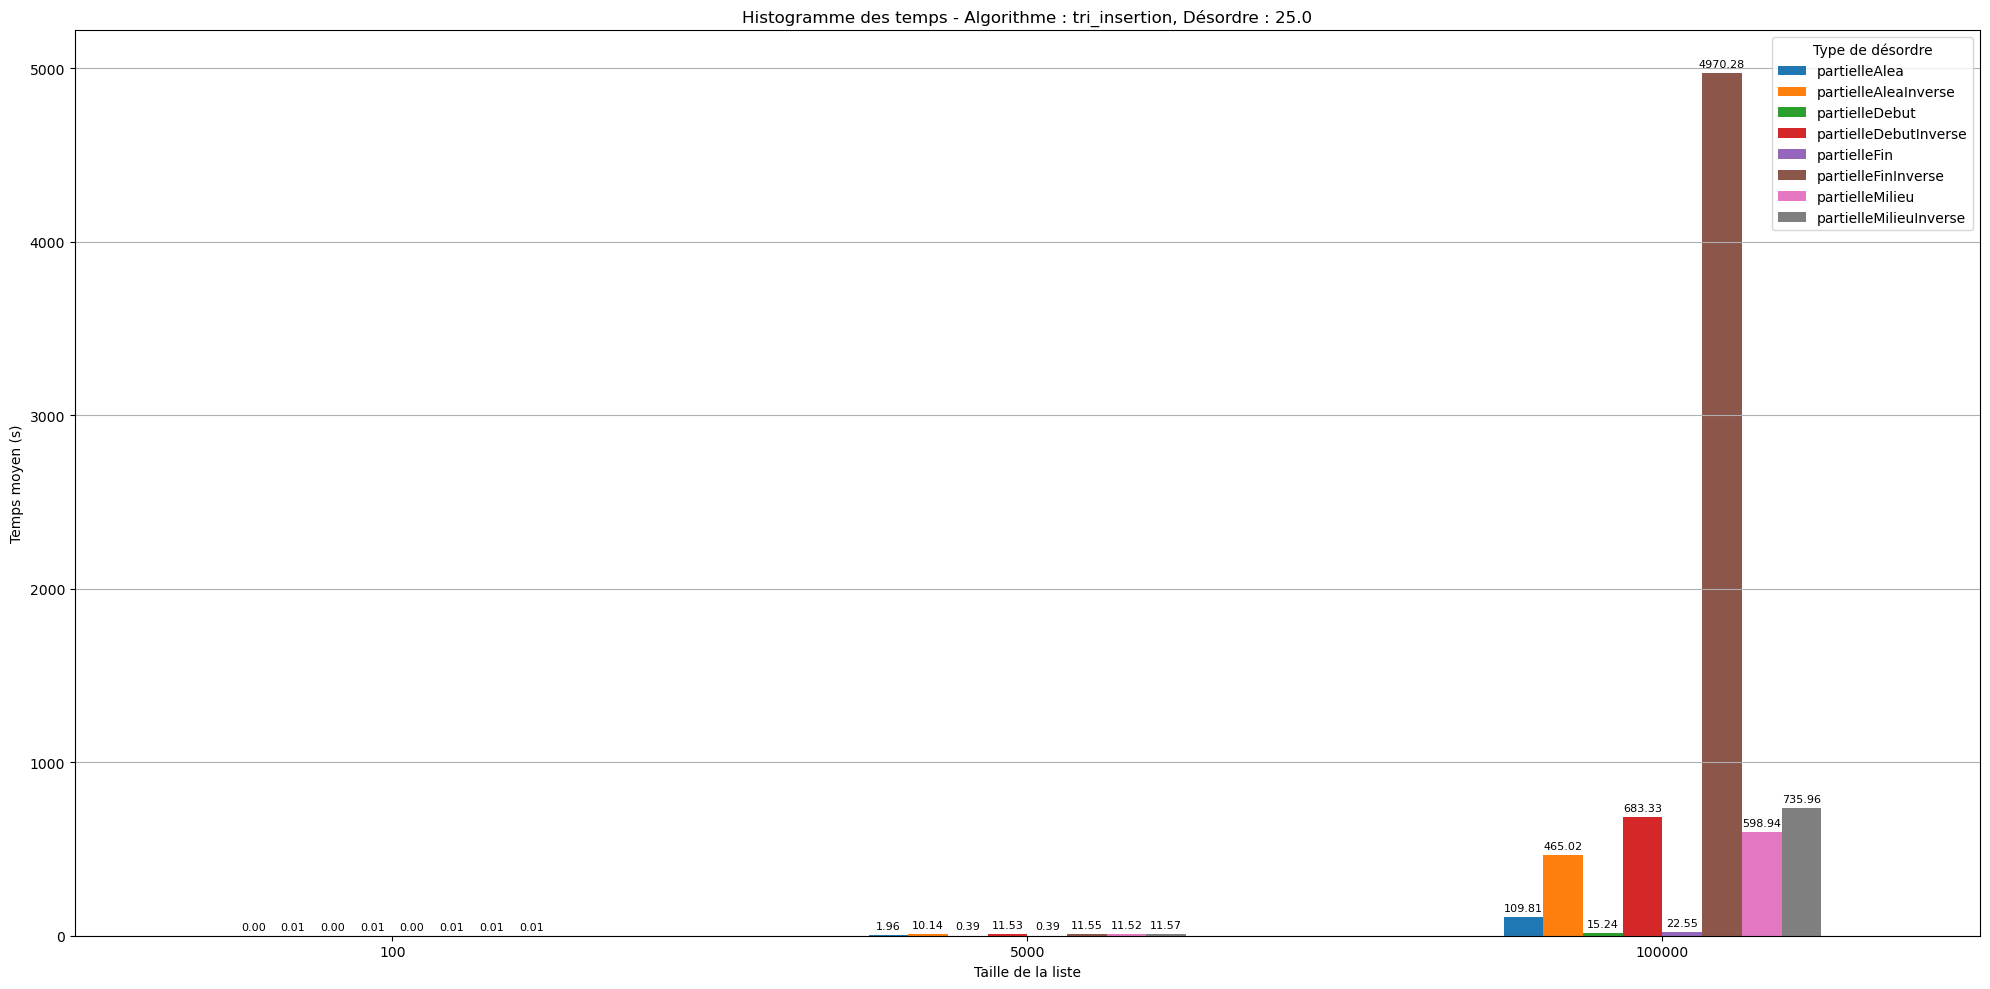

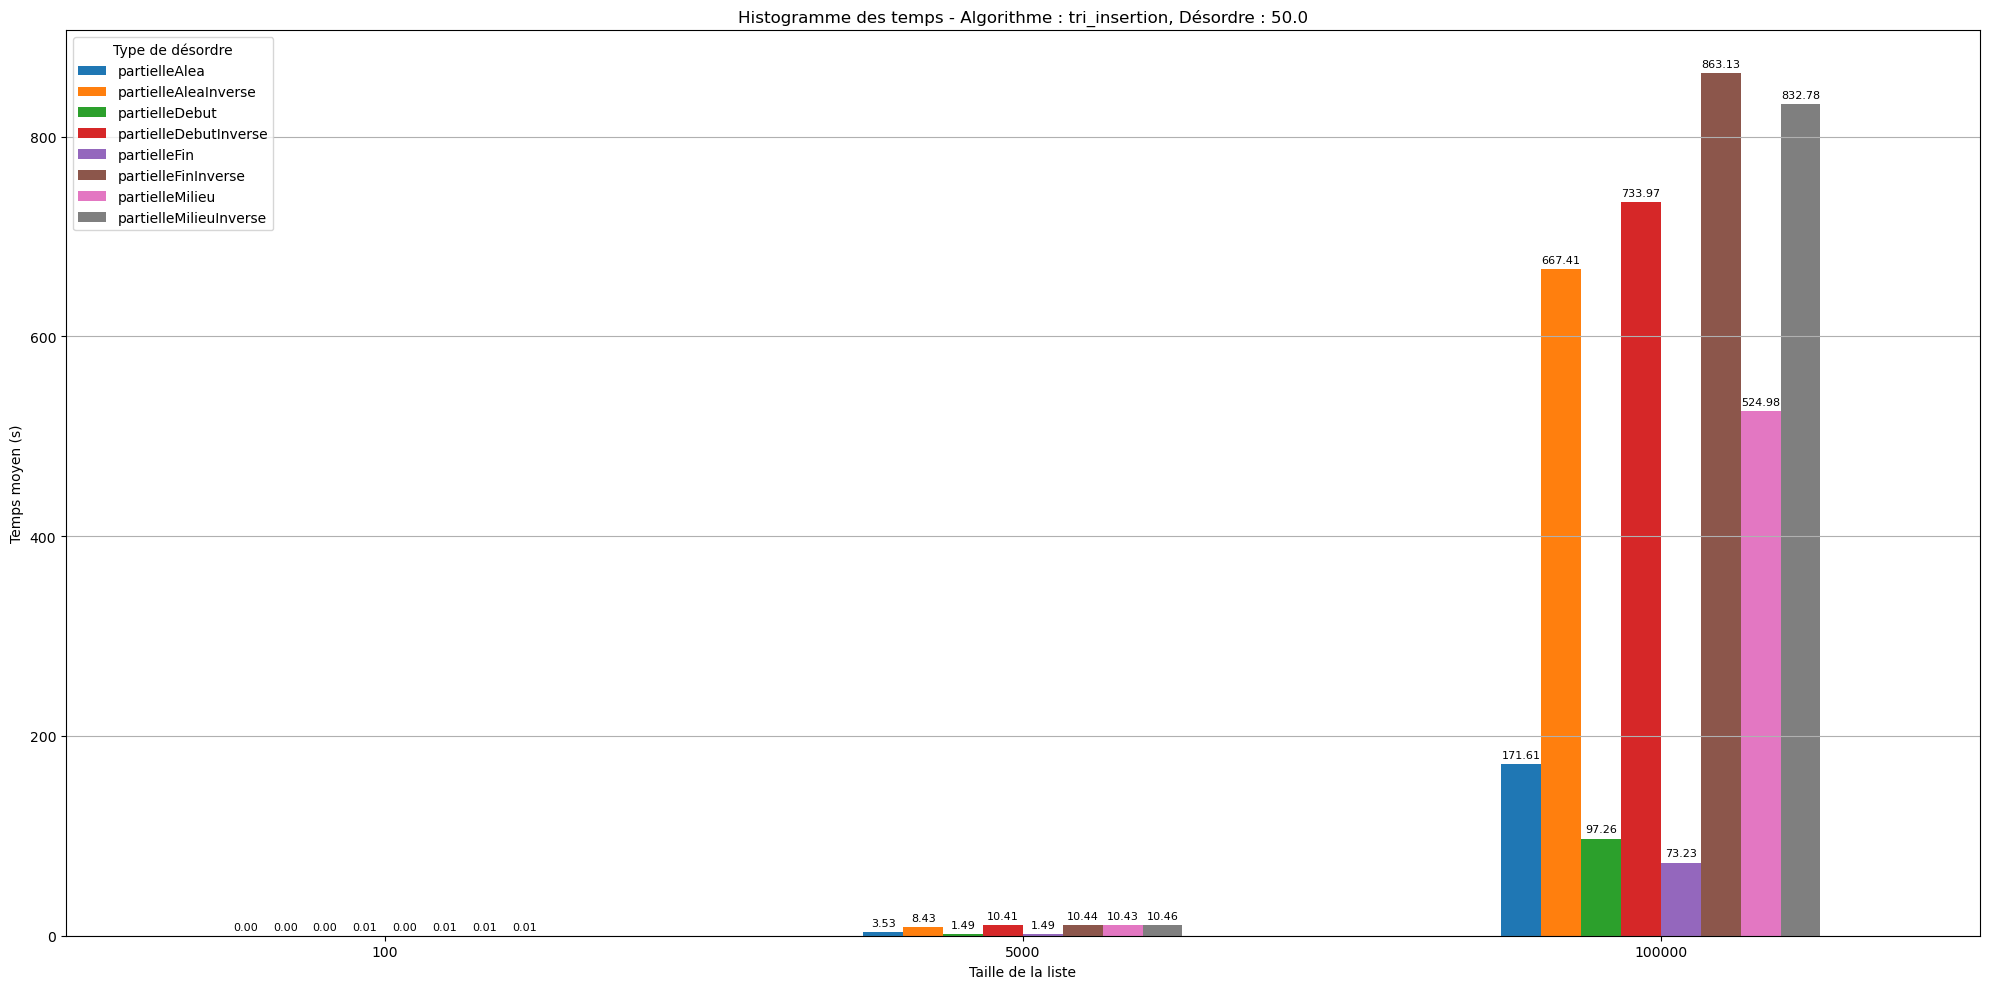

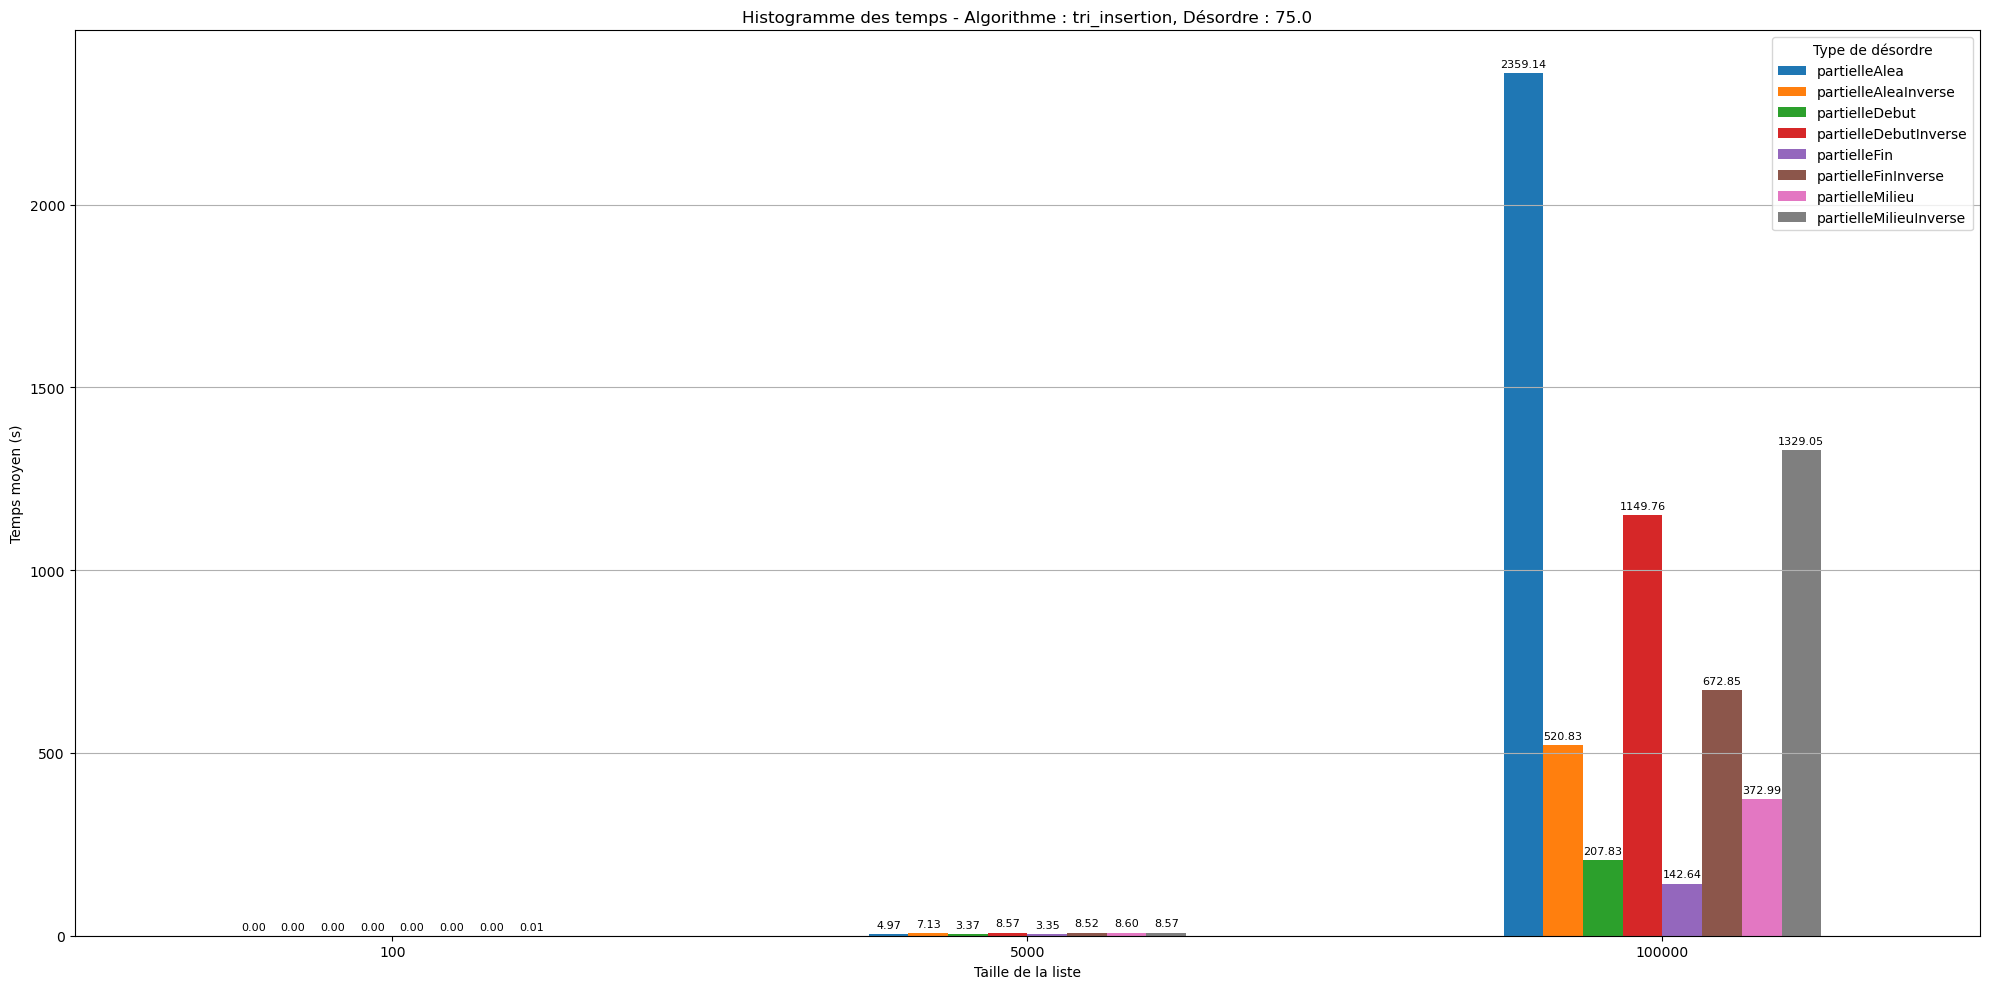

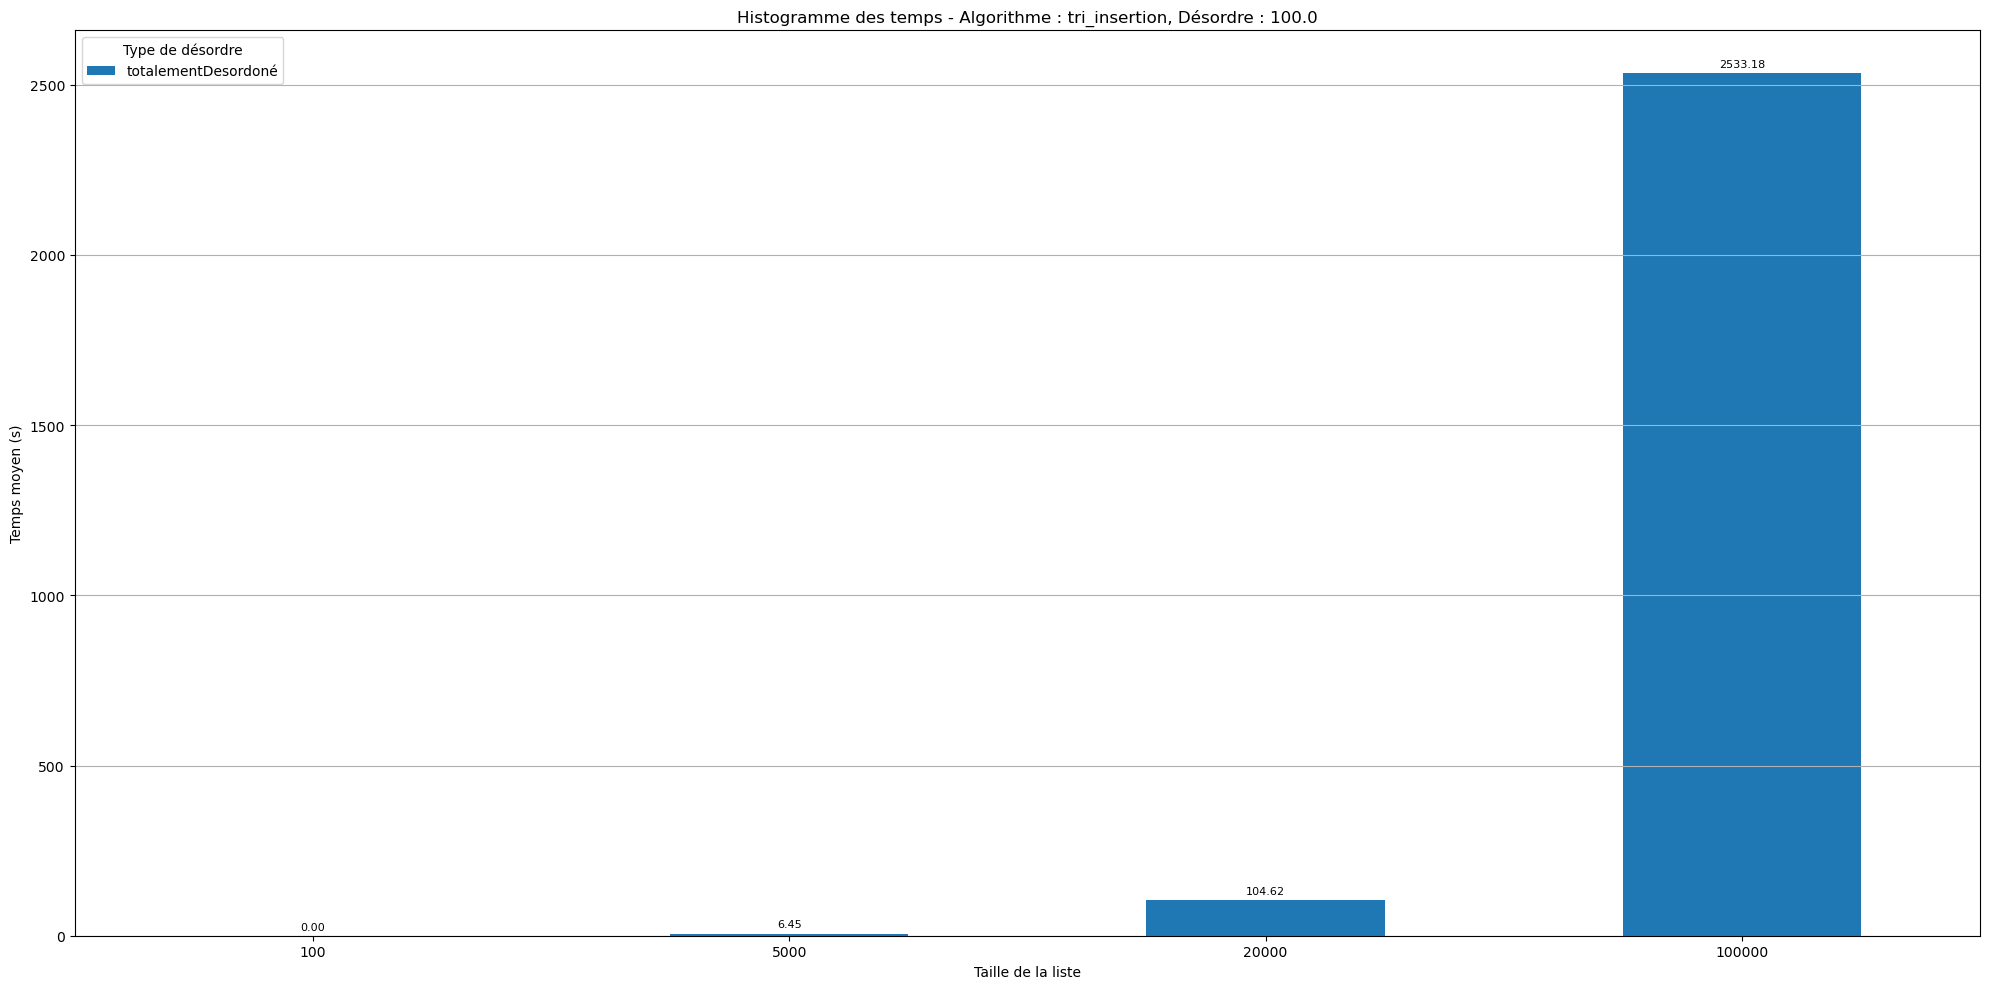

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = "../stockage/resultats.csv"
df = pd.read_csv(file_path)

# Extraire les valeurs uniques
algorithmes = df['Algorithme'].unique()
quantites = df['Désordre'].unique()

# Générer un histogramme pour chaque combinaison Algorithme - Quantité de désordre
for algo in algorithmes:
    for quantite in quantites:
        subset = df[(df['Algorithme'] == algo) & (df['Désordre'] == quantite)]
        grouped = subset.groupby(['Taille', 'typeDesordre'])['Temps'].mean().unstack()

        if grouped is not None and not grouped.empty:
            ax = grouped.plot(kind='bar', figsize=(20, 10))

            # Ajouter les valeurs numériques sur chaque barre
            for container in ax.containers:
                ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=3)

            plt.title(f"Histogramme des temps - Algorithme : {algo}, Désordre : {quantite}")
            plt.xlabel("Taille de la liste")
            plt.ylabel("Temps moyen (s)")
            plt.legend(title="Type de désordre")
            plt.xticks(rotation=0)
            plt.grid(axis='y')
            plt.tight_layout()
            plt.show()


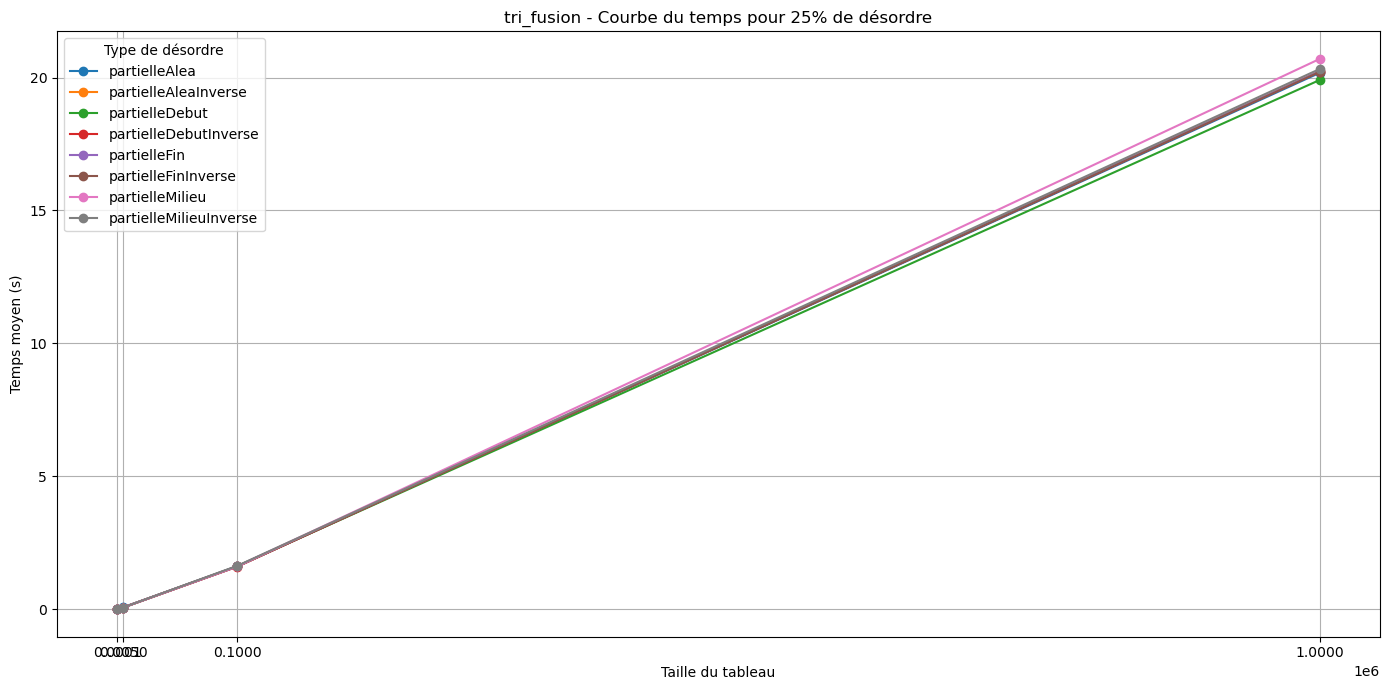

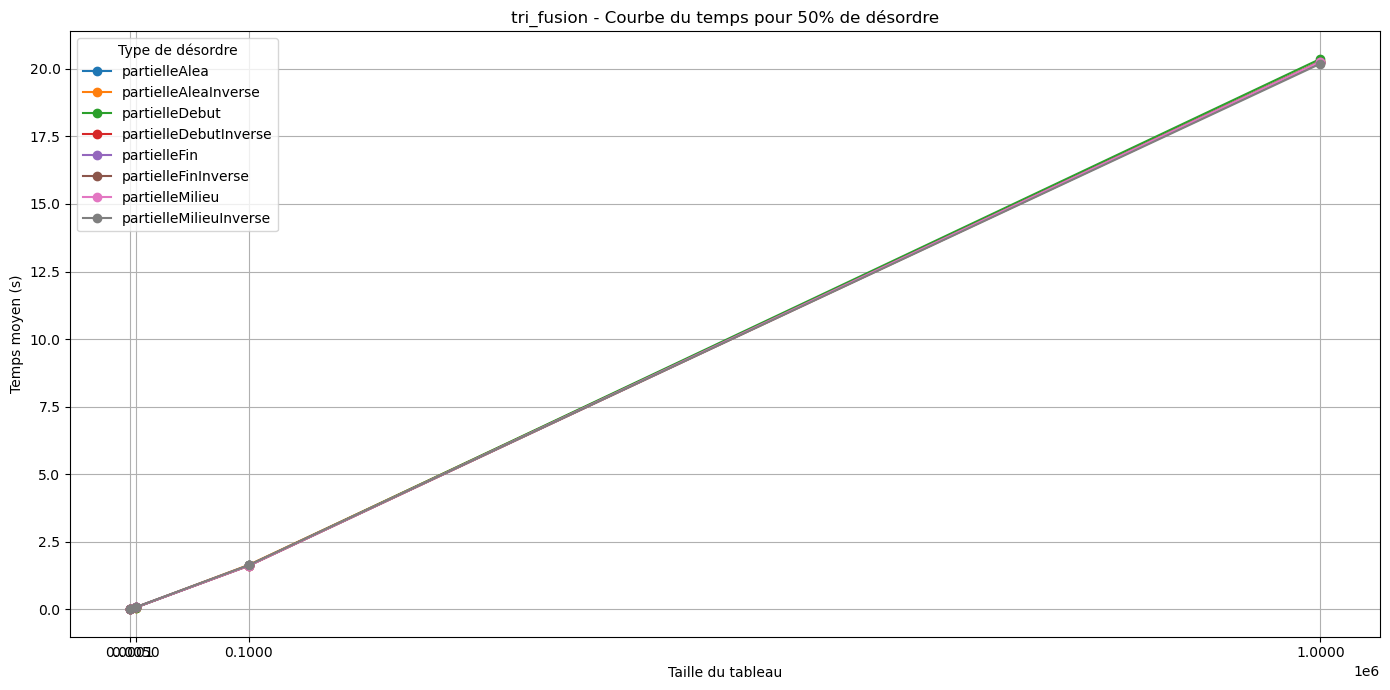

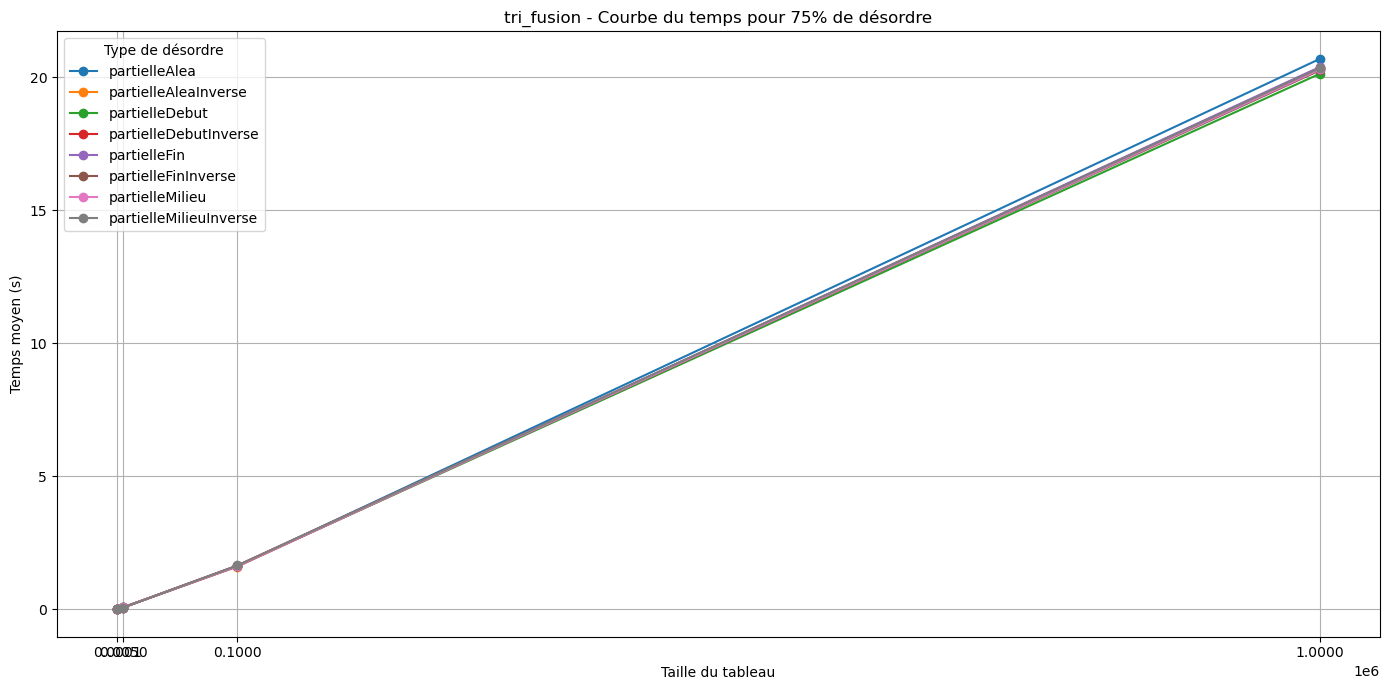

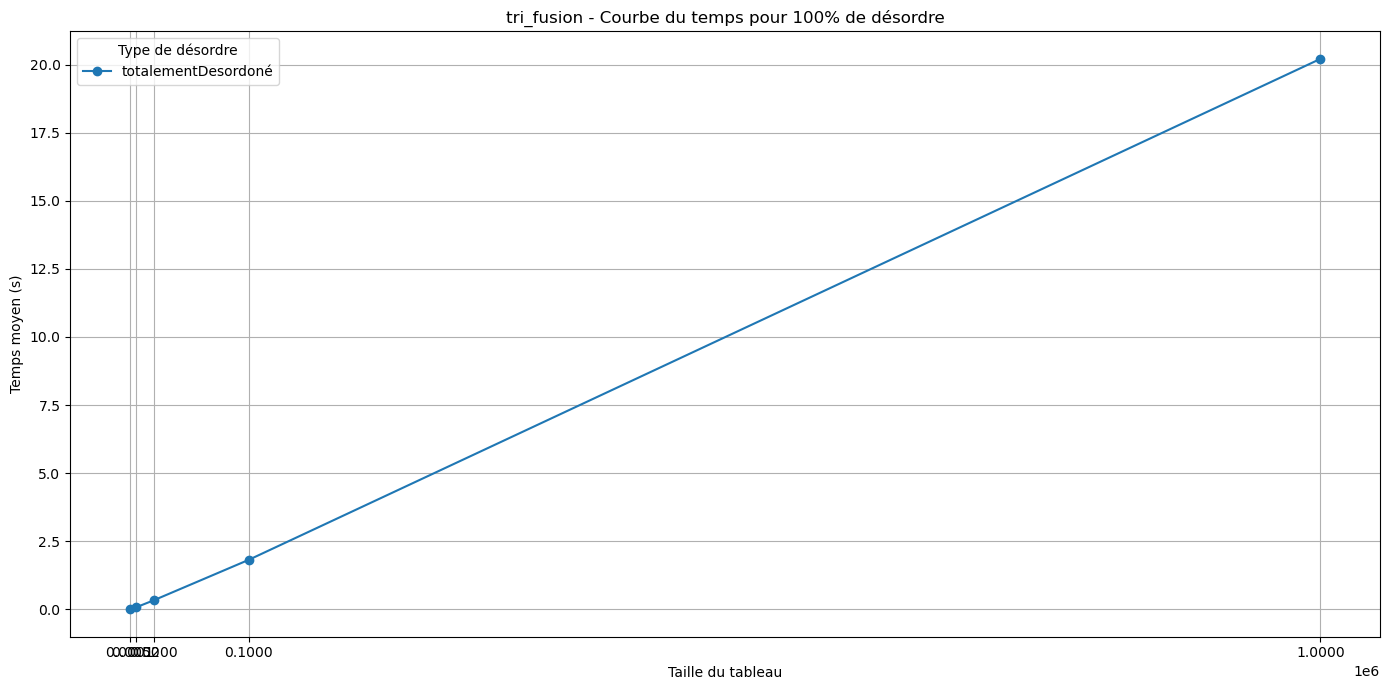

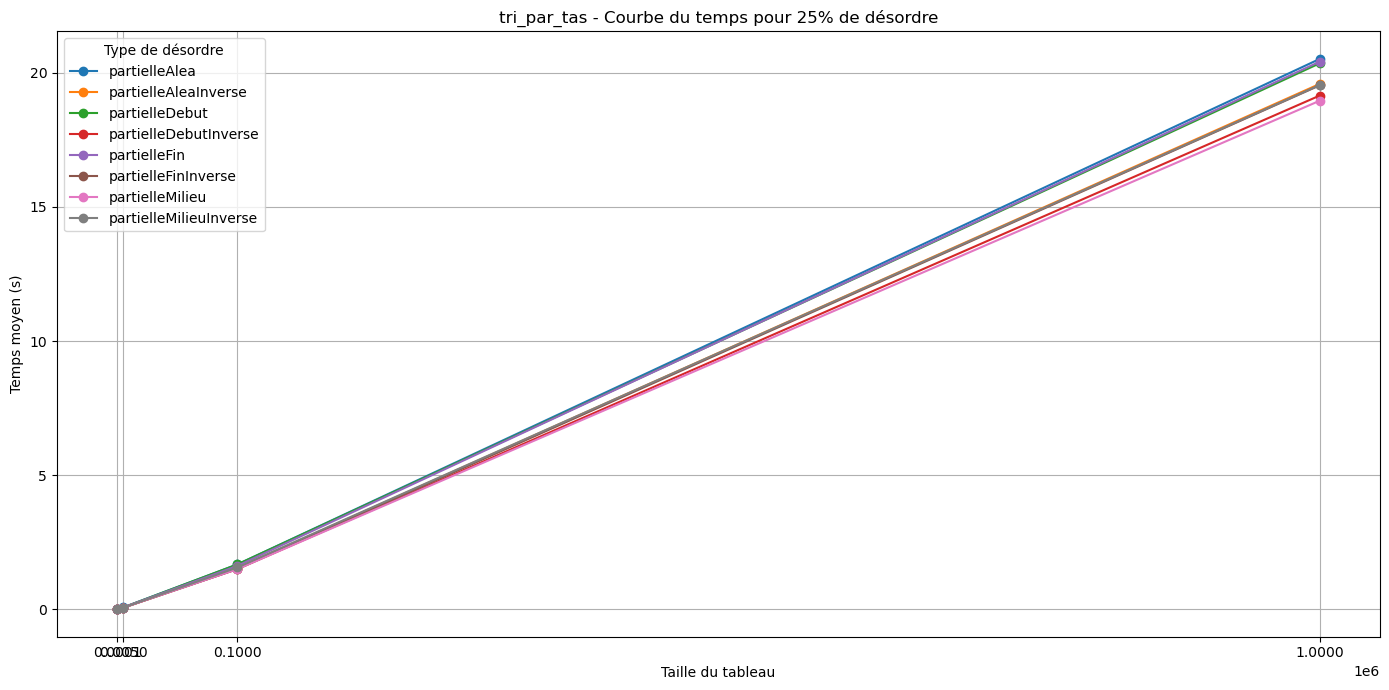

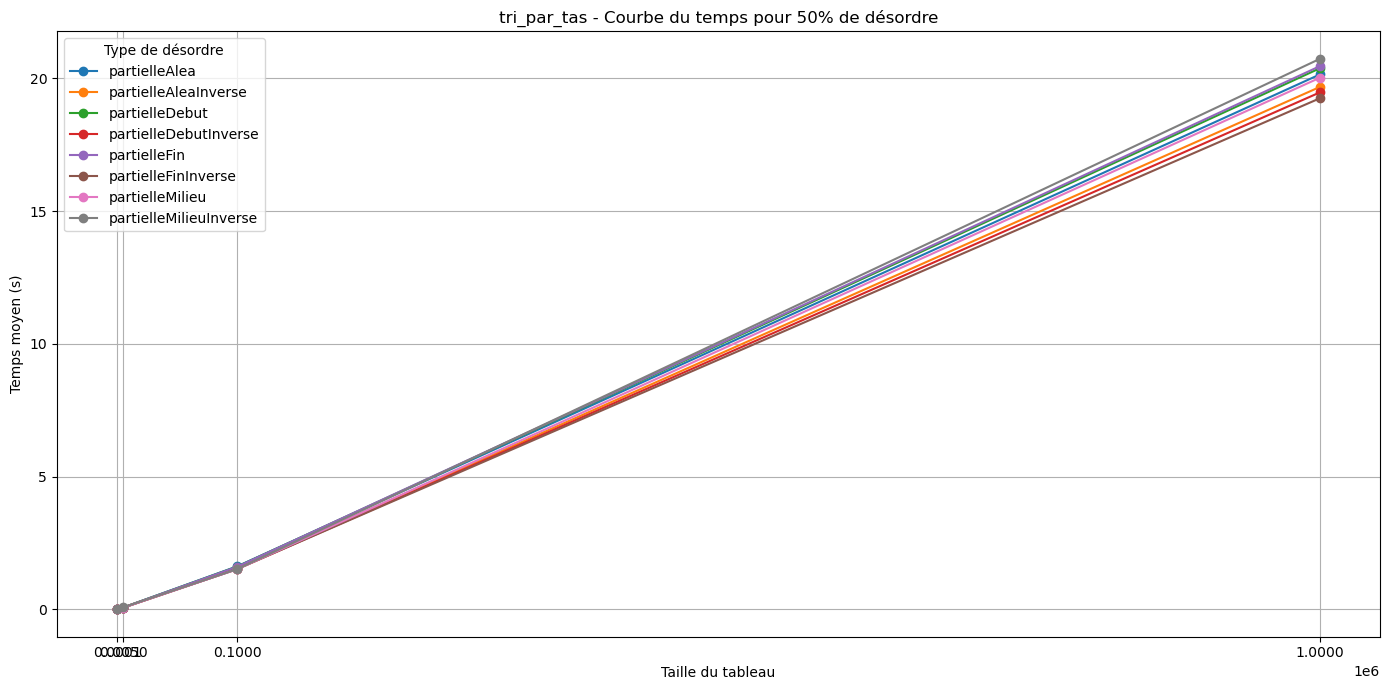

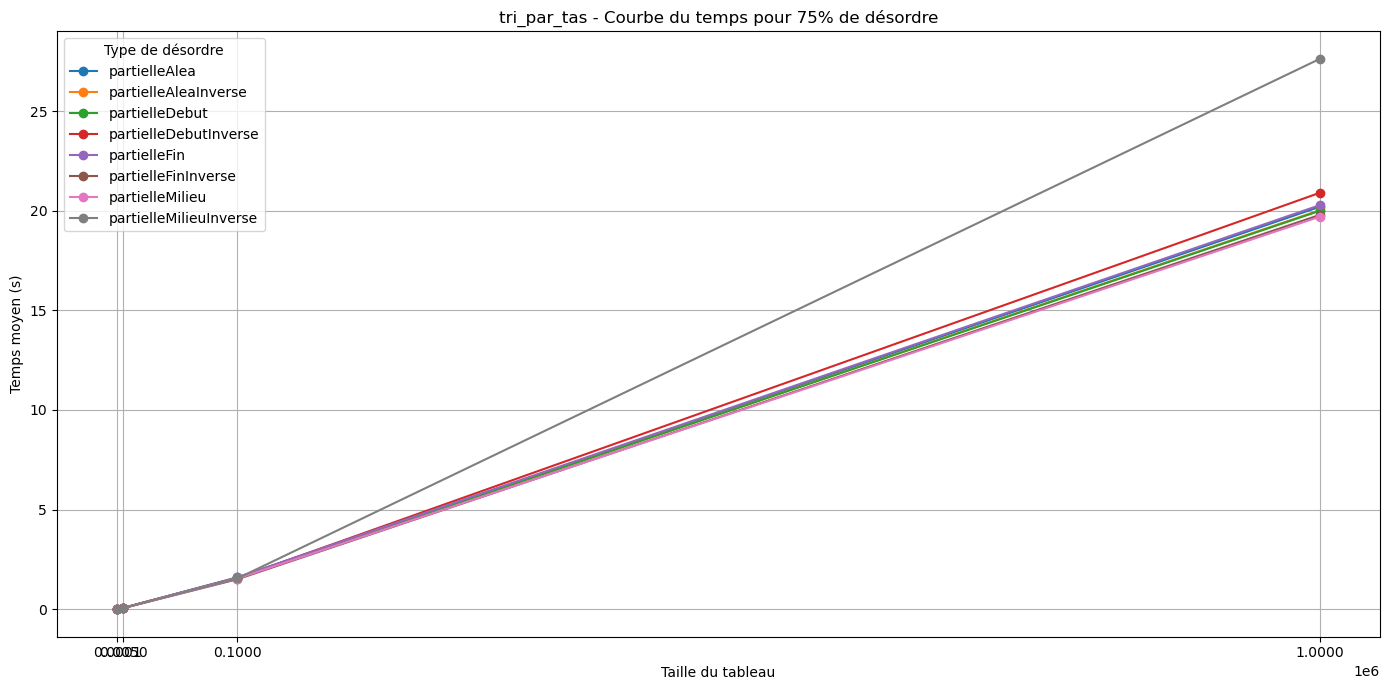

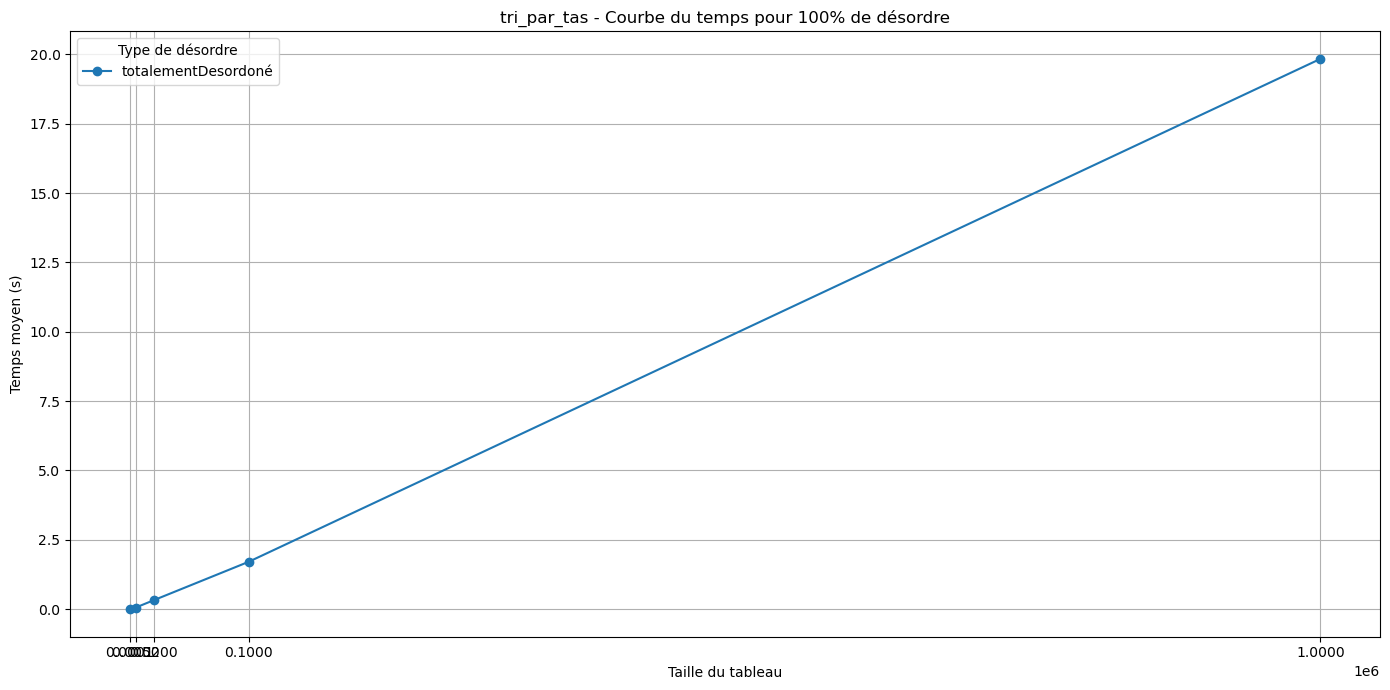

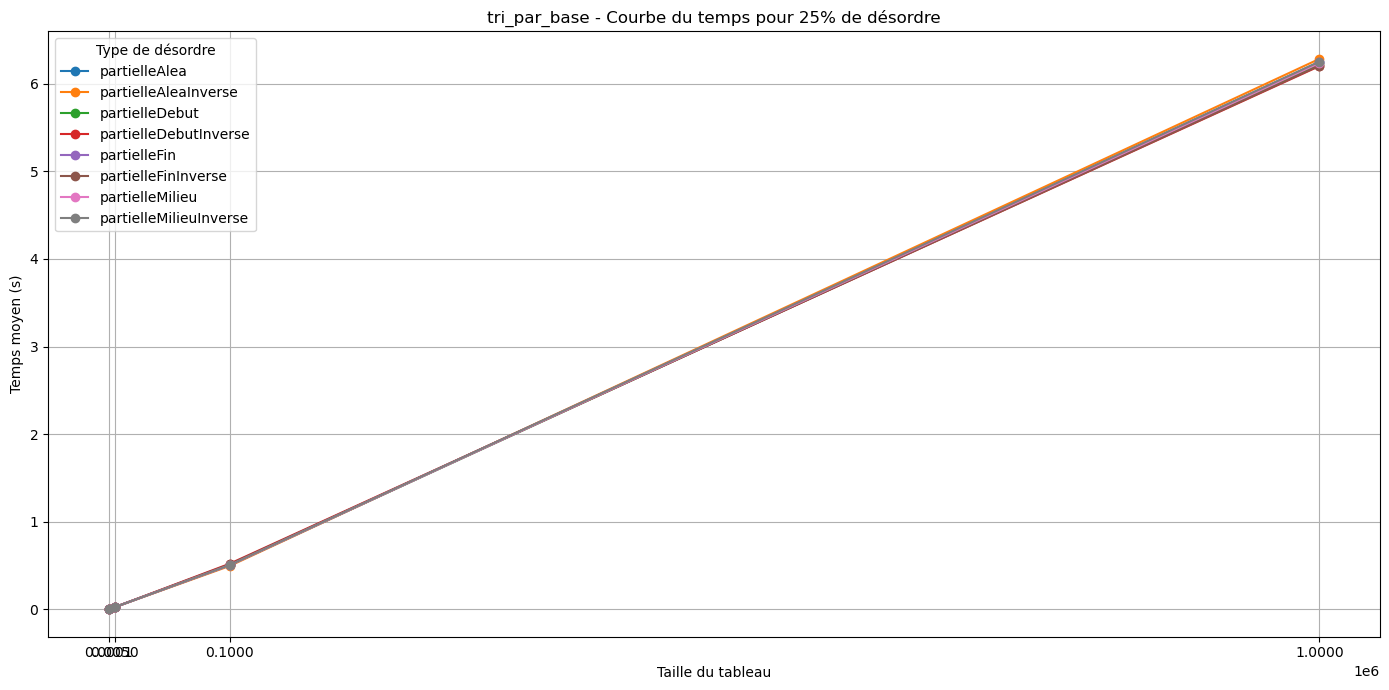

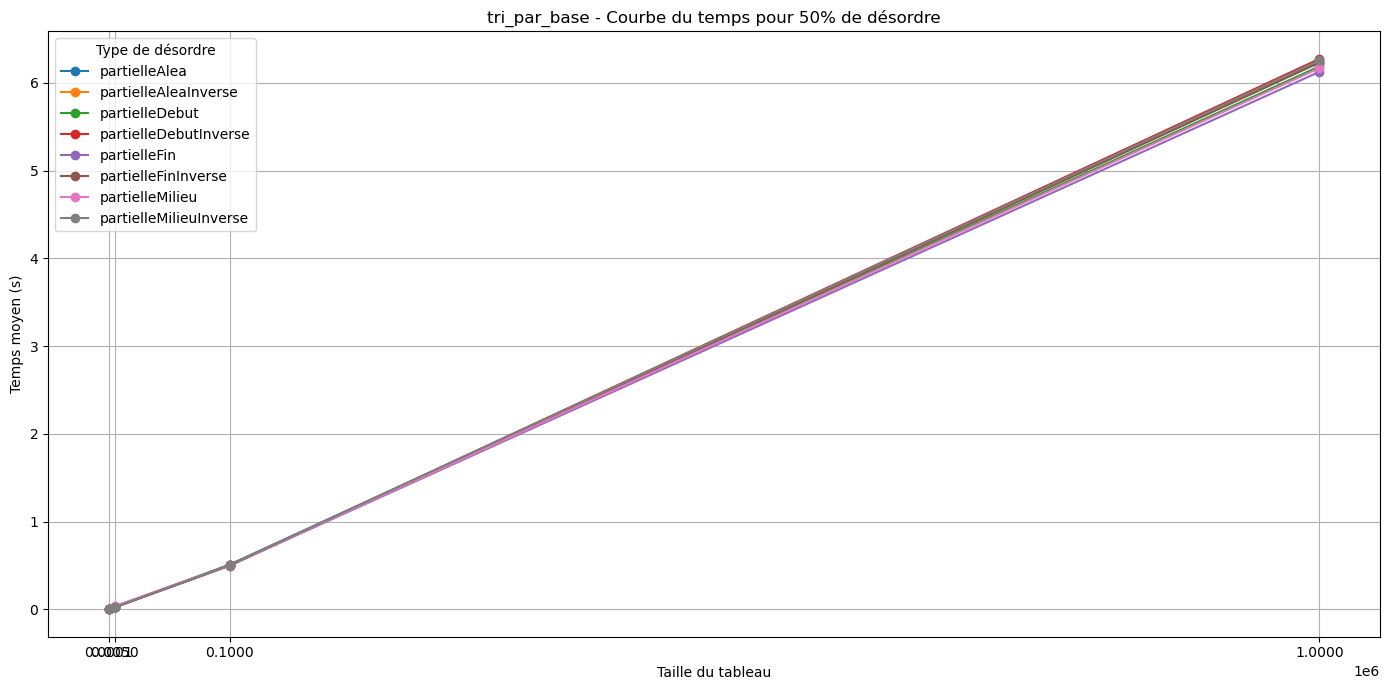

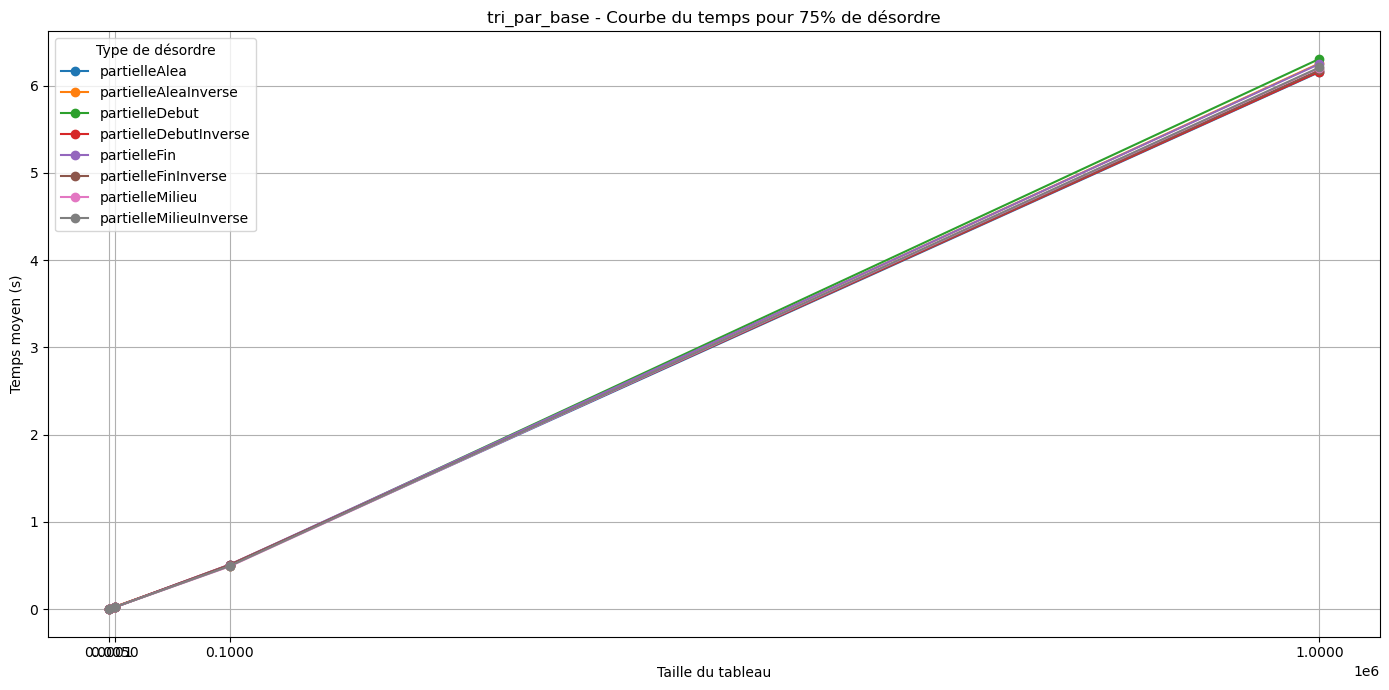

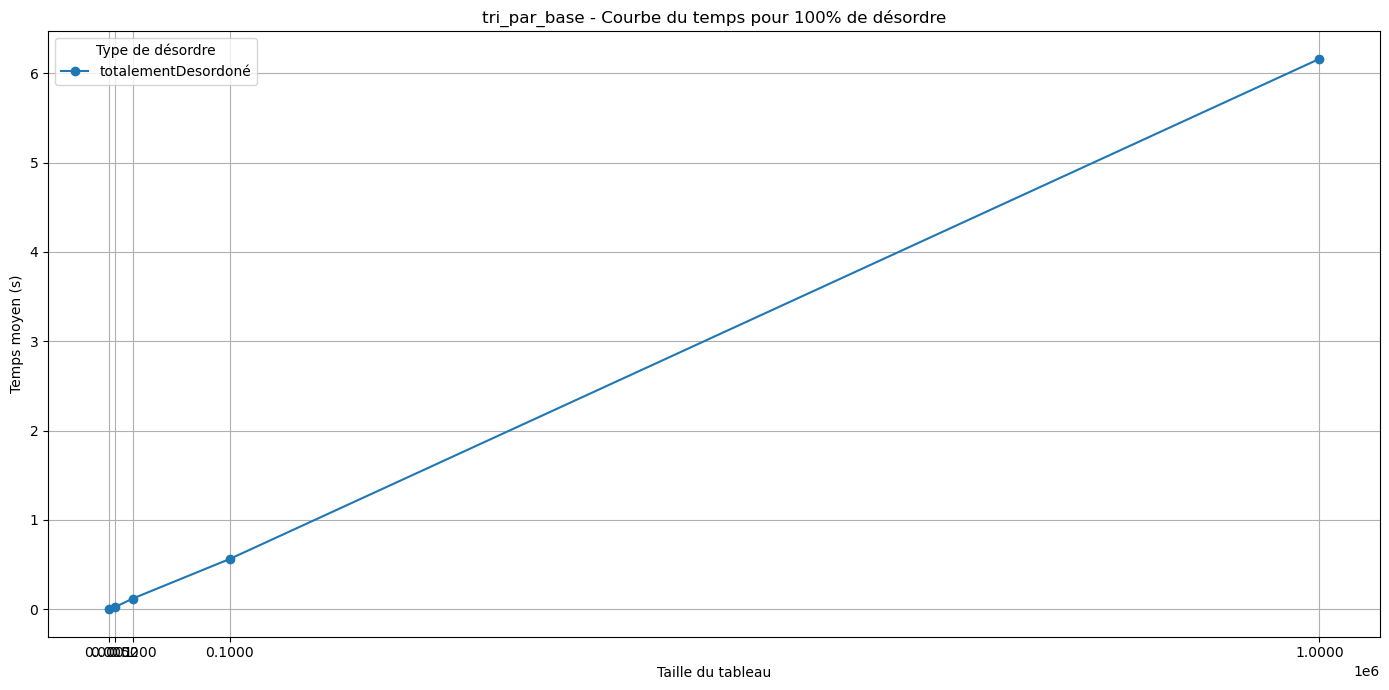

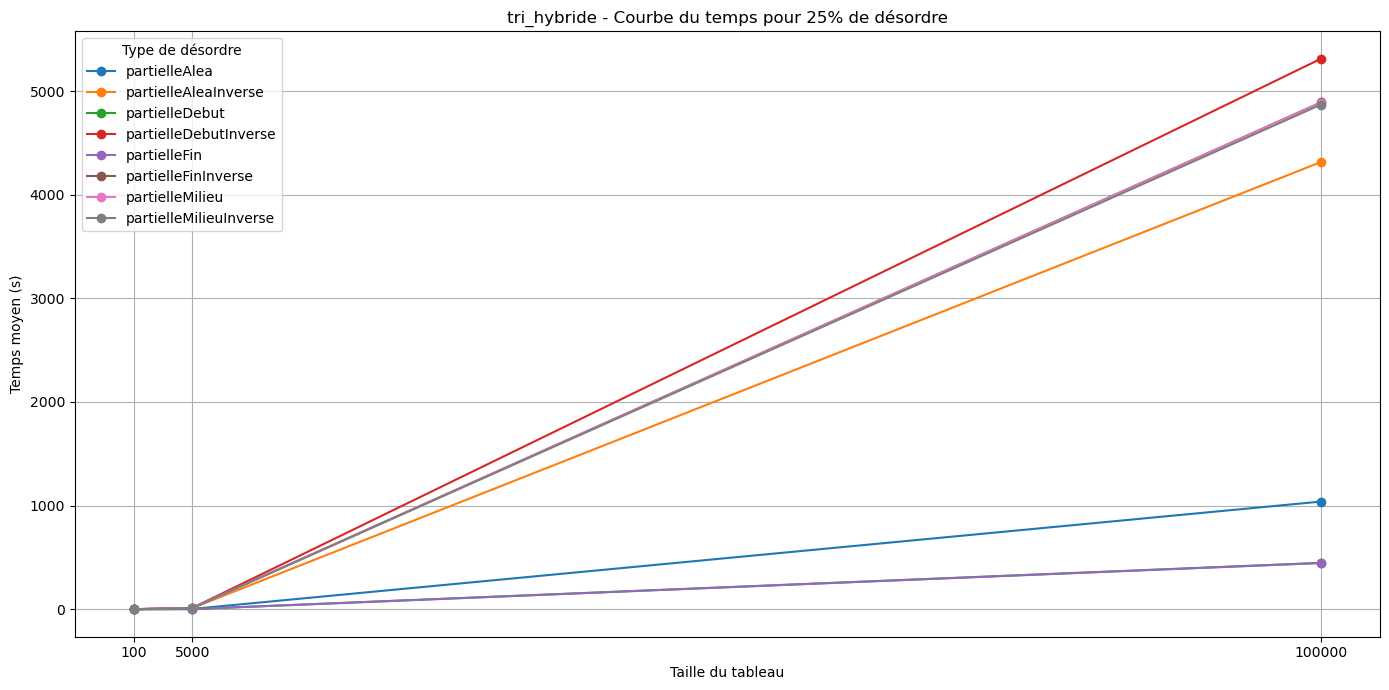

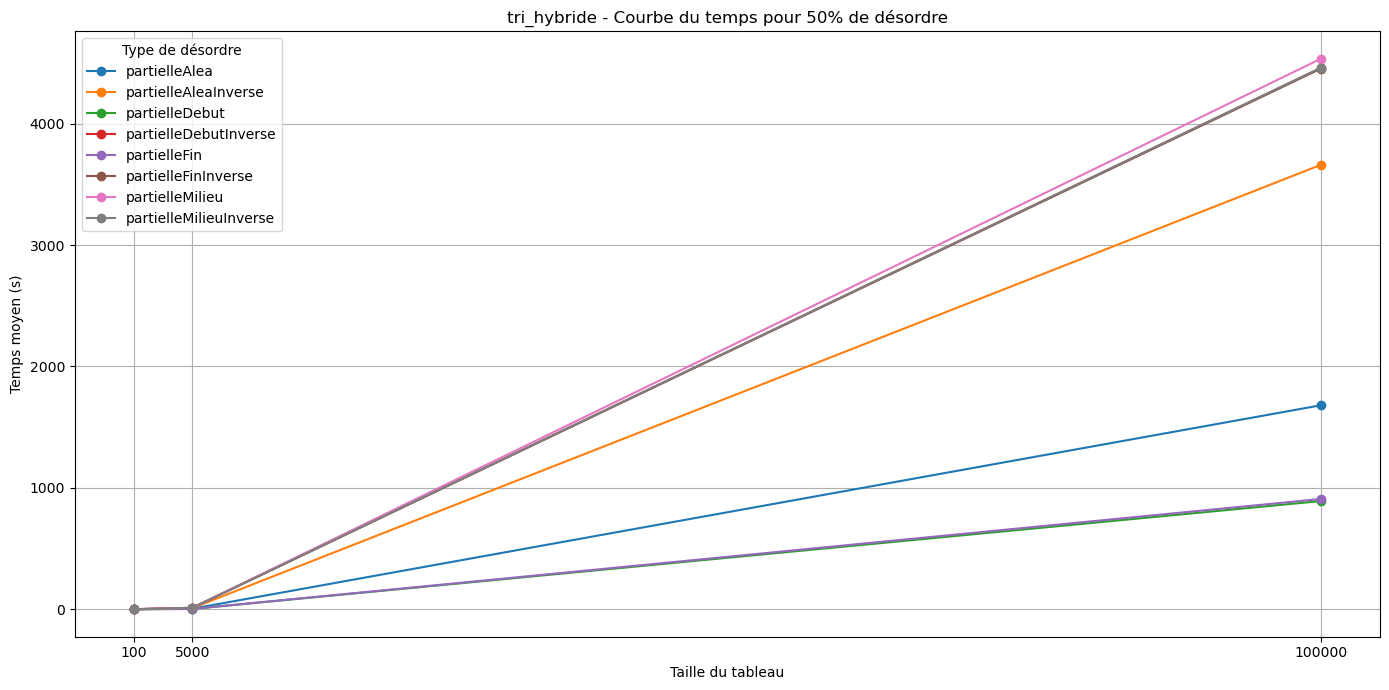

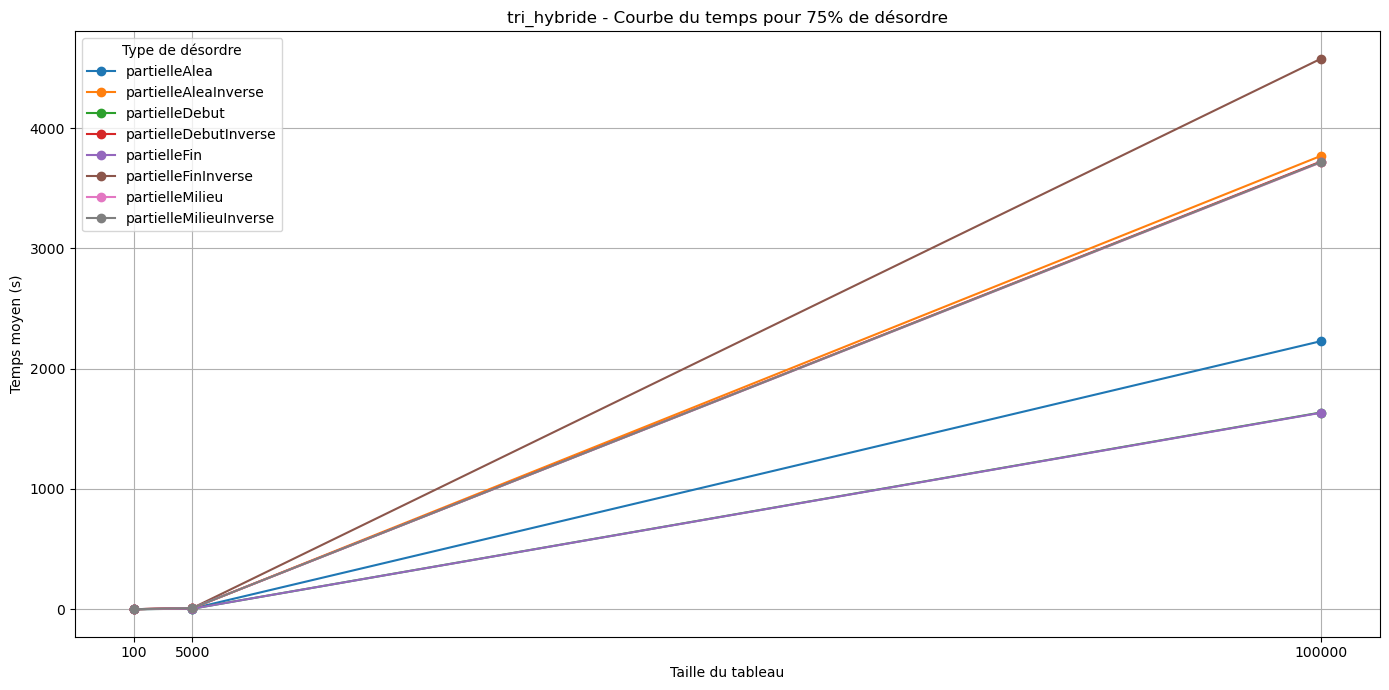

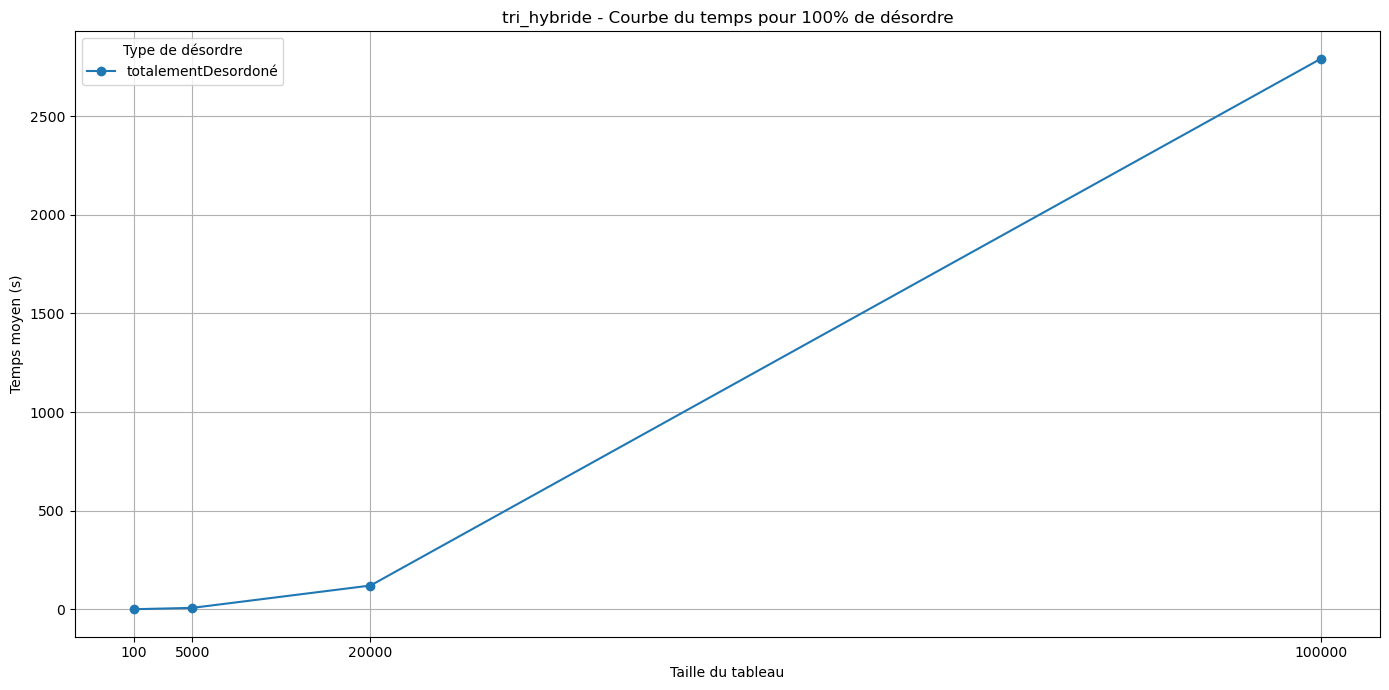

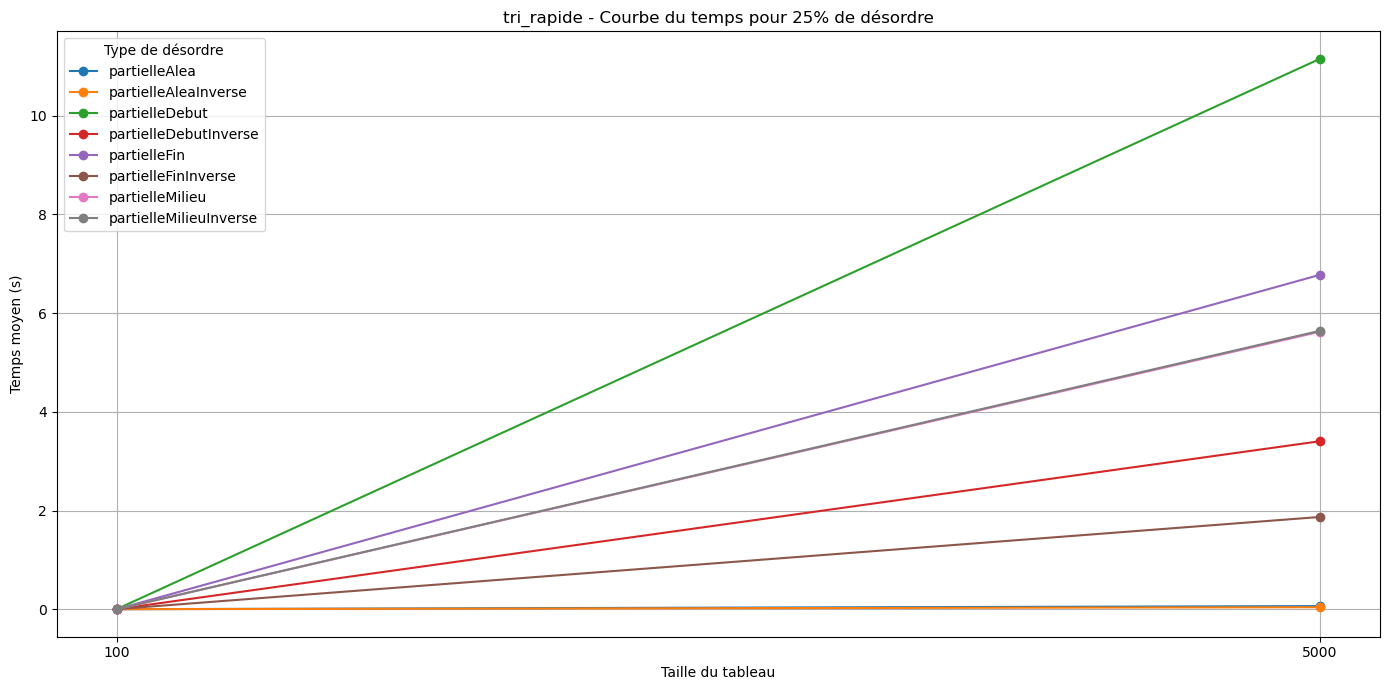

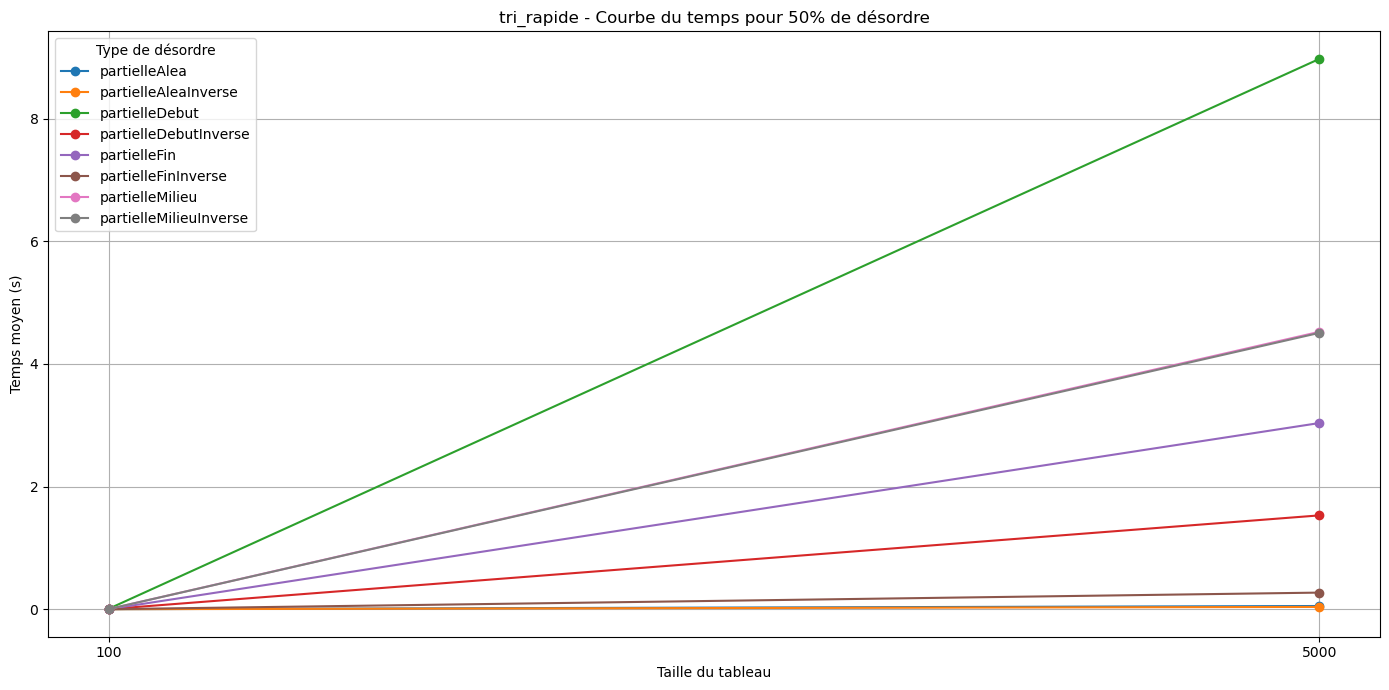

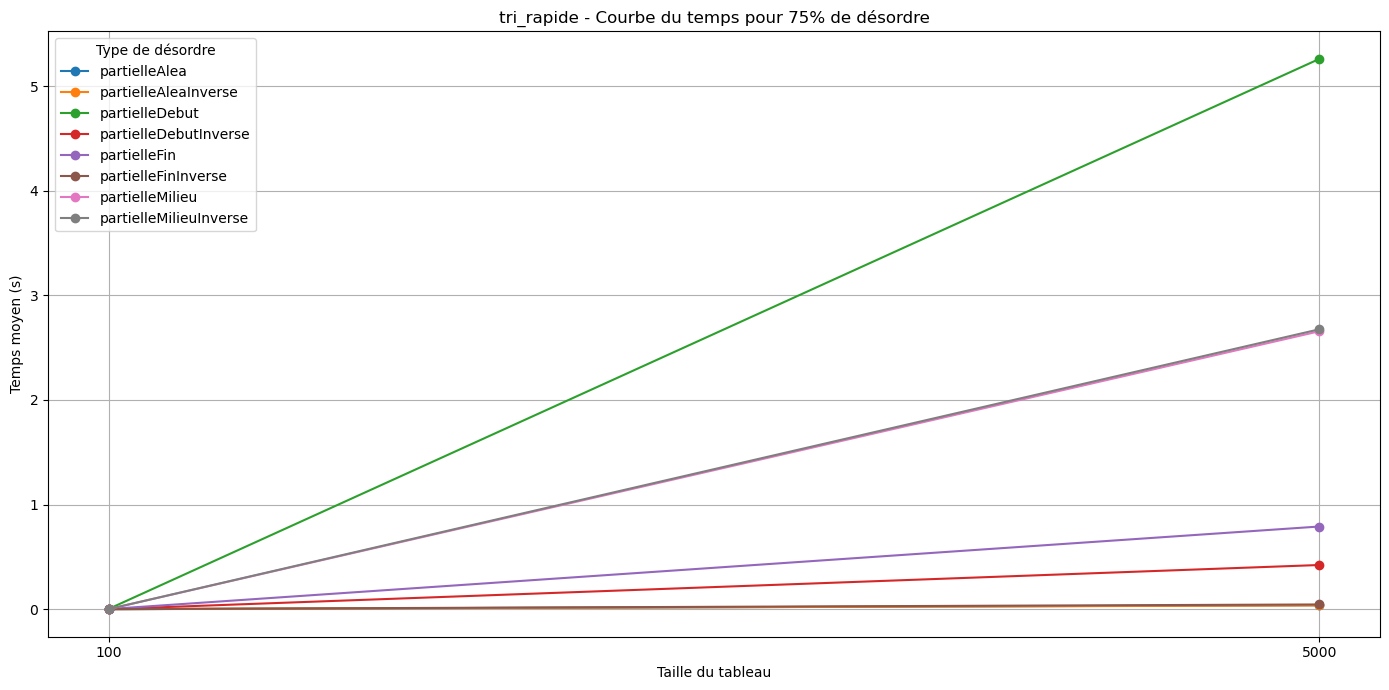

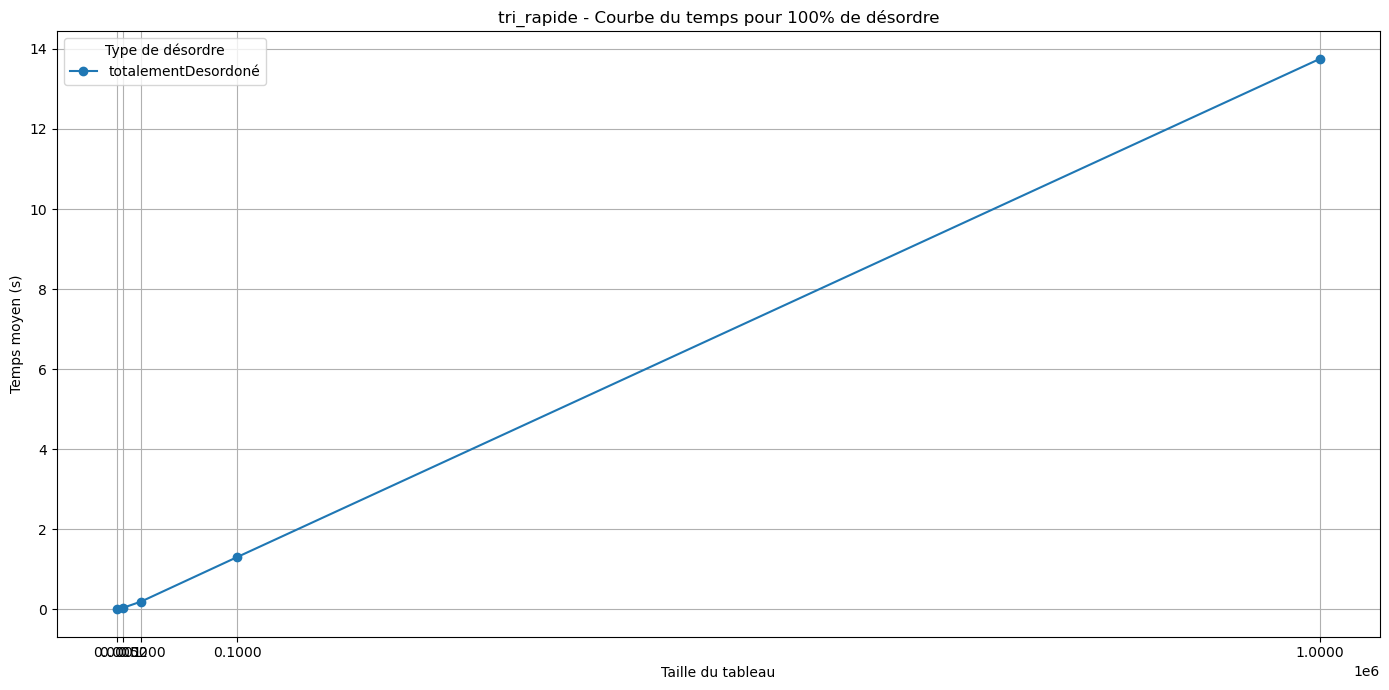

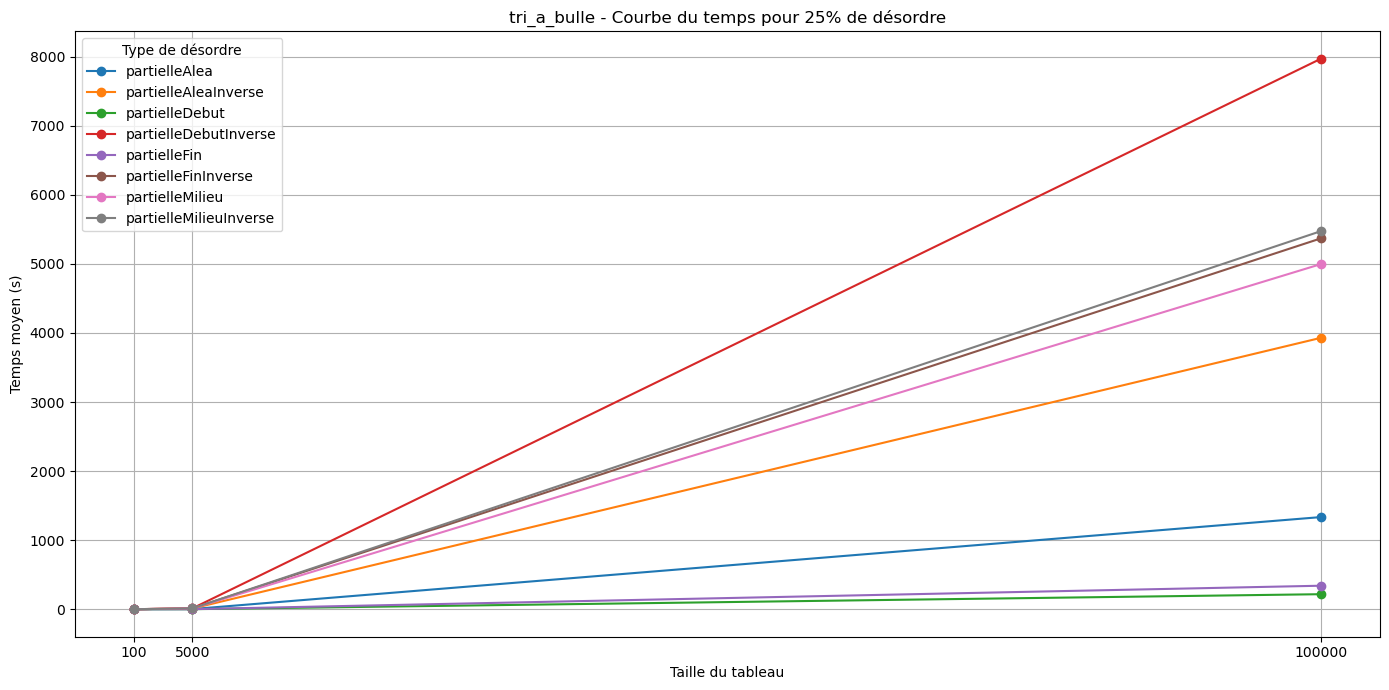

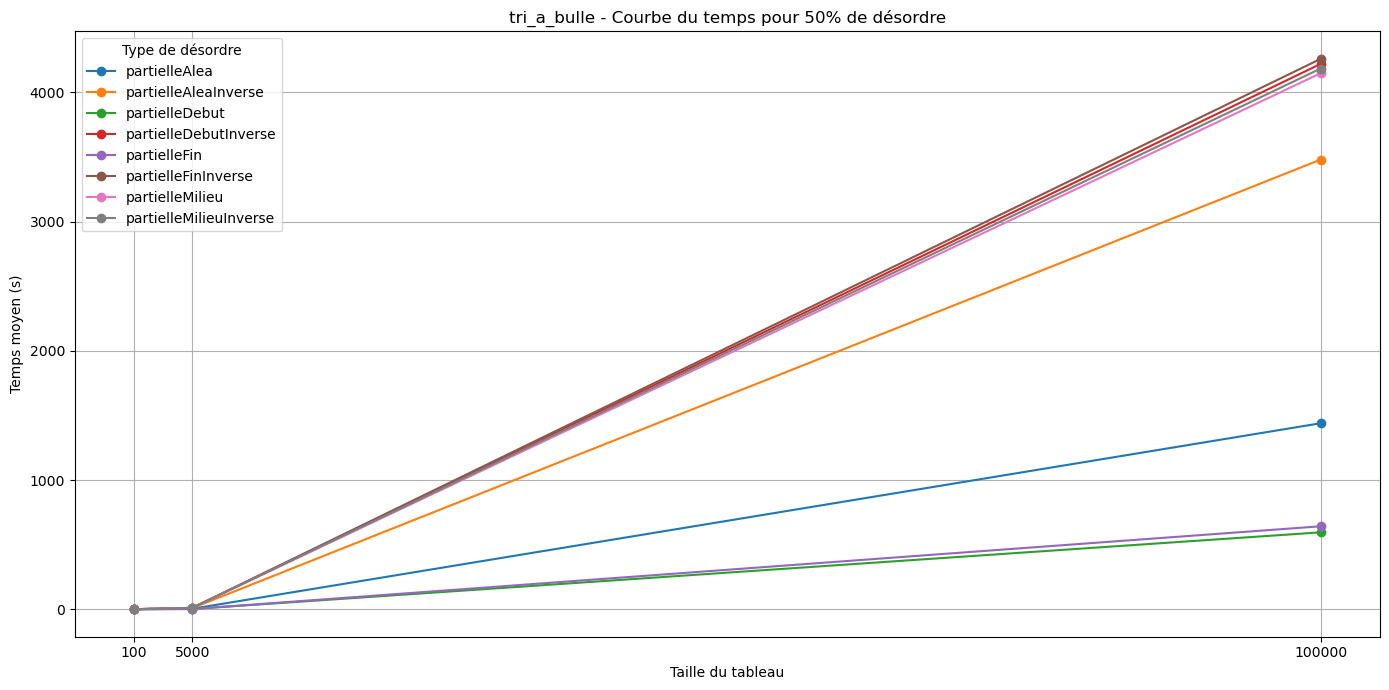

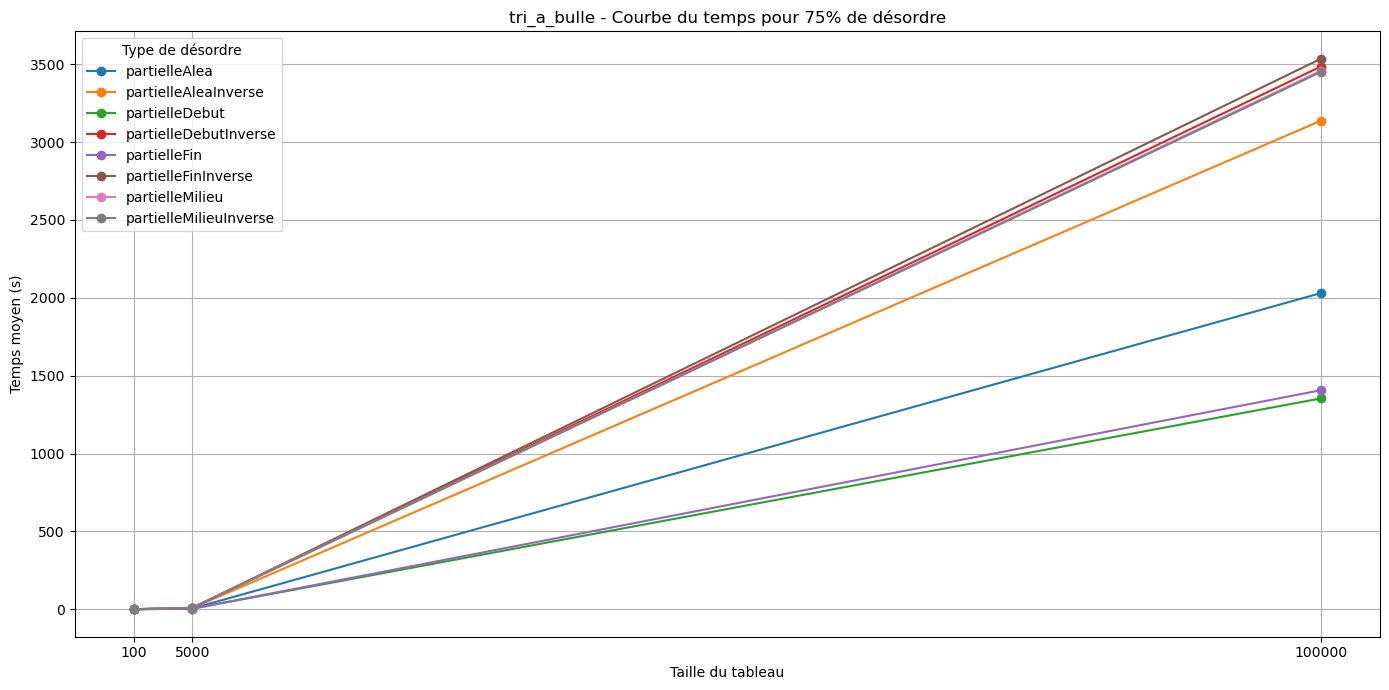

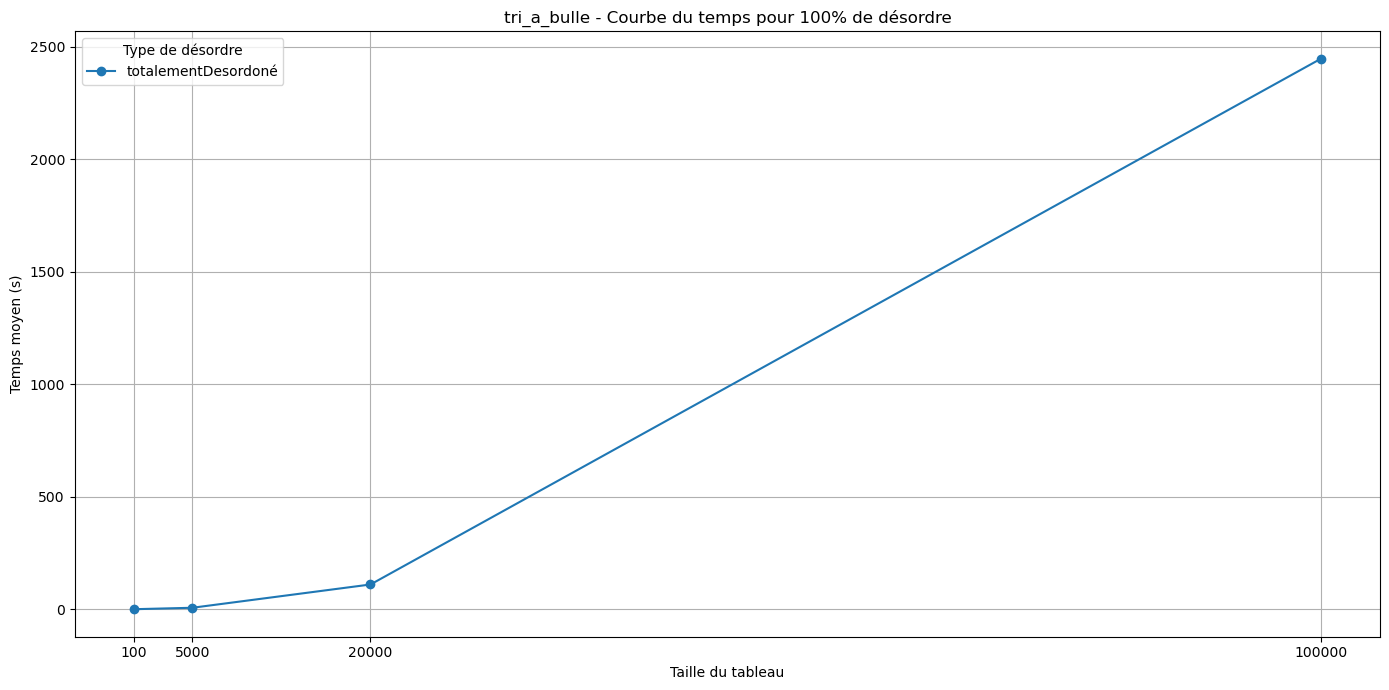

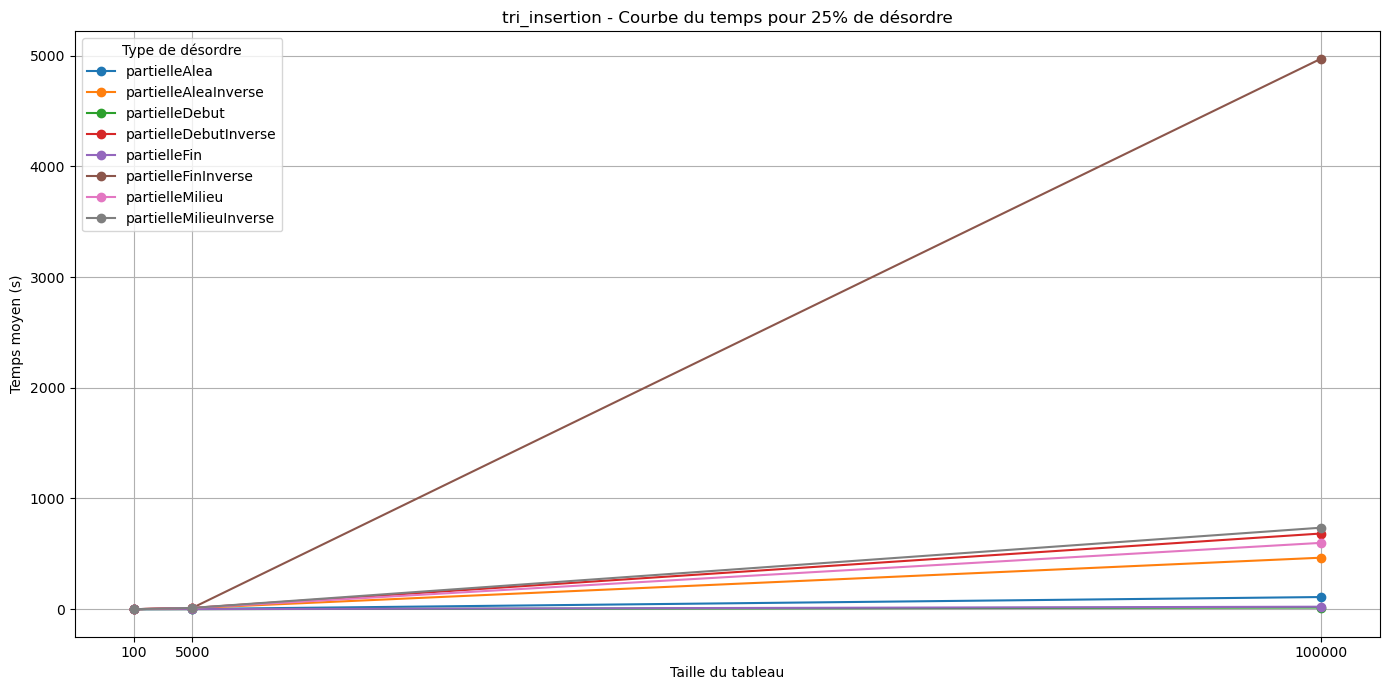

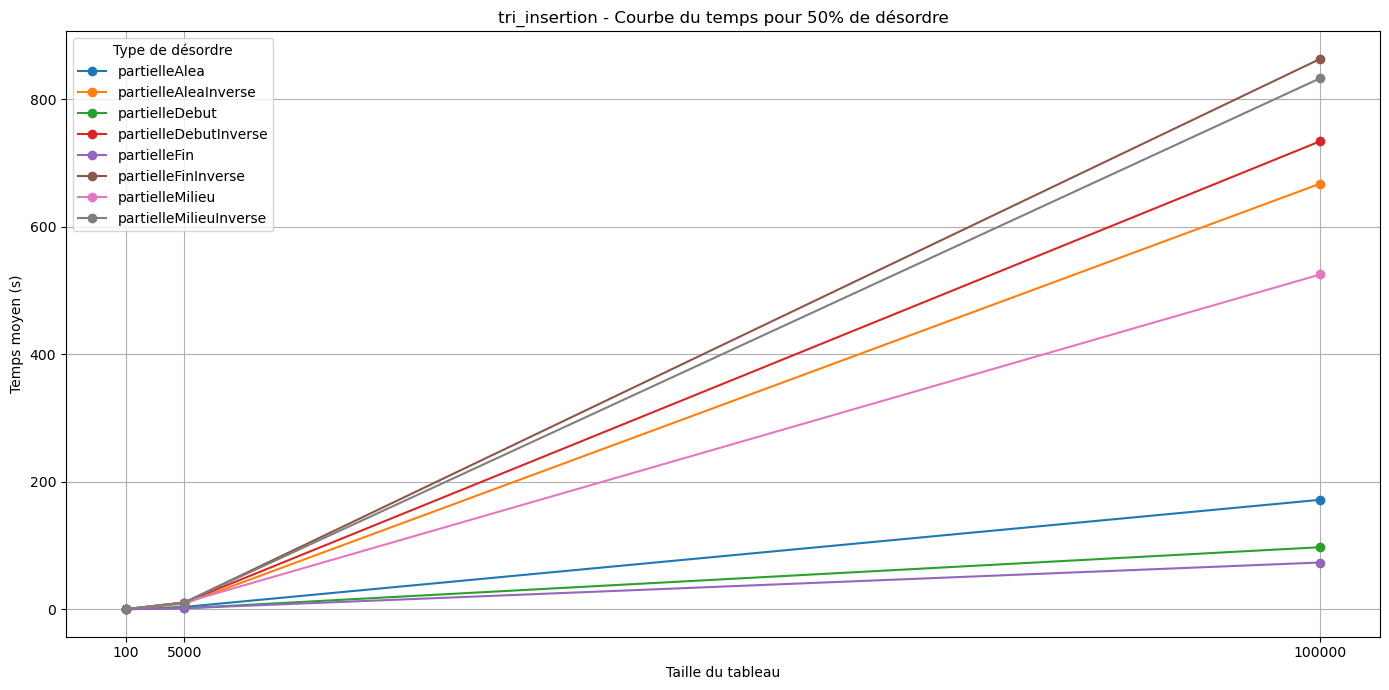

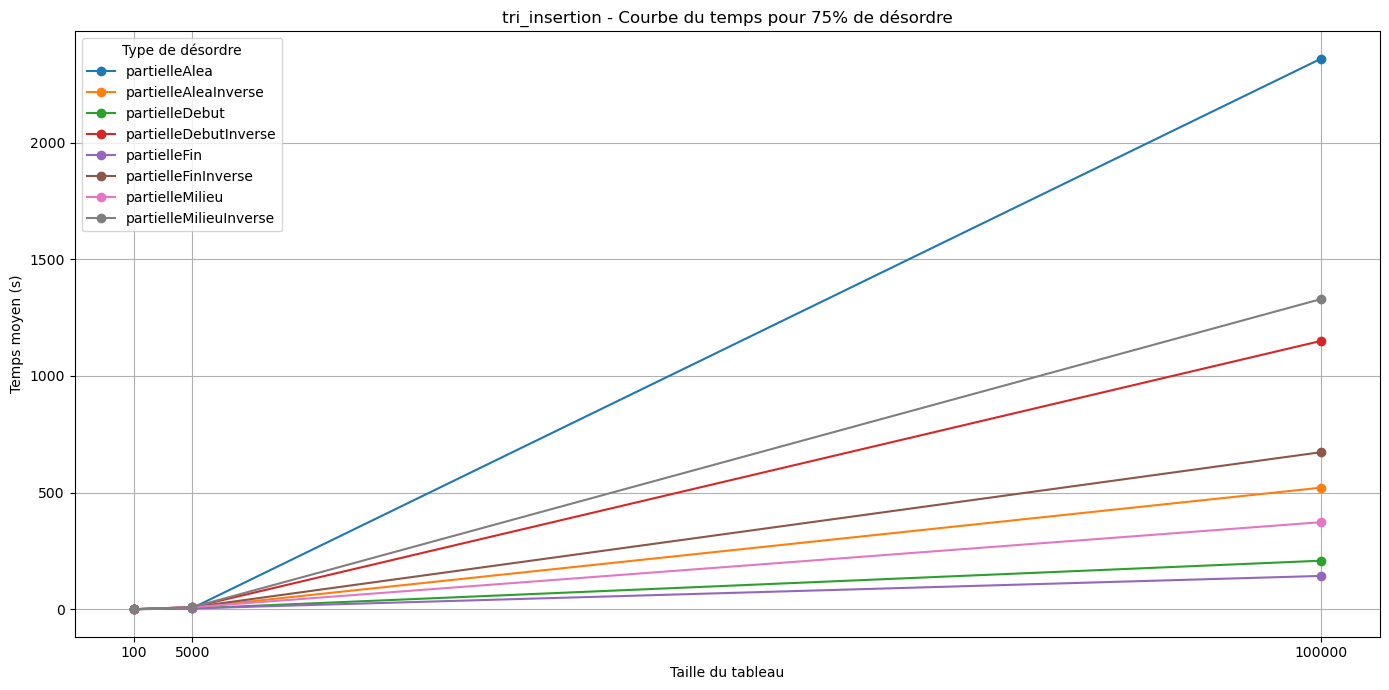

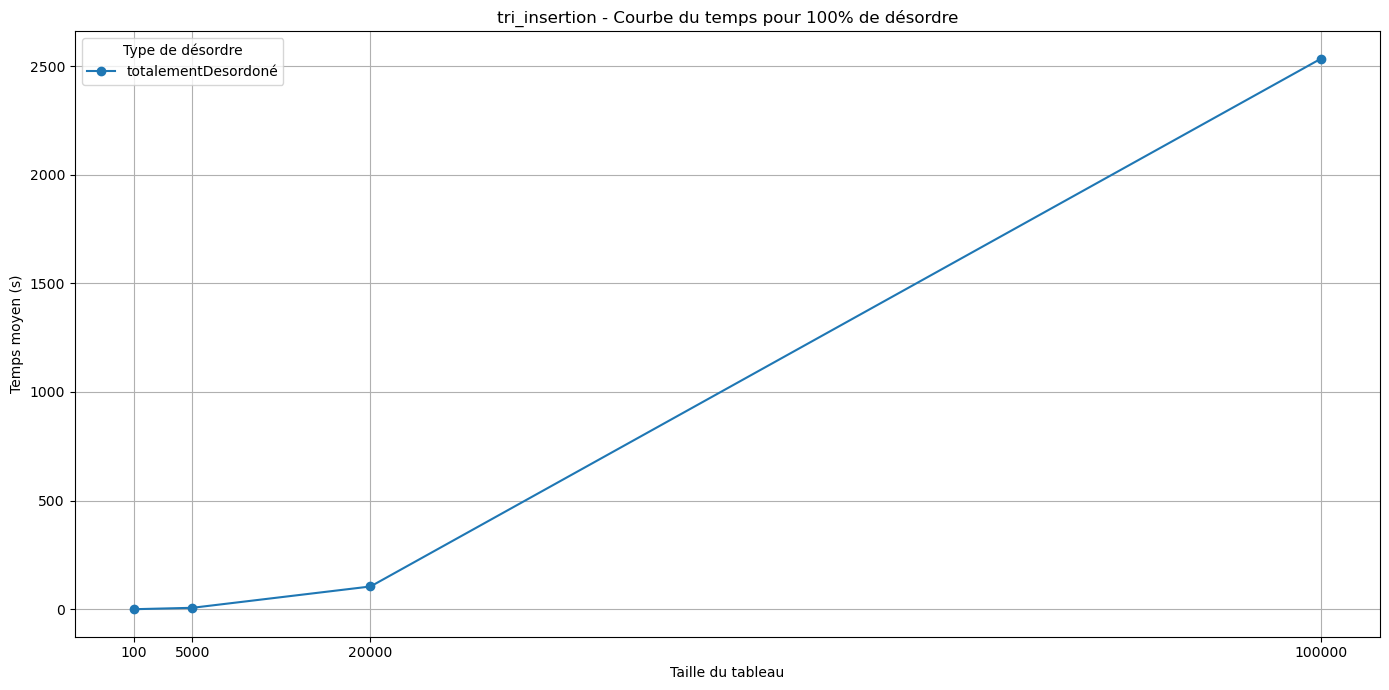

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
file_path = "../stockage/resultats.csv"
df = pd.read_csv(file_path)

# Définir les pourcentages et récupérer tous les algorithmes et types de désordre
pourcentages = [25, 50, 75, 100]
algorithmes = df['Algorithme'].unique()

# Générer les courbes
for algo in algorithmes:
    for pourcentage in pourcentages:
        subset = df[(df['Algorithme'] == algo) & (df['Désordre'] == pourcentage)]
        grouped = subset.groupby(['Taille', 'typeDesordre'])['Temps'].mean().unstack()

        if grouped is not None and not grouped.empty:
            plt.figure(figsize=(14, 7))
            for col in grouped.columns:
                plt.plot(grouped.index, grouped[col], marker='o', label=col)

            plt.title(f"{algo} - Courbe du temps pour {pourcentage}% de désordre")
            plt.xlabel("Taille du tableau")
            plt.ylabel("Temps moyen (s)")
            plt.legend(title="Type de désordre")
            plt.grid(True)
            plt.xticks(grouped.index)
            plt.tight_layout()
            plt.show()



<Figure size 1200x600 with 0 Axes>

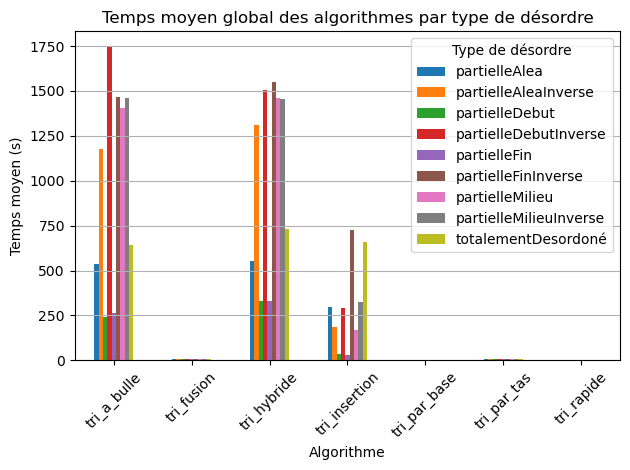

Diagramme global généré avec succès.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_global_average_sorting_time(file_path):
    # Charger les données
    df = pd.read_csv(file_path)

    # Vérification des colonnes requises
    required_cols = {'Taille', 'Désordre', 'Algorithme', 'typeDesordre', 'Temps'}
    if not required_cols.issubset(df.columns):
        raise ValueError("Le fichier doit contenir les colonnes : Taille, Désordre, Algorithme, typeDesordre, Temps")

    # Moyenne globale : par Algorithme et type de désordre (moyenne sur toutes les tailles et quantités de désordre)
    grouped = df.groupby(['Algorithme', 'typeDesordre'])['Temps'].mean().unstack()

    # Création du graphique
    plt.figure(figsize=(12, 6))
    grouped.plot(kind='bar')

    plt.title("Temps moyen global des algorithmes par type de désordre")
    plt.xlabel("Algorithme")
    plt.ylabel("Temps moyen (s)")
    plt.legend(title="Type de désordre")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    print("Diagramme global généré avec succès.")

# Appel de la fonction
plot_global_average_sorting_time("../stockage/resultats.csv")
